In [23]:
import scipy.io as sio

import pandas as pd

import matplotlib.pyplot as plt

In [3]:
dyntex_info_mat = sio.loadmat('../input/DynTex++/dyntex++_info.mat')

In [4]:
imagemaster_mat = dyntex_info_mat['imagemaster']

In [5]:
len(imagemaster_mat)

3600

In [6]:
[r[0] for r in imagemaster_mat]

[array([[ (array([[1]], dtype=uint8), array([[160, 120,  27]], dtype=uint8), array([[50, 50, 50]], dtype=uint8), array([u'47fa110.avi'],
       dtype='<U11'), array([u'imgdb/0001.mat'],
       dtype='<U14'))]],
       dtype=[('class', 'O'), ('left_corner', 'O'), ('subvolume_size', 'O'), ('original_vid', 'O'), ('filepath', 'O')]),
 array([[ (array([[1]], dtype=uint8), array([[167, 105,  22]], dtype=uint8), array([[50, 50, 50]], dtype=uint8), array([u'47fa110.avi'],
       dtype='<U11'), array([u'imgdb/0002.mat'],
       dtype='<U14'))]],
       dtype=[('class', 'O'), ('left_corner', 'O'), ('subvolume_size', 'O'), ('original_vid', 'O'), ('filepath', 'O')]),
 array([[ (array([[1]], dtype=uint8), array([[167,  94,  28]], dtype=uint8), array([[50, 50, 50]], dtype=uint8), array([u'47fa110.avi'],
       dtype='<U11'), array([u'imgdb/0003.mat'],
       dtype='<U14'))]],
       dtype=[('class', 'O'), ('left_corner', 'O'), ('subvolume_size', 'O'), ('original_vid', 'O'), ('filepath', 'O')]),
 arr

In [7]:
dyntex_df = pd.DataFrame([{'class': r[0]['class'][0, 0][0, 0], 'filepath': r[0]['filepath'][0, 0][0] } for r in imagemaster_mat] )

In [8]:
dyntex_df.head()

class        filepath
0      1  imgdb/0001.mat
1      1  imgdb/0002.mat
2      1  imgdb/0003.mat
3      1  imgdb/0004.mat
4      1  imgdb/0005.mat

In [87]:
dyntex_df.to_csv('../data/dyntex.csv', index=False)

In [58]:
dyntex_df.loc[dyntex_df['class'] == 16].sample(1)['filepath'].tolist()[0]

u'imgdb/1550.mat'

In [29]:
range(0, 50, 5)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [35]:
10 // 5

2

In [90]:
class_desc_df = pd.read_csv('../input/DynTex++/class_desc.csv')

In [91]:
class_desc_df.head()

CLASS                  DESCRIPTION  # of DynTex AVIs USED
0  class1:      textured cloth (zoomed)                      1
1  class2:     artificial hair (zoomed)                      1
2  class3:  blossoming tree in the wind                      8
3  class4:   escalator stairs in motion                      7
4  class5:               waves on beach                     29

In [96]:
class_desc_df.iloc[5]['DESCRIPTION']

'grass swaying in wind (different grass sizes)'

class_id=textured cloth (zoomed)


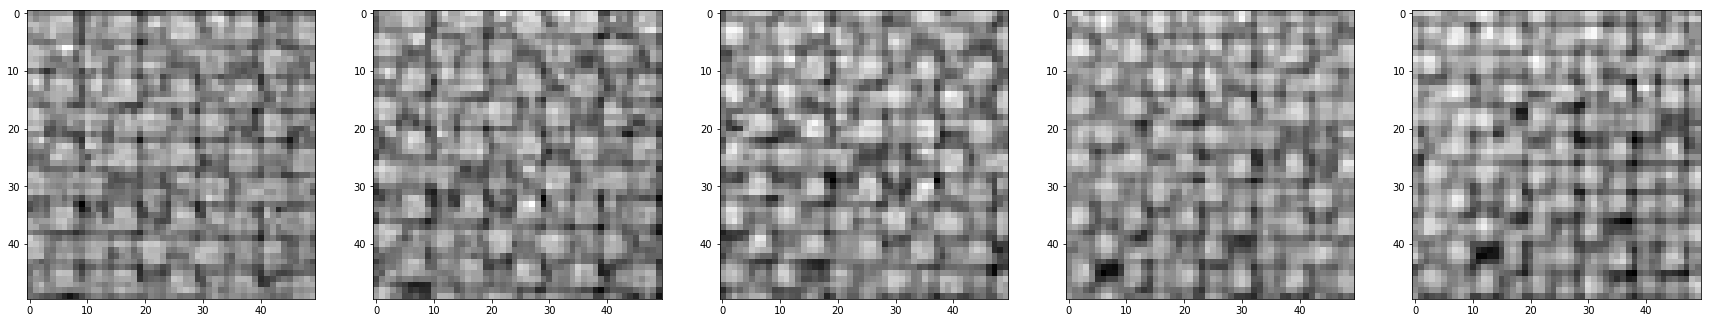

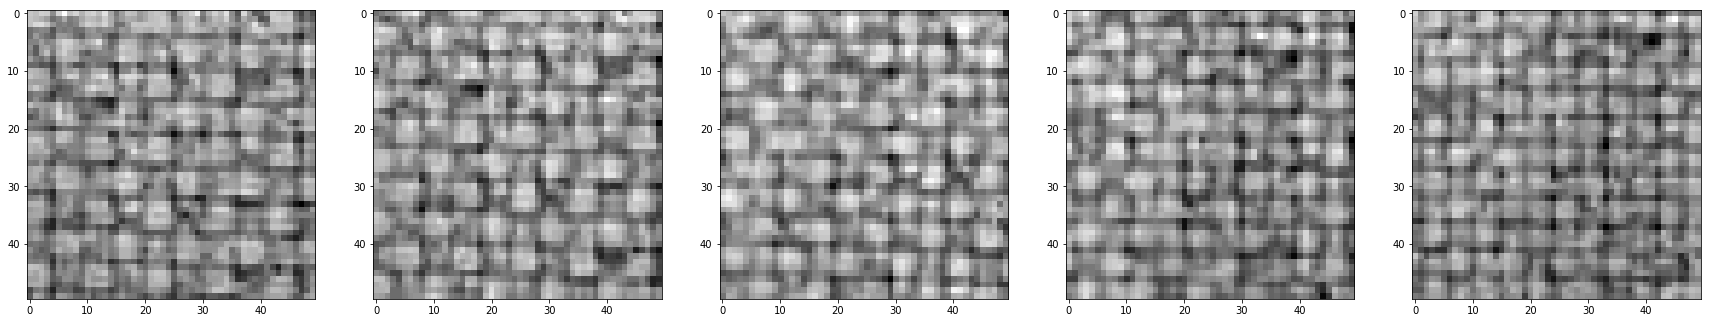

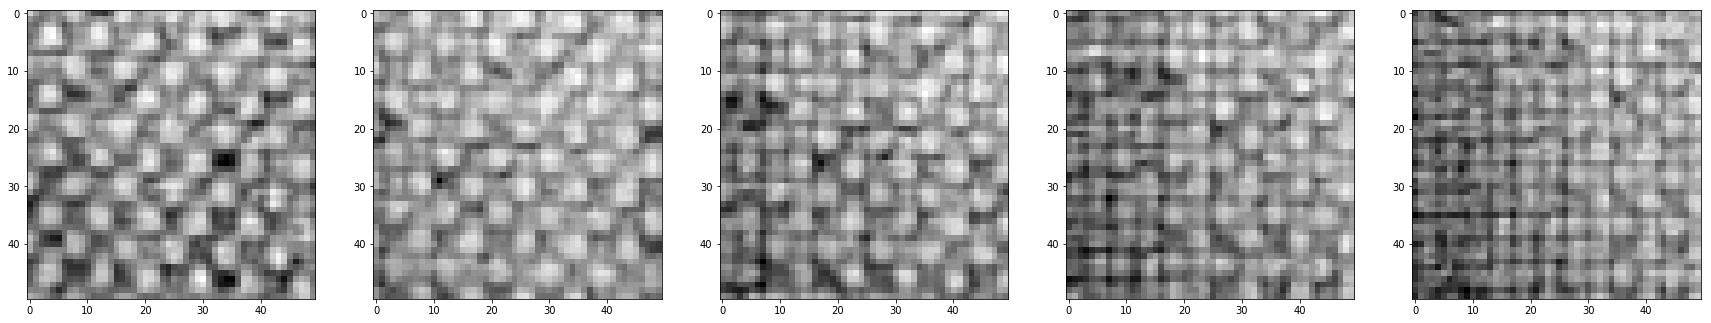

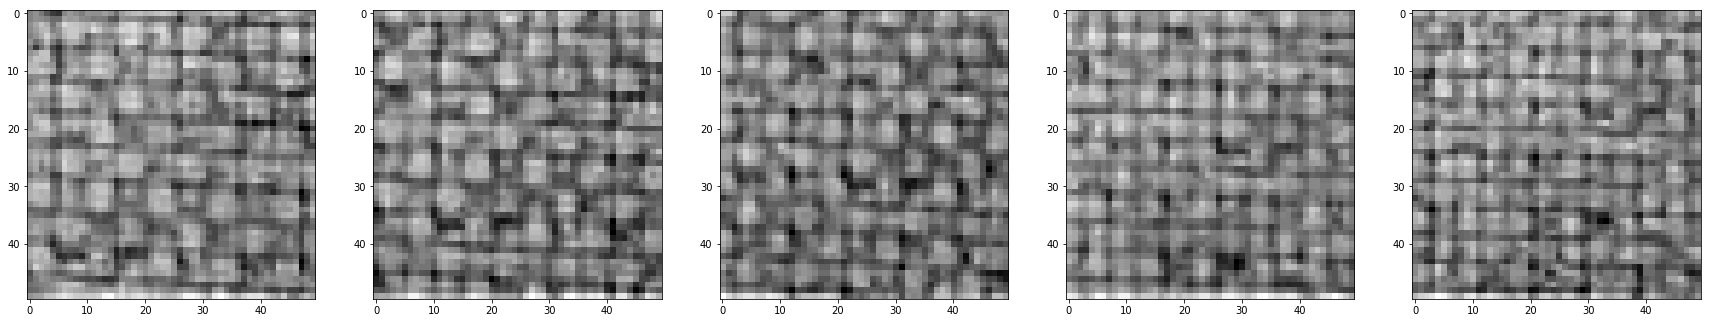

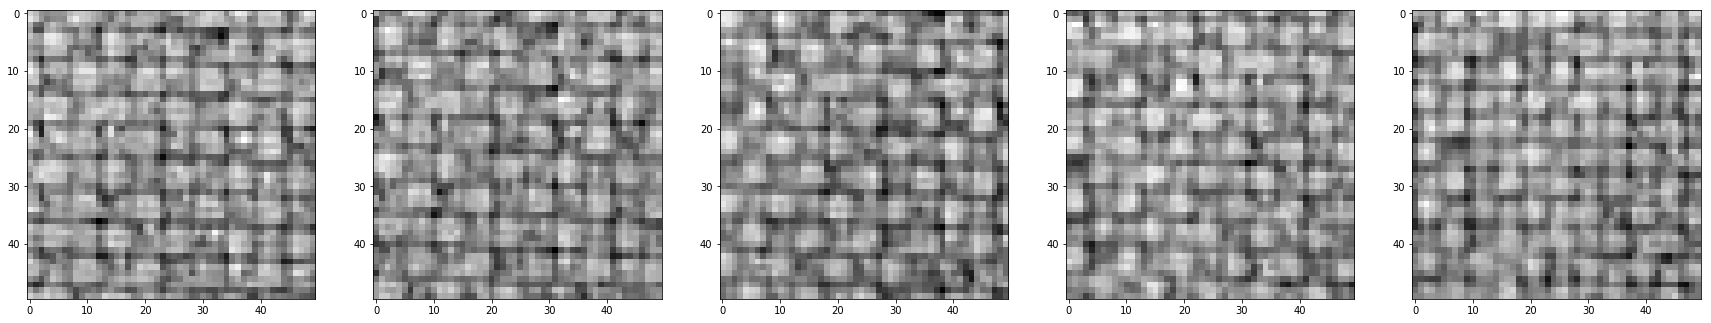

class_id=artificial hair (zoomed)


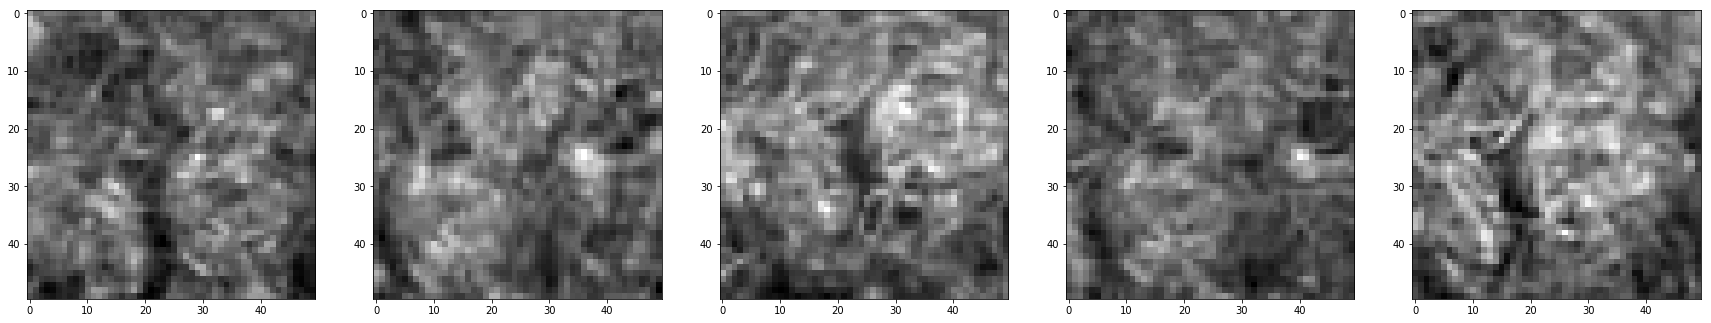

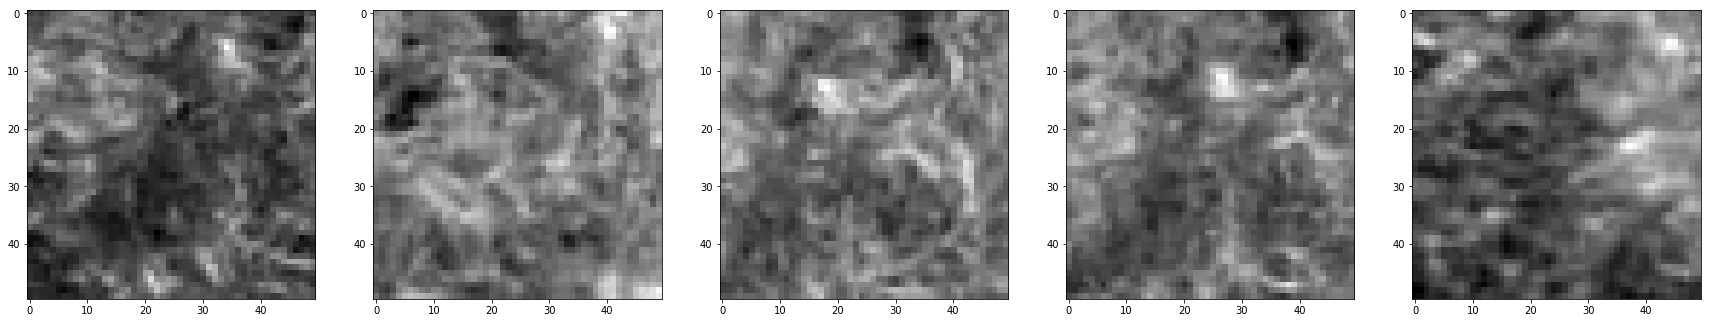

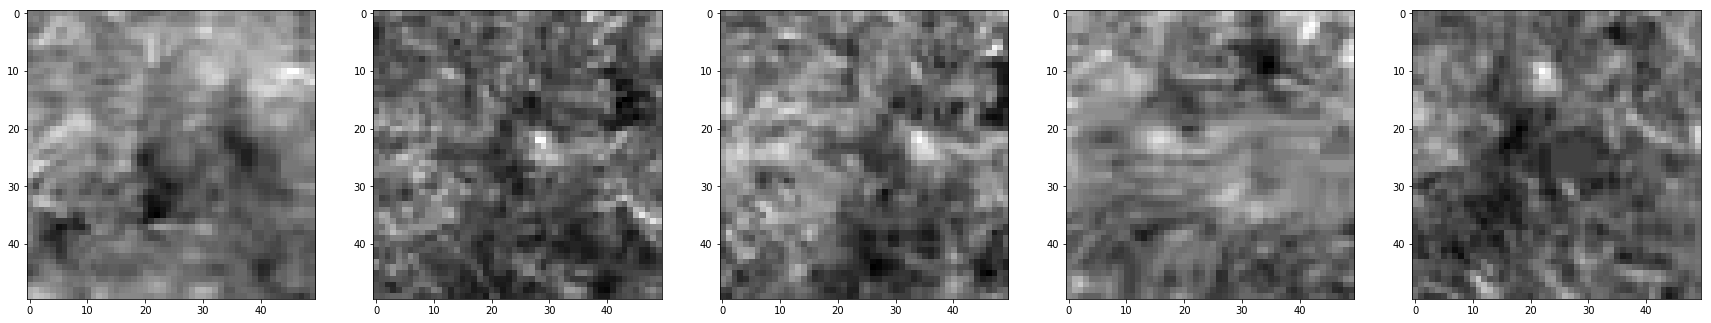

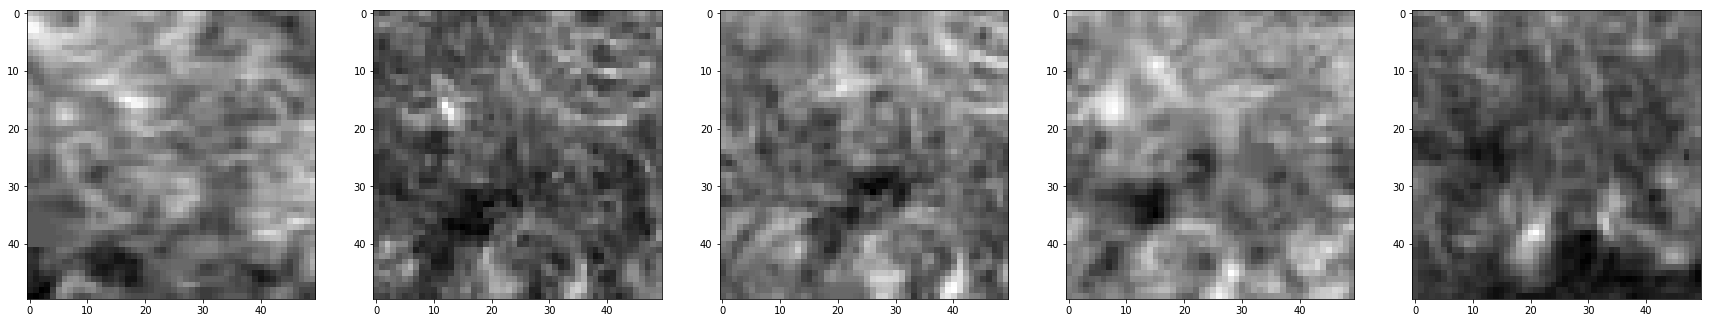

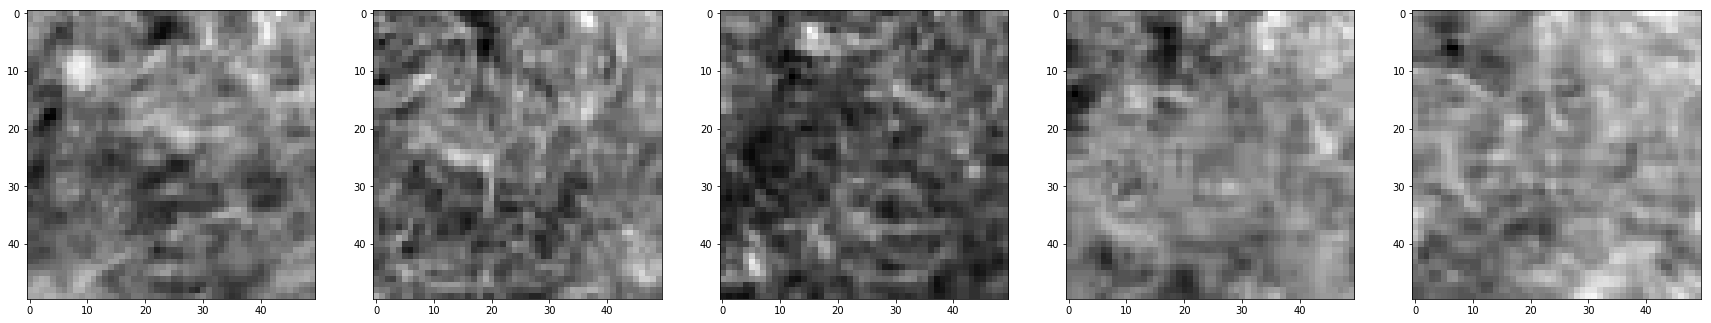

class_id=blossoming tree in the wind


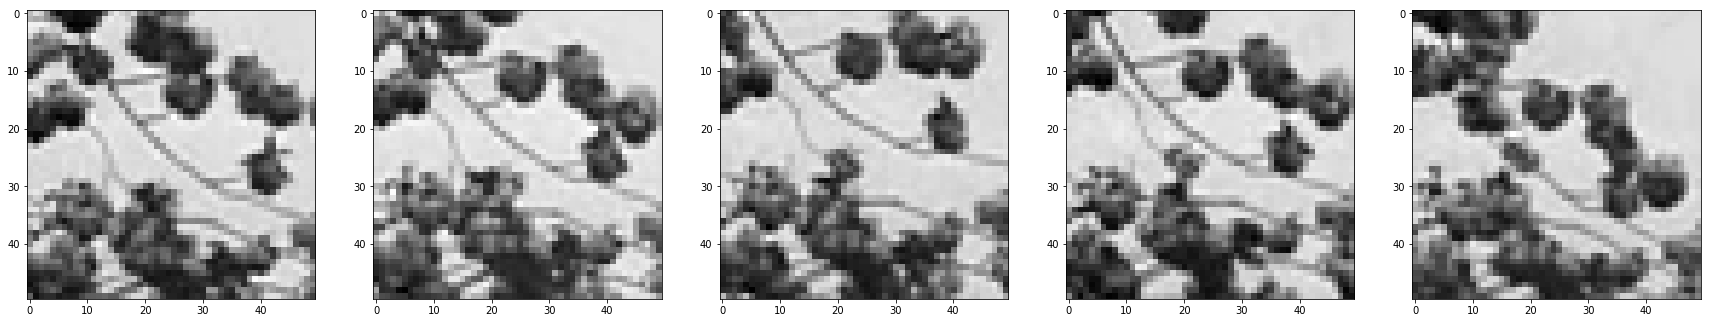

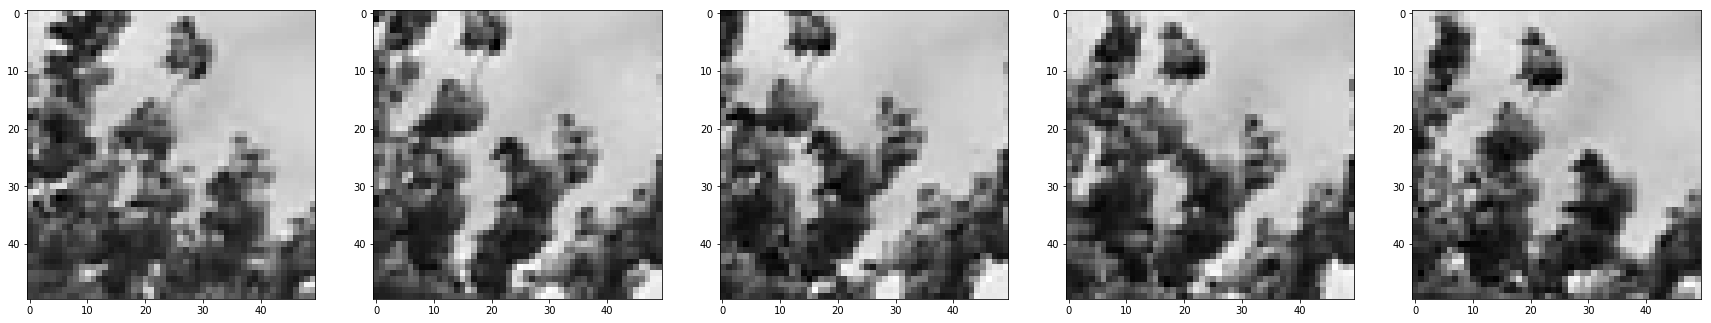

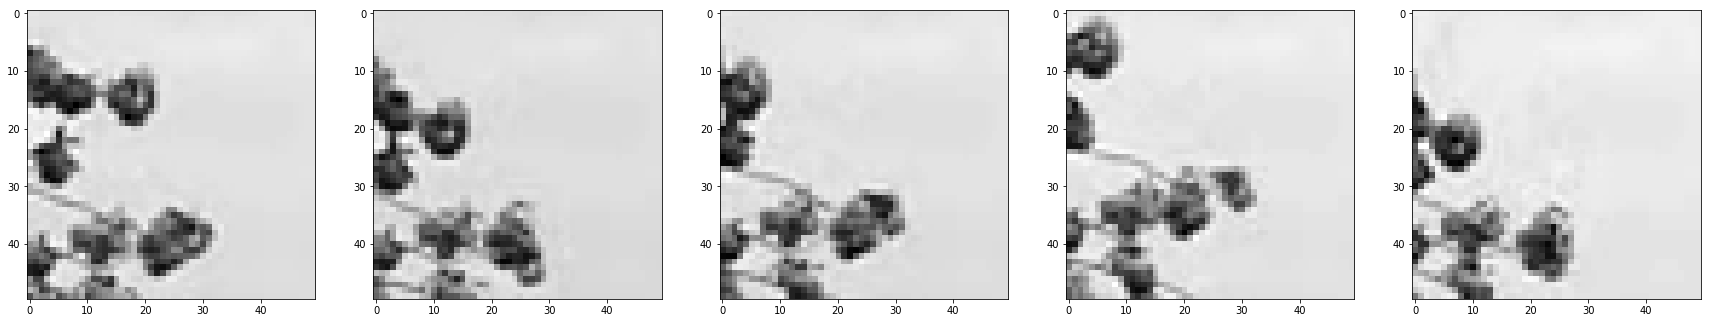

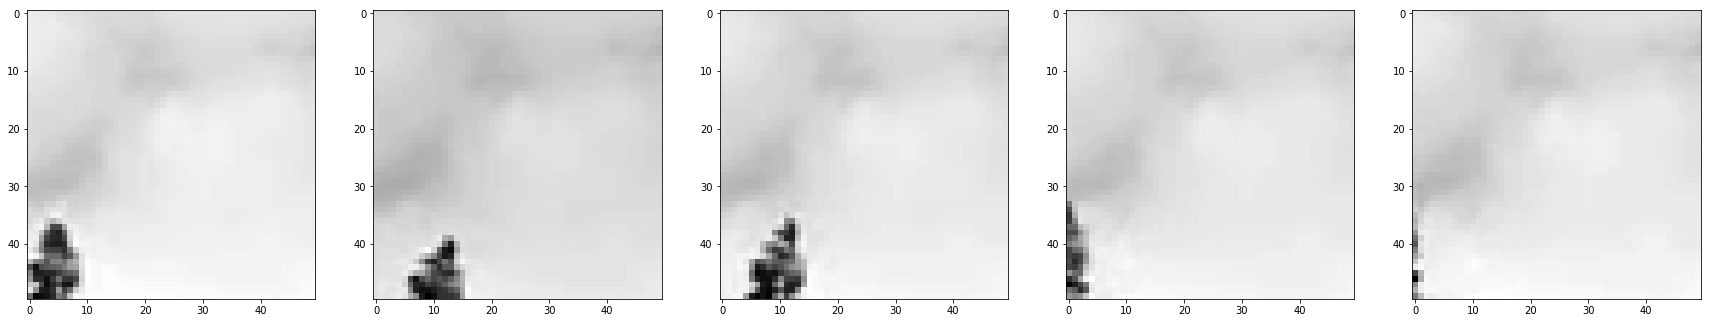

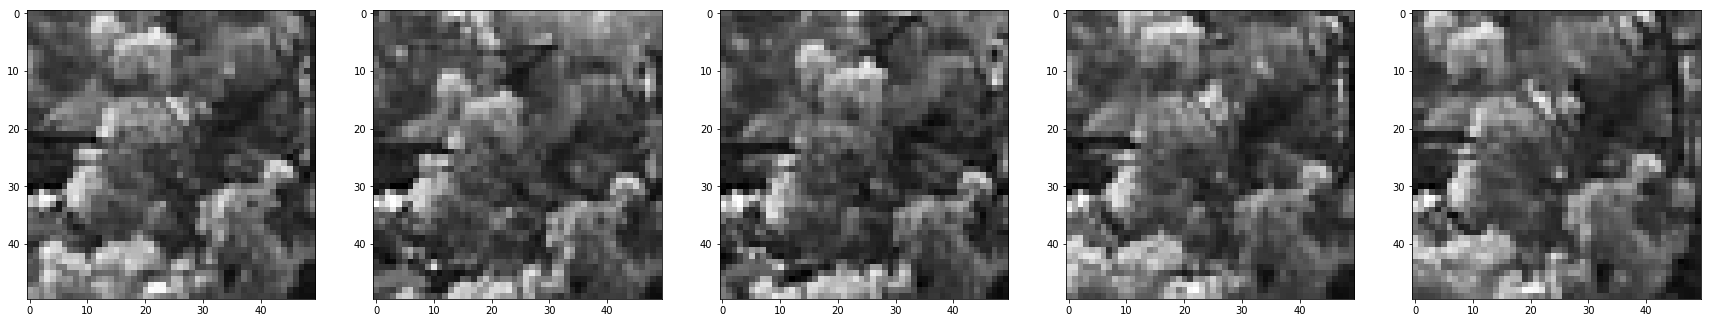

class_id=escalator stairs in motion


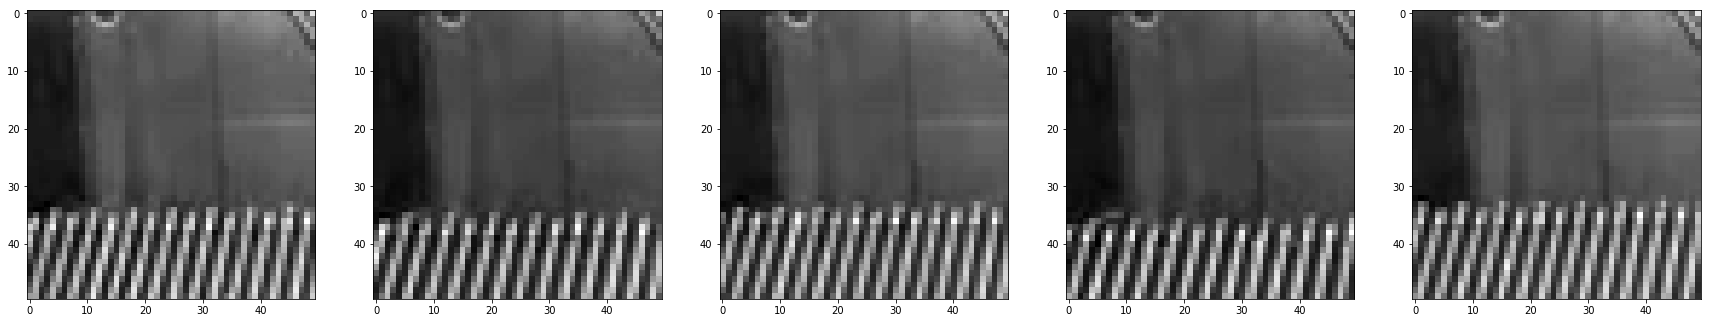

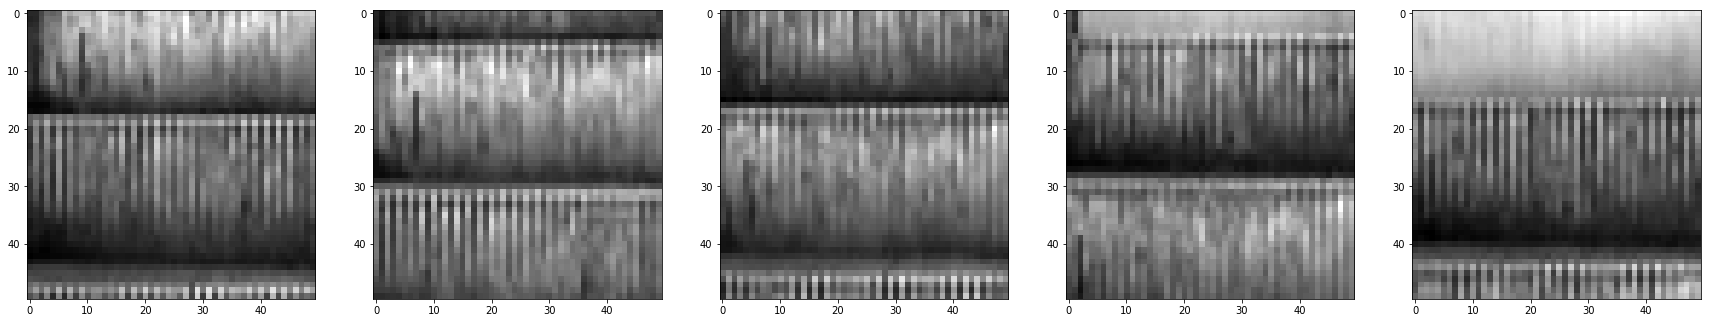

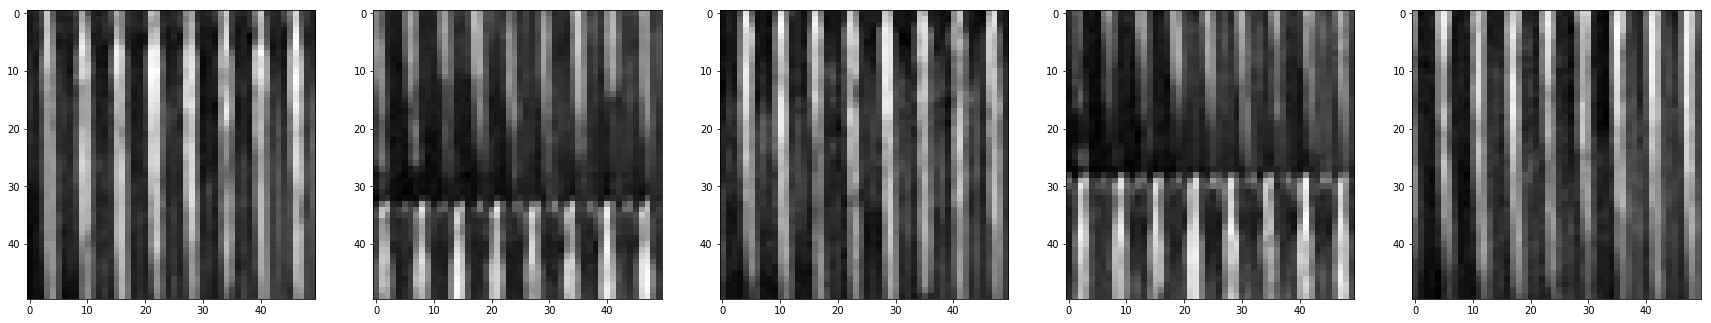

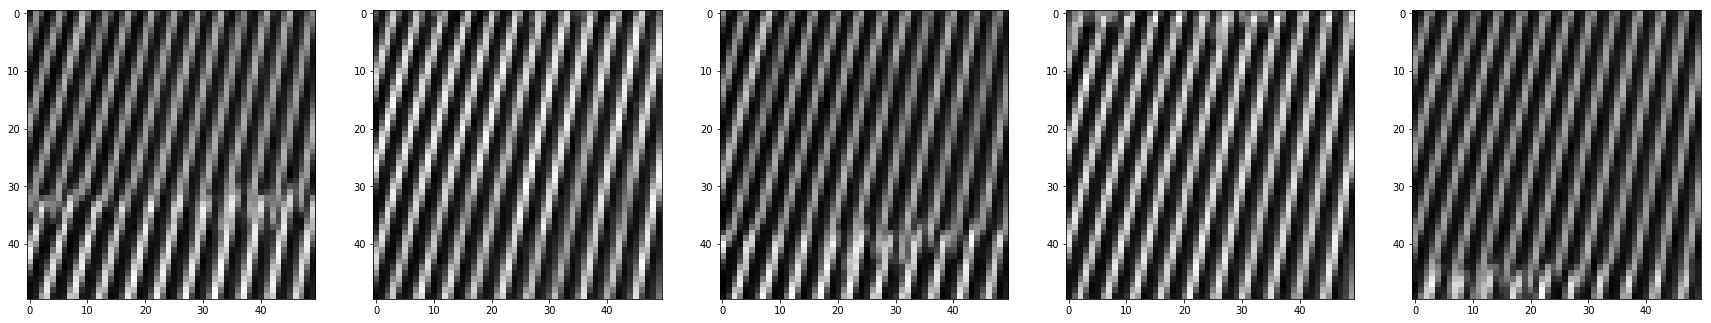

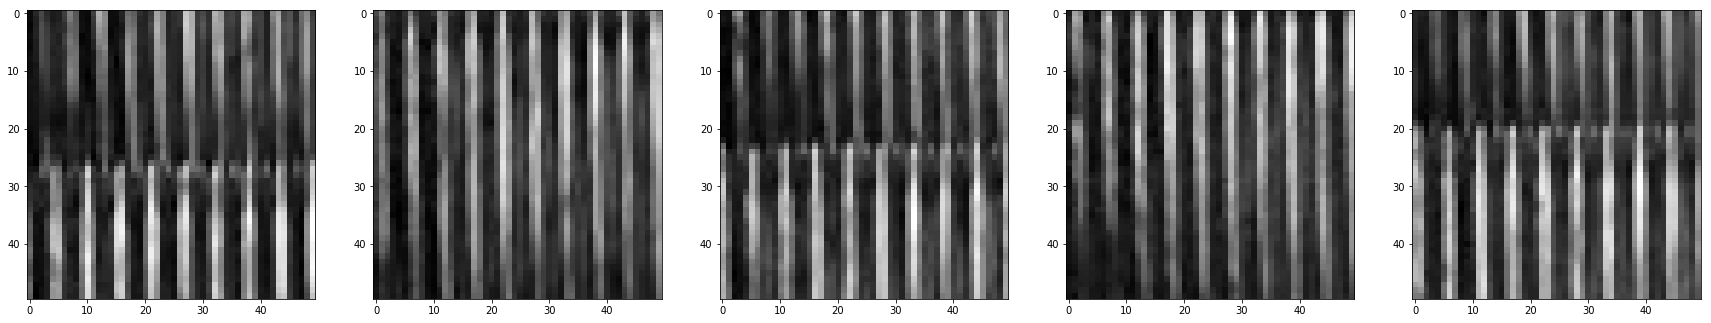

class_id=waves on beach


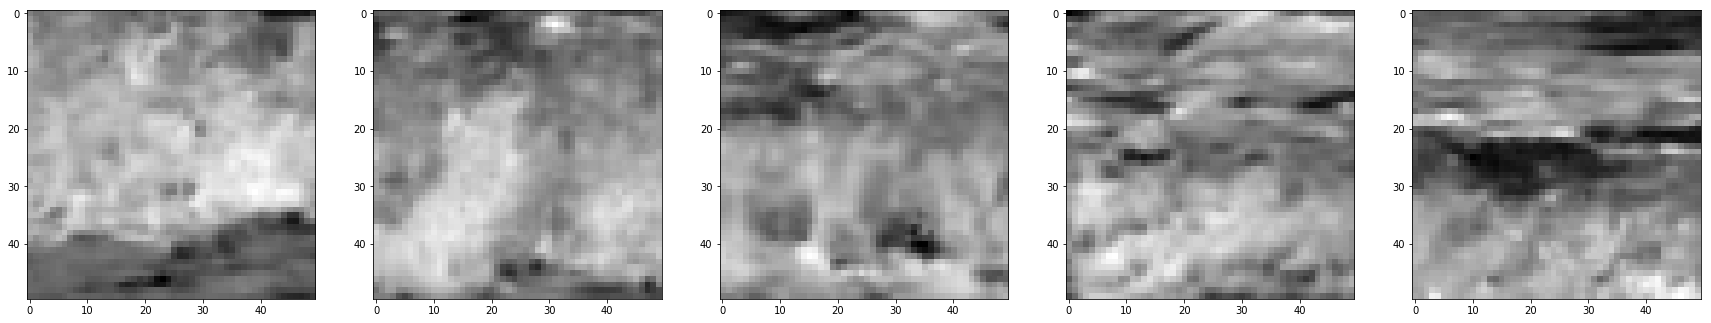

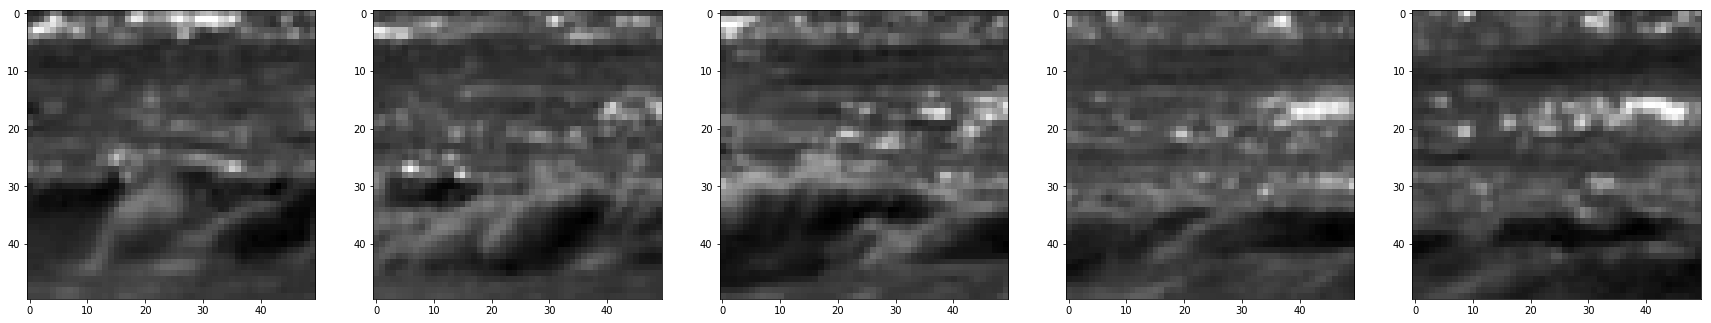

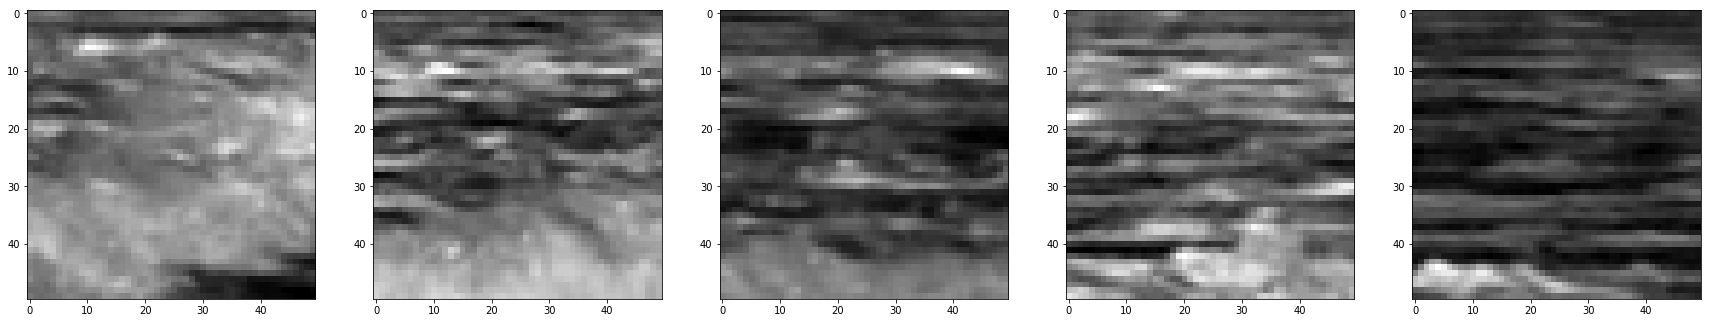

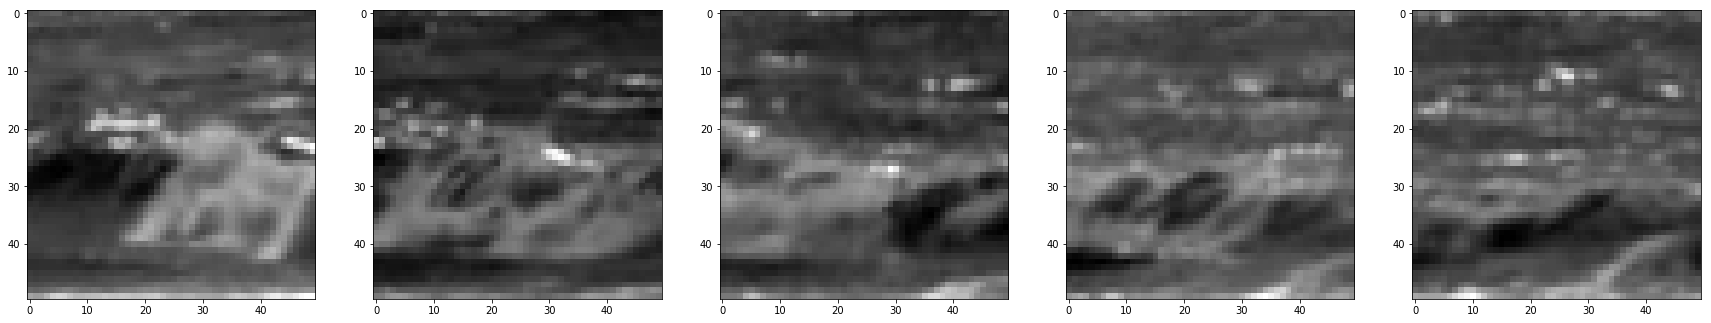

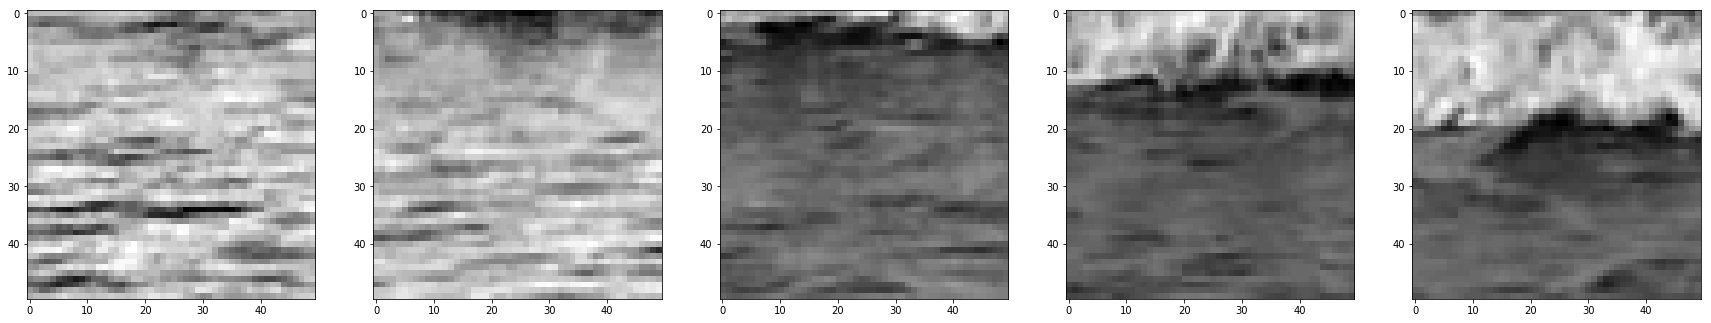

class_id=grass swaying in wind (different grass sizes)


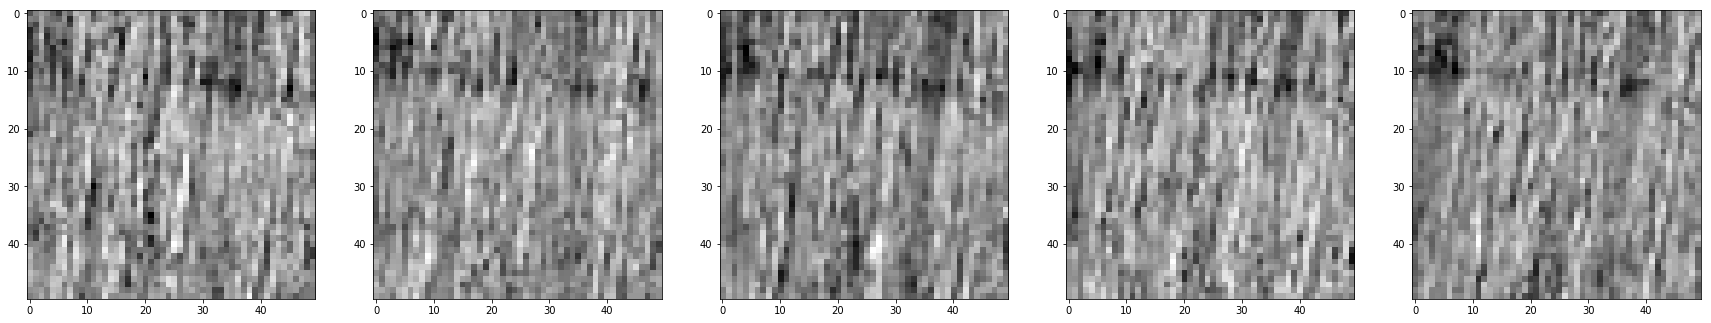

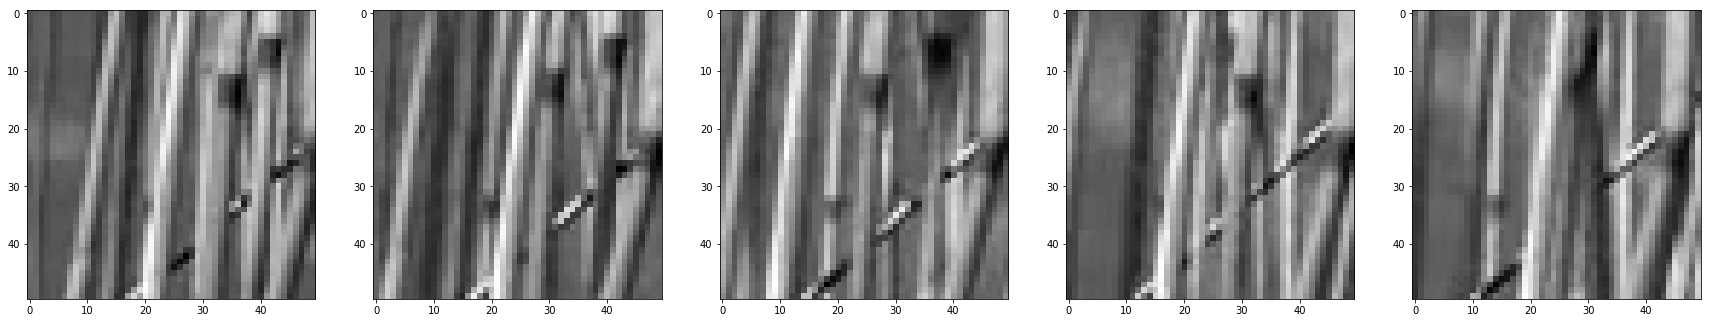

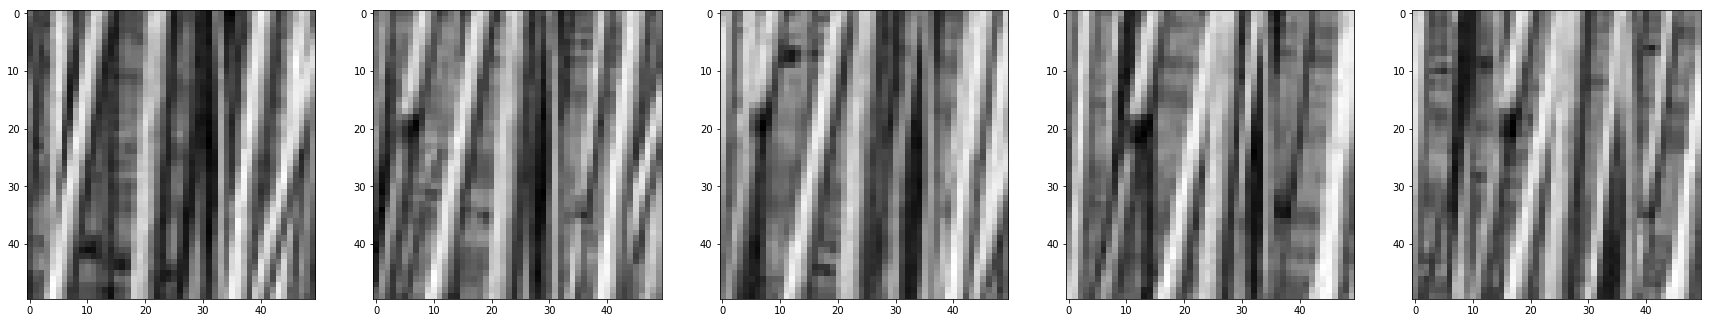

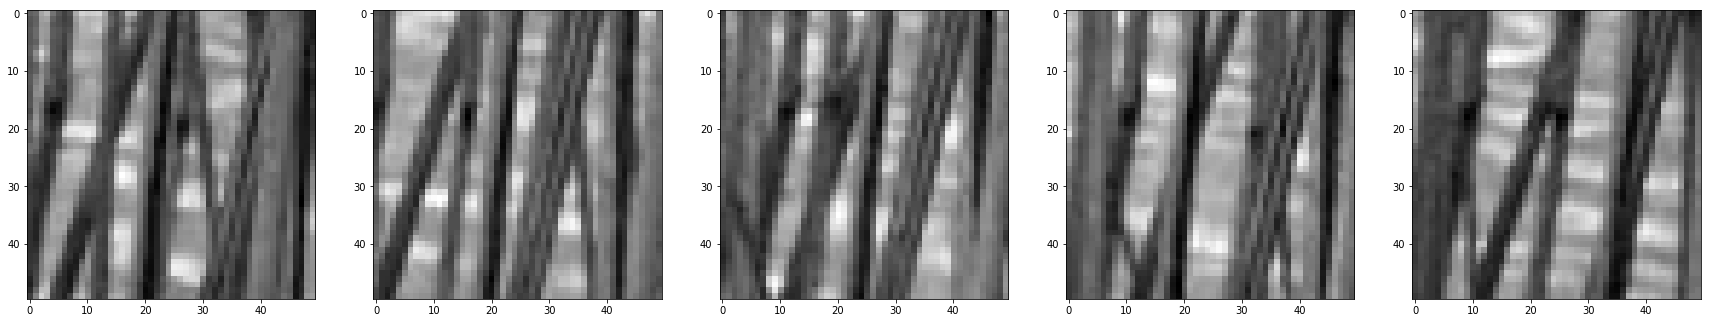

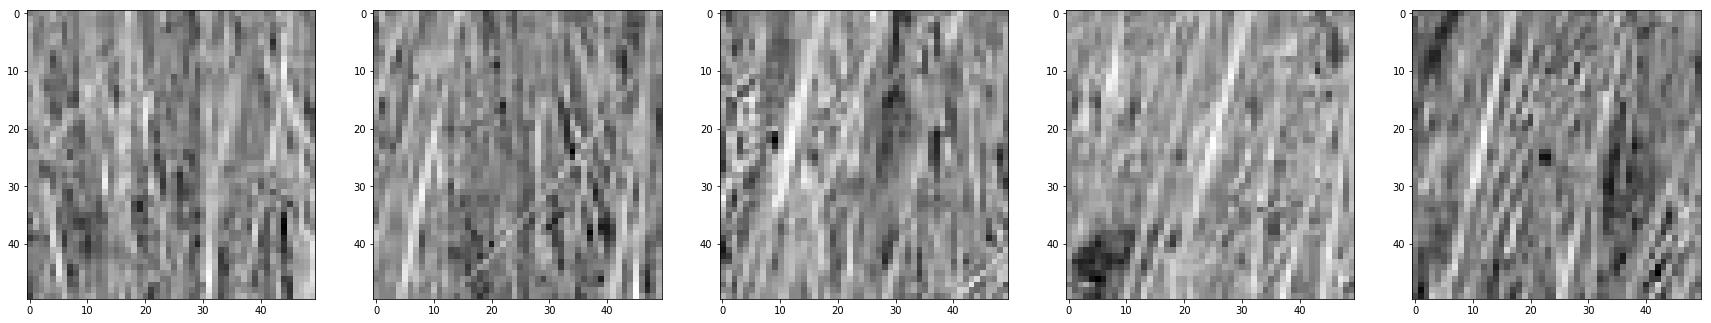

class_id=boiling water


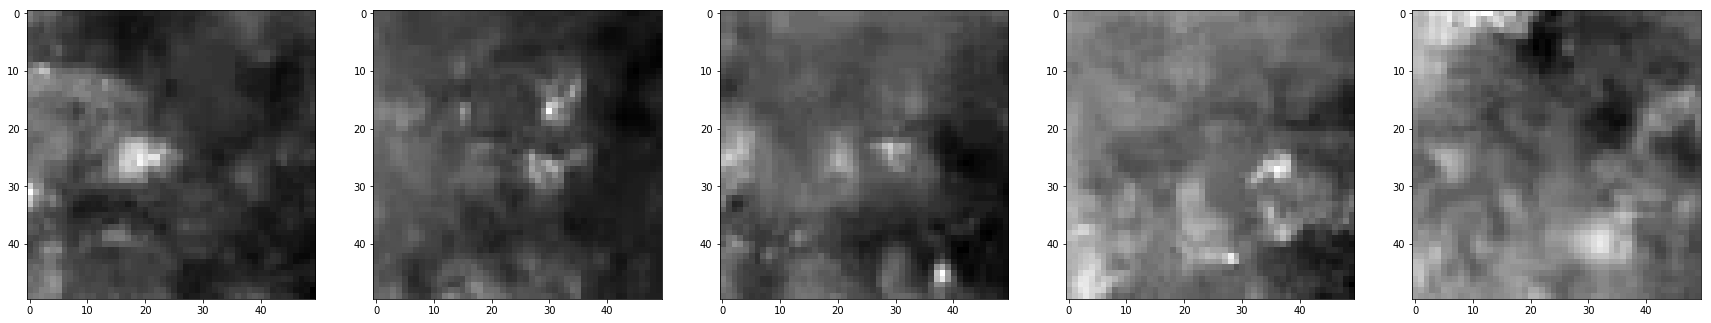

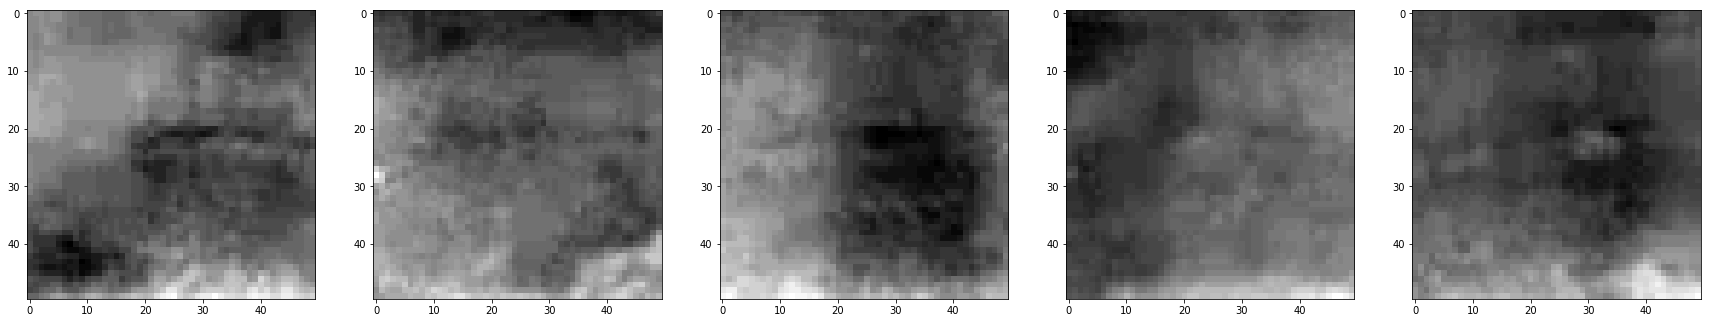

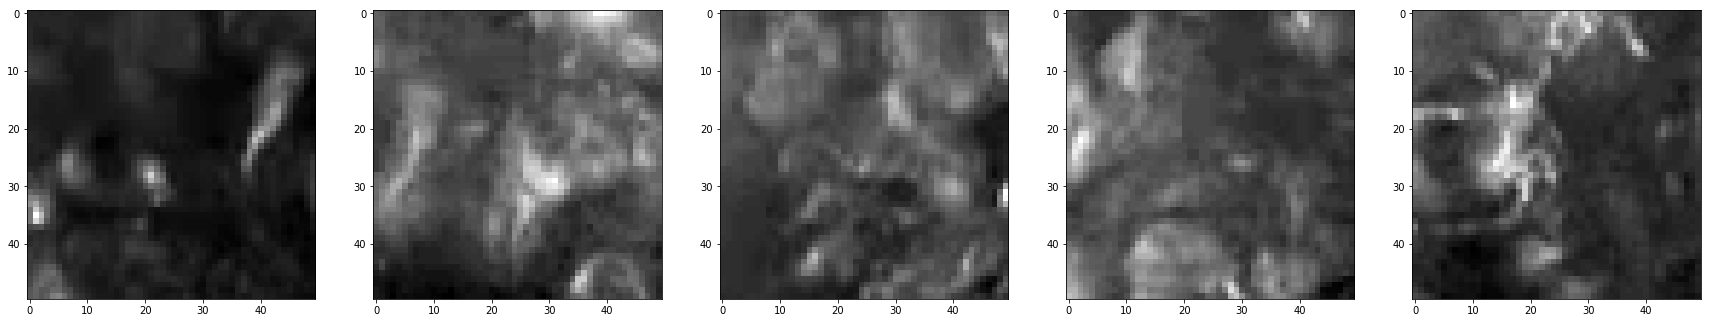

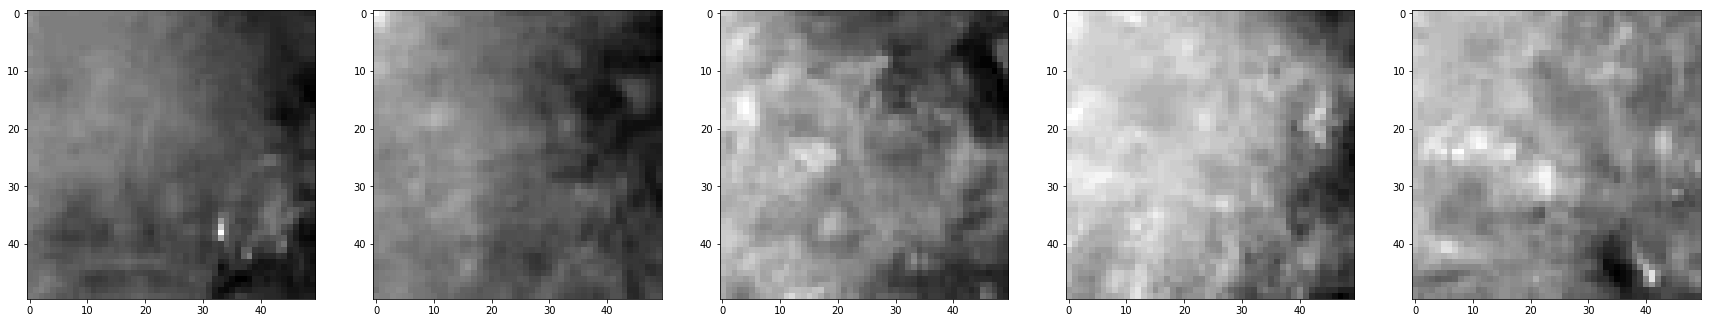

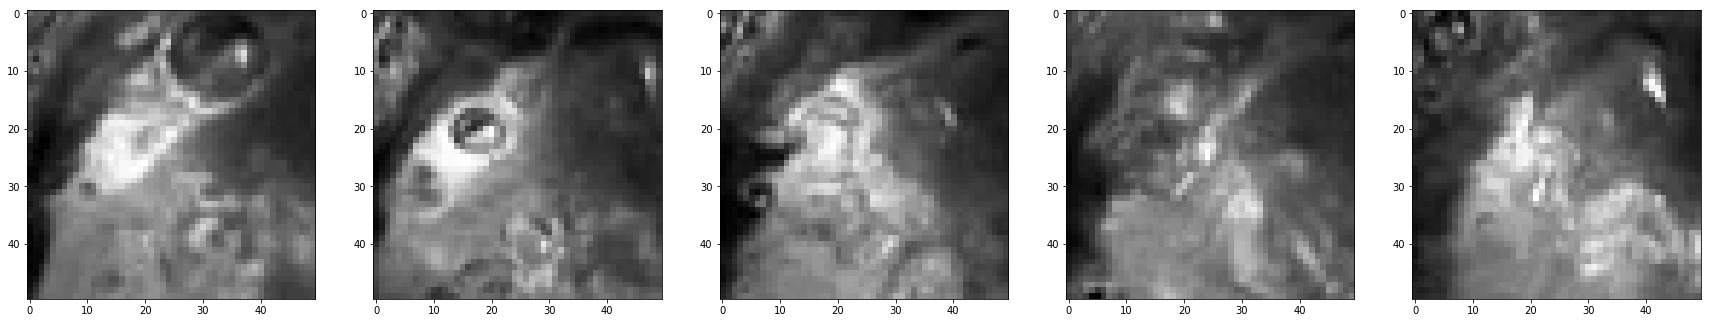

class_id=evaporating water/fumes


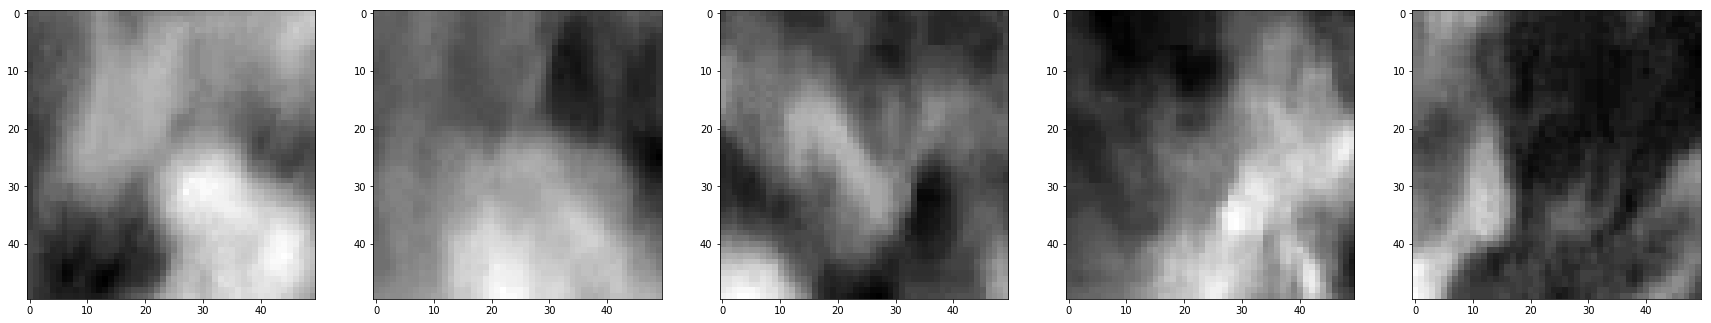

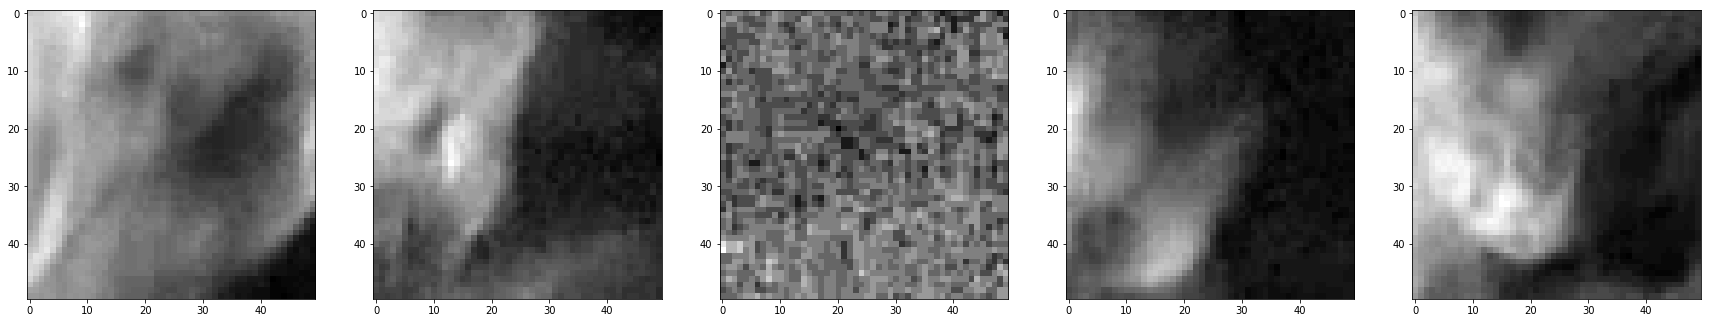

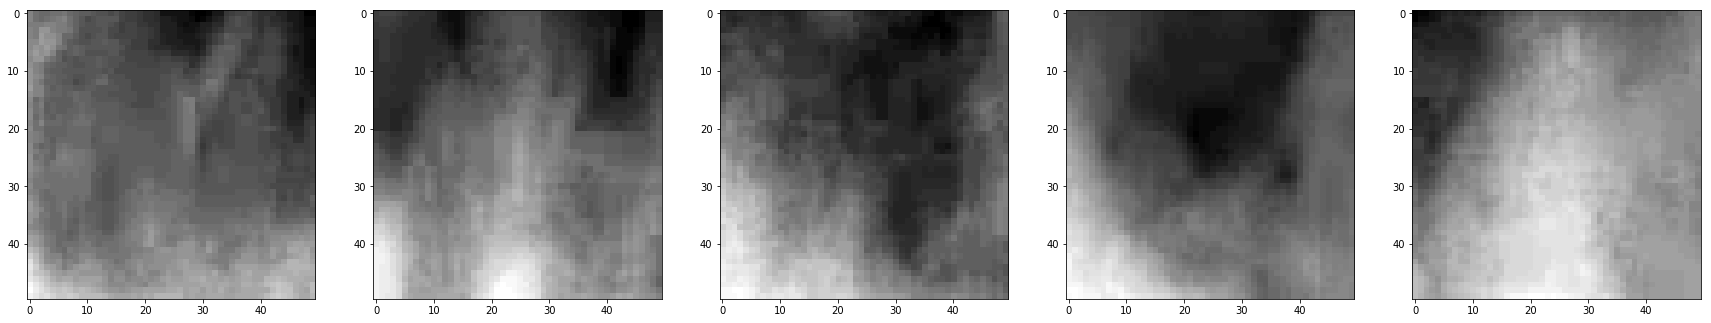

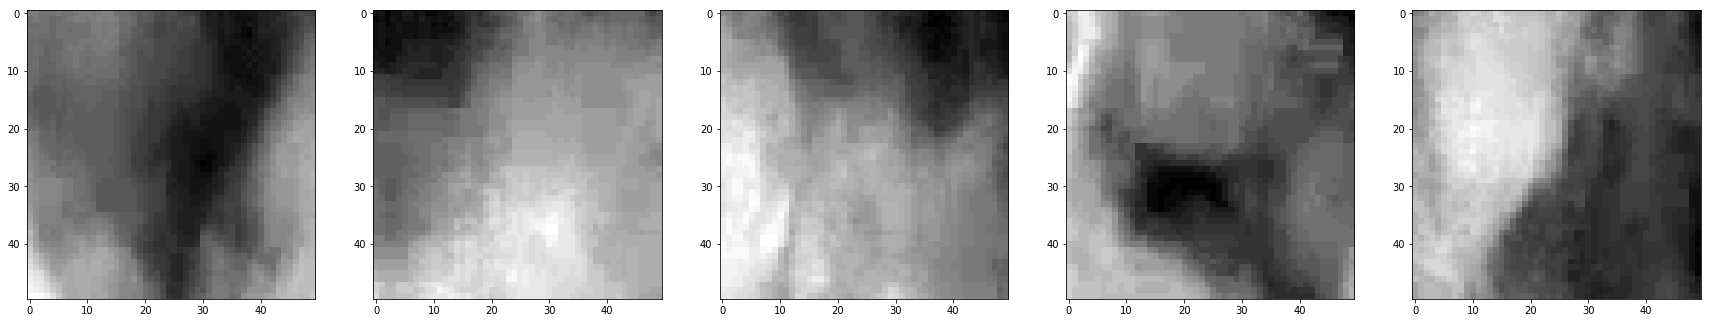

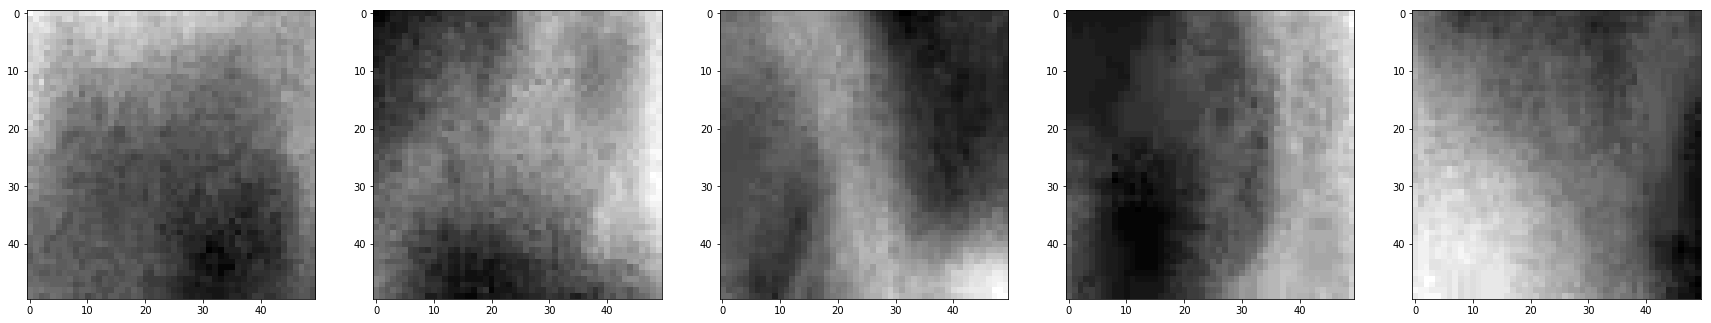

class_id=river water


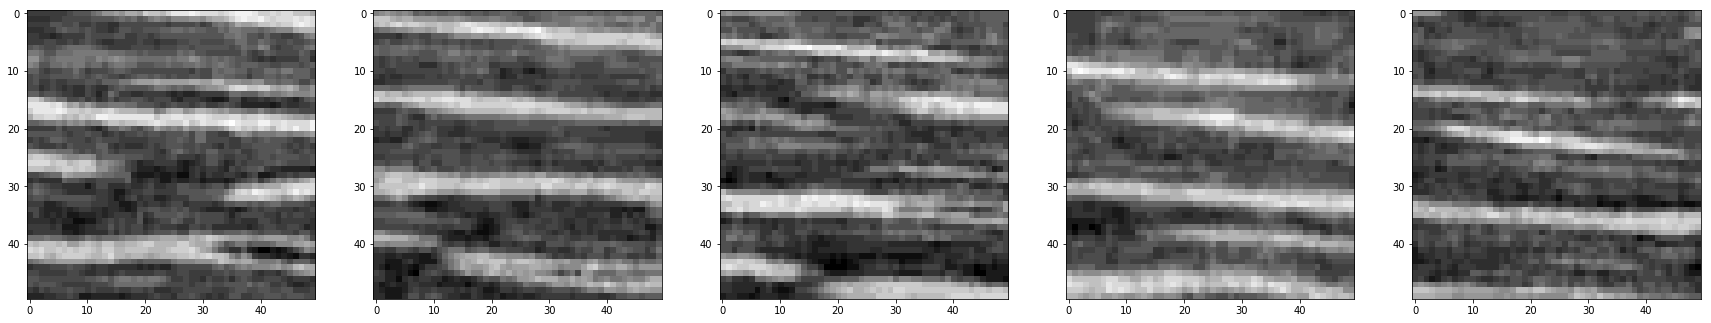

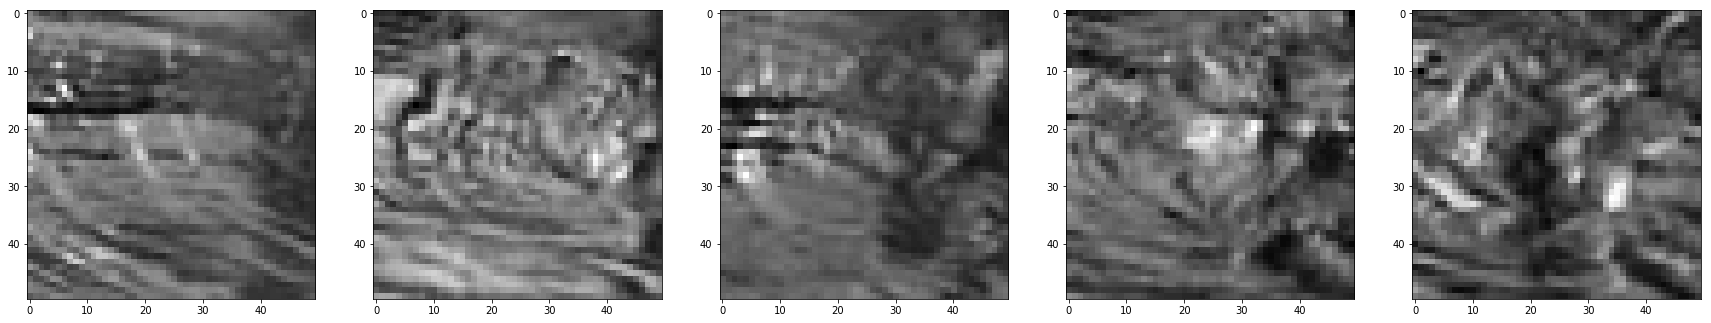

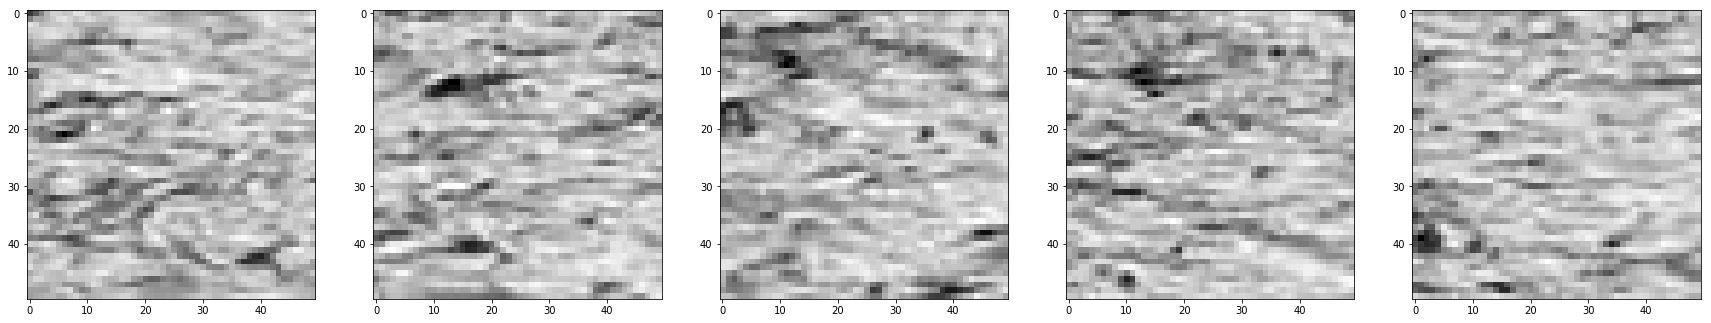

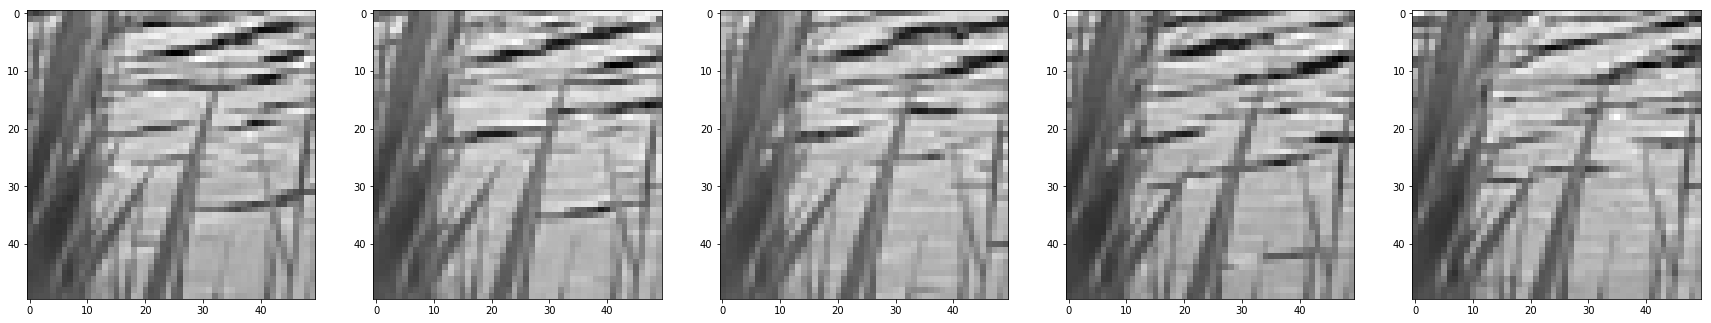

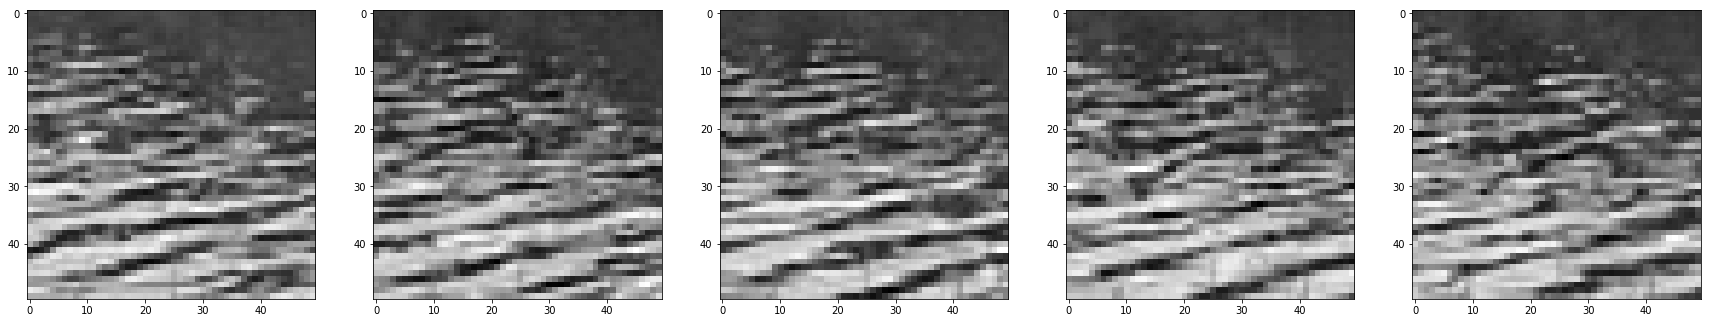

class_id=faucet water


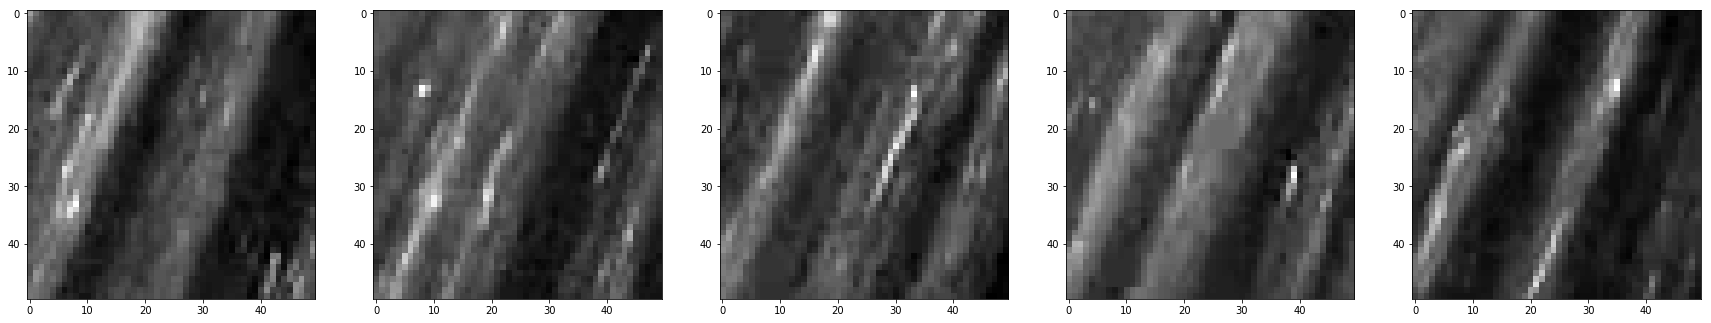

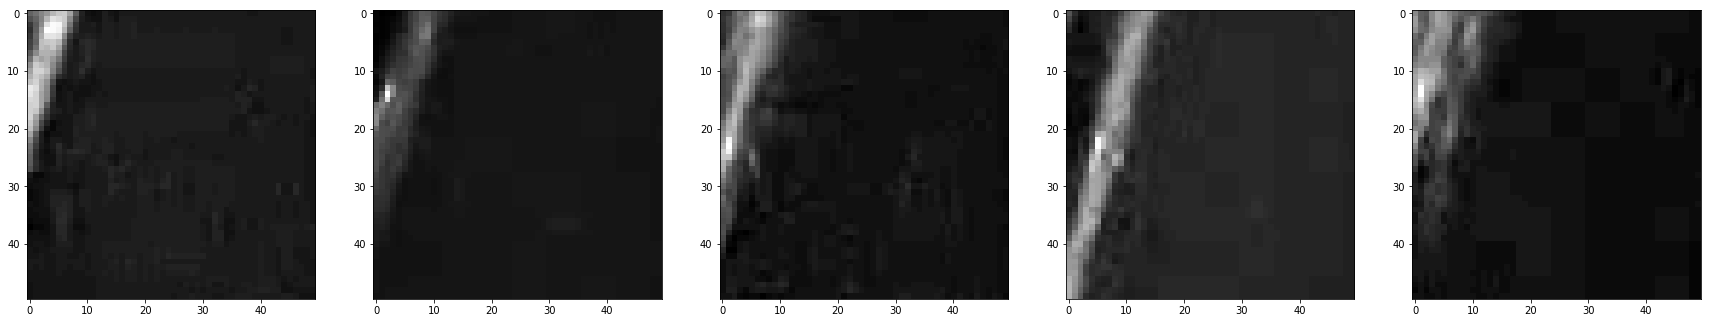

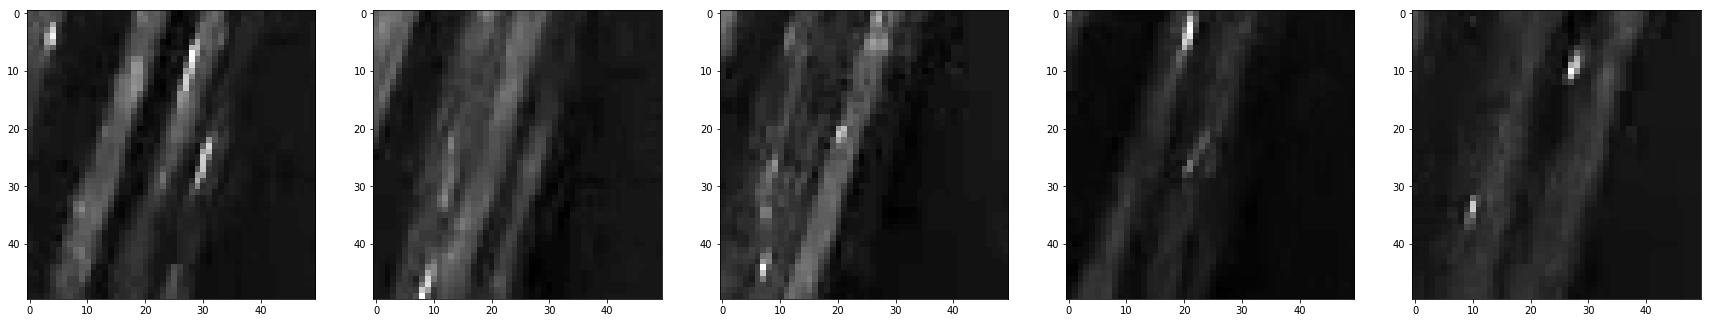

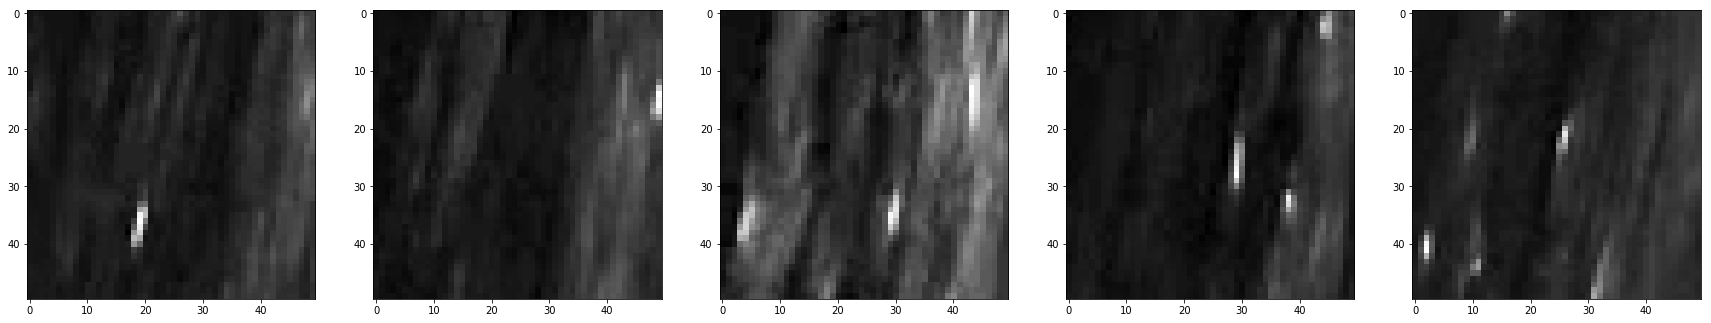

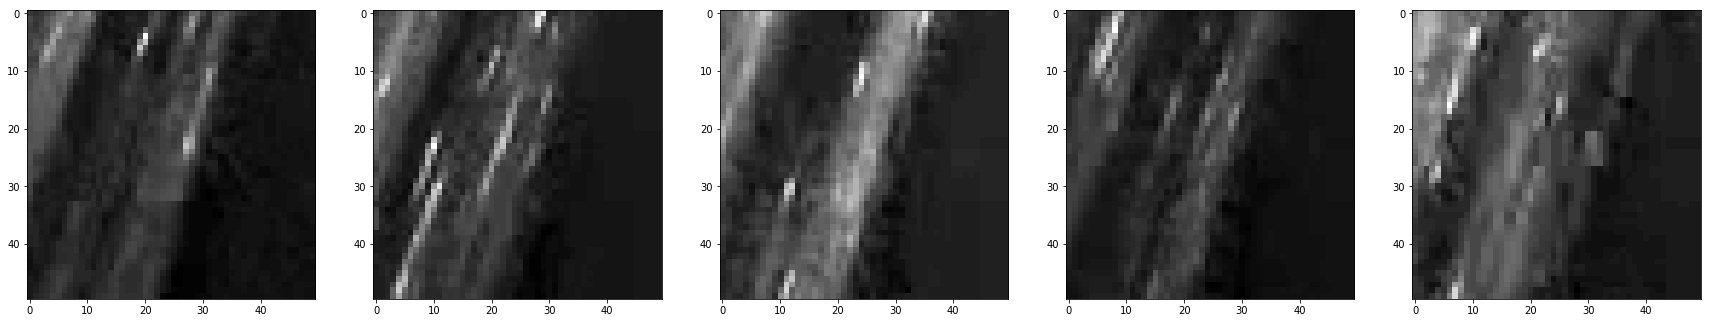

class_id=fish swimming


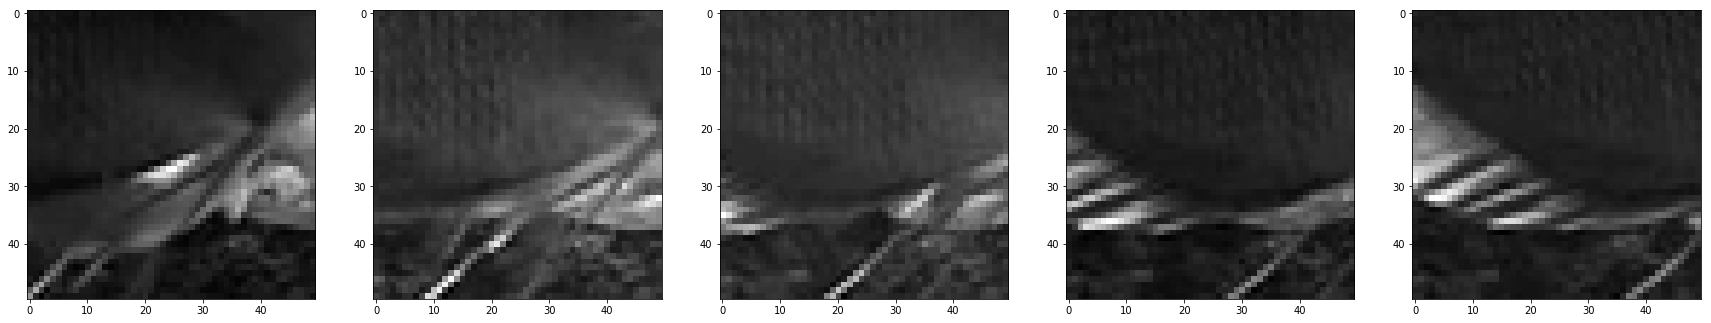

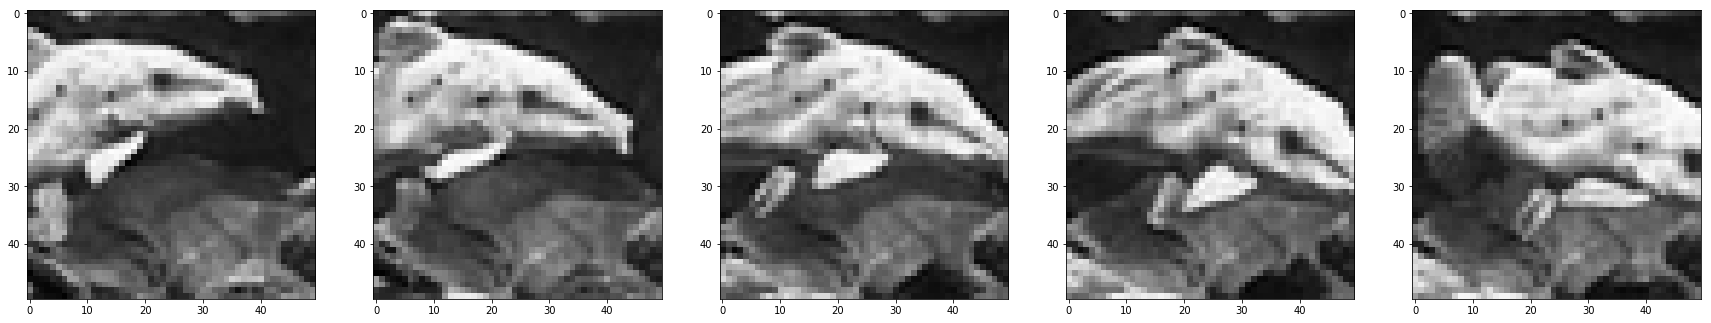

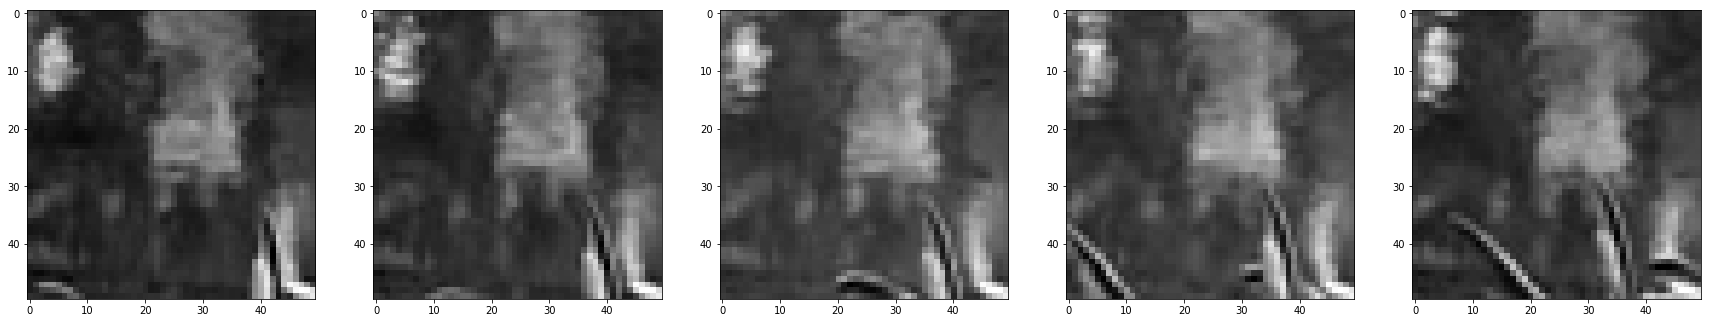

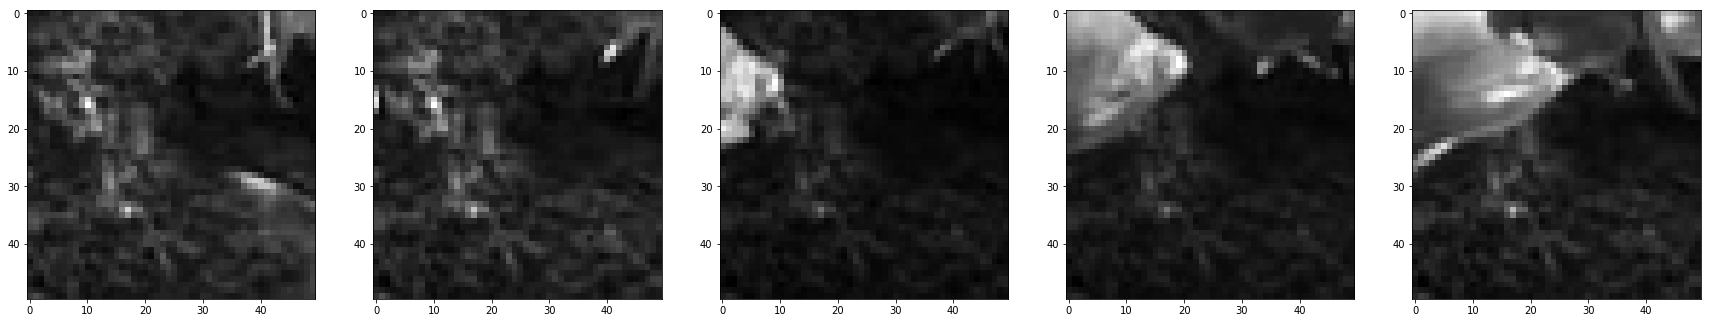

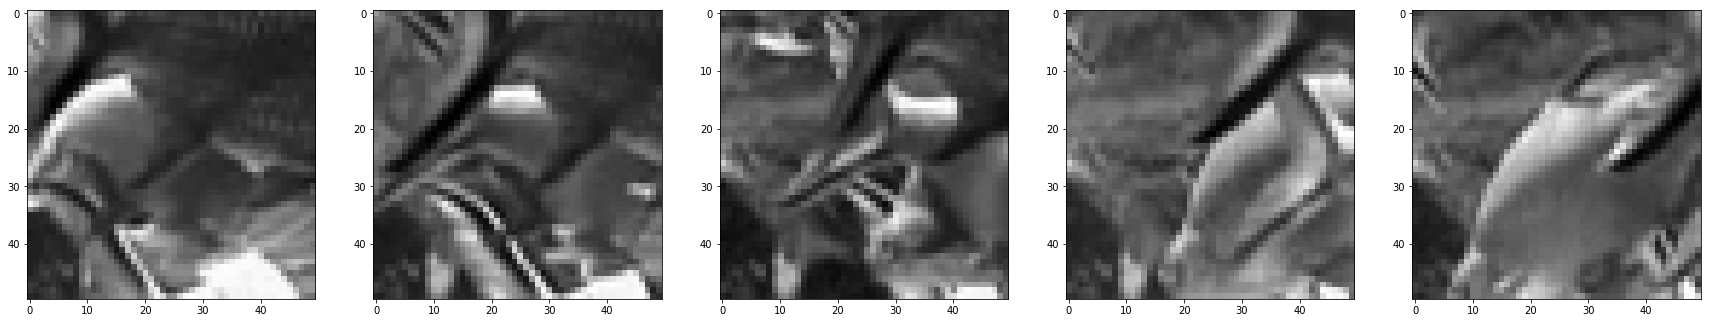

class_id=underwater life (soft texture)


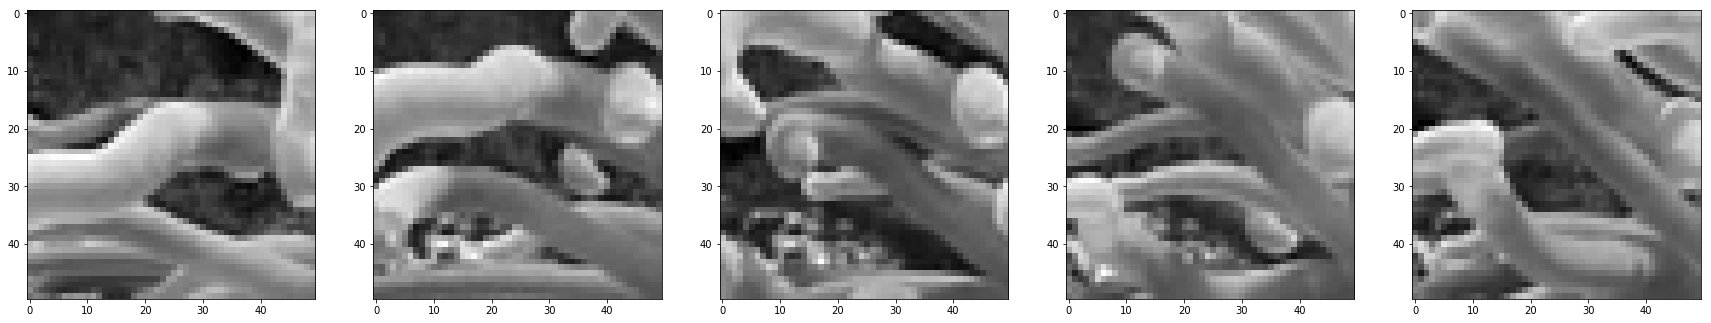

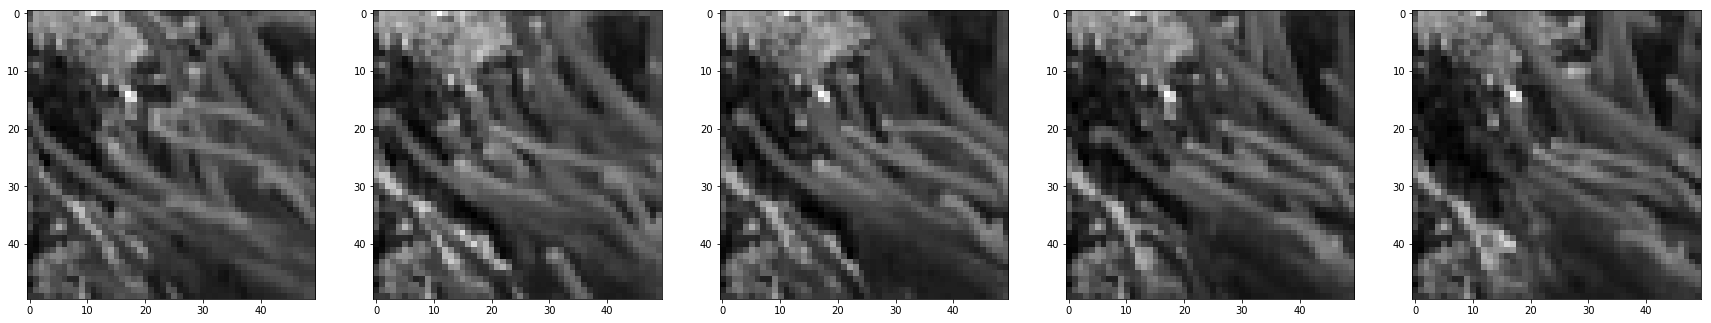

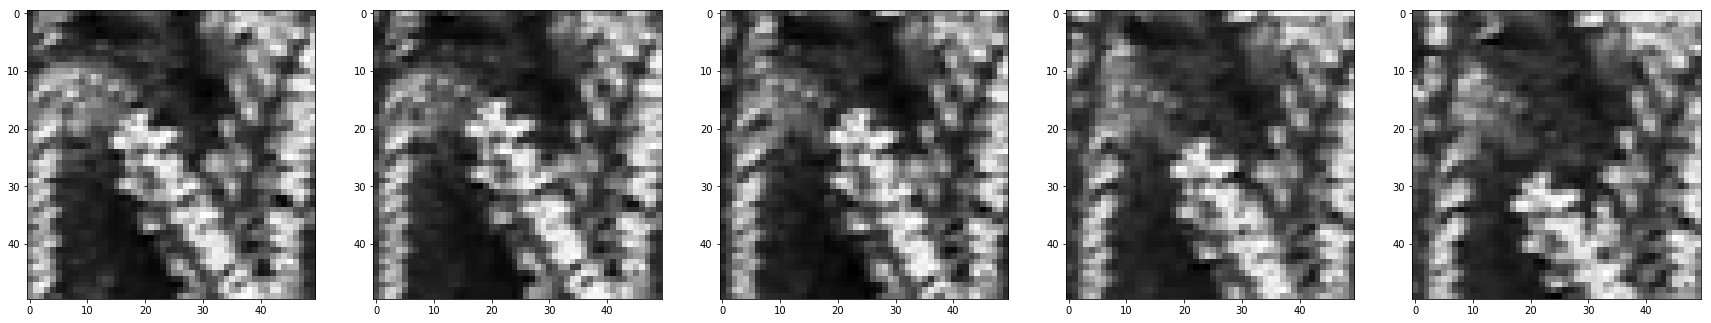

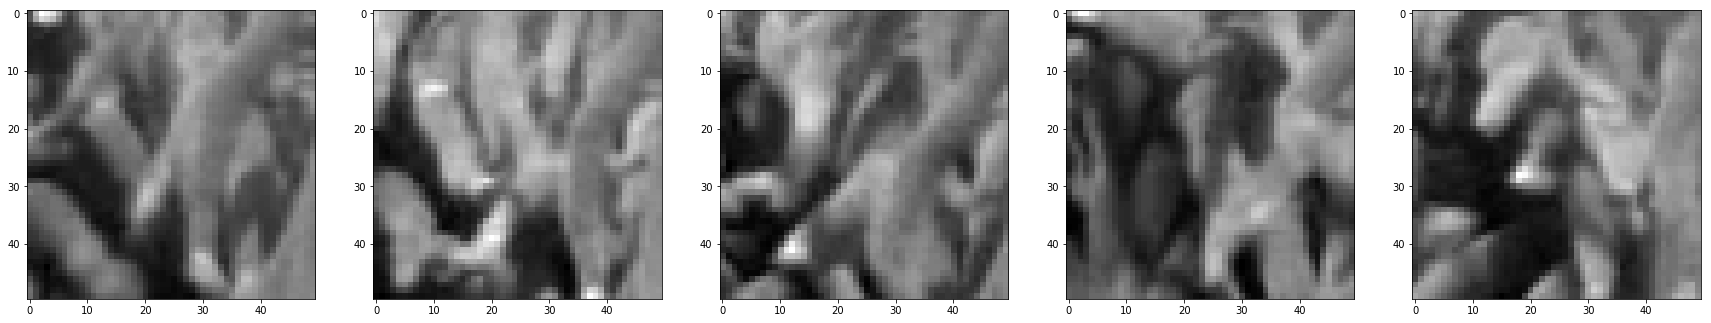

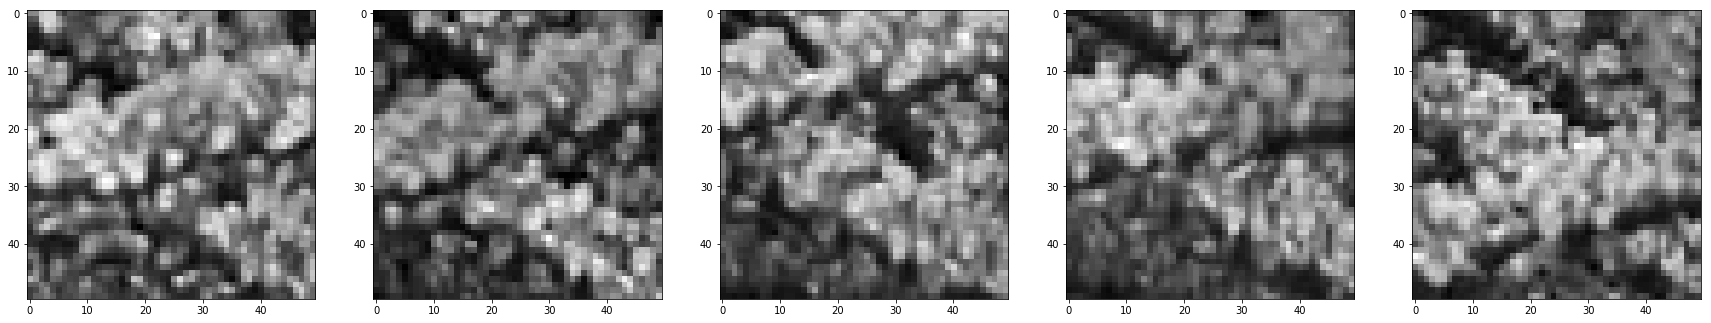

class_id=underwater life (more structured texture)


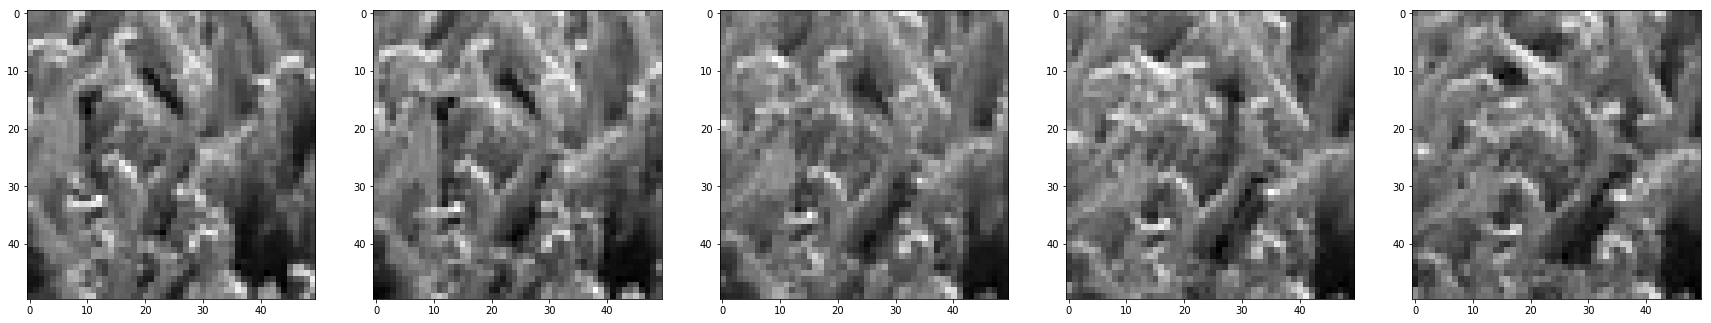

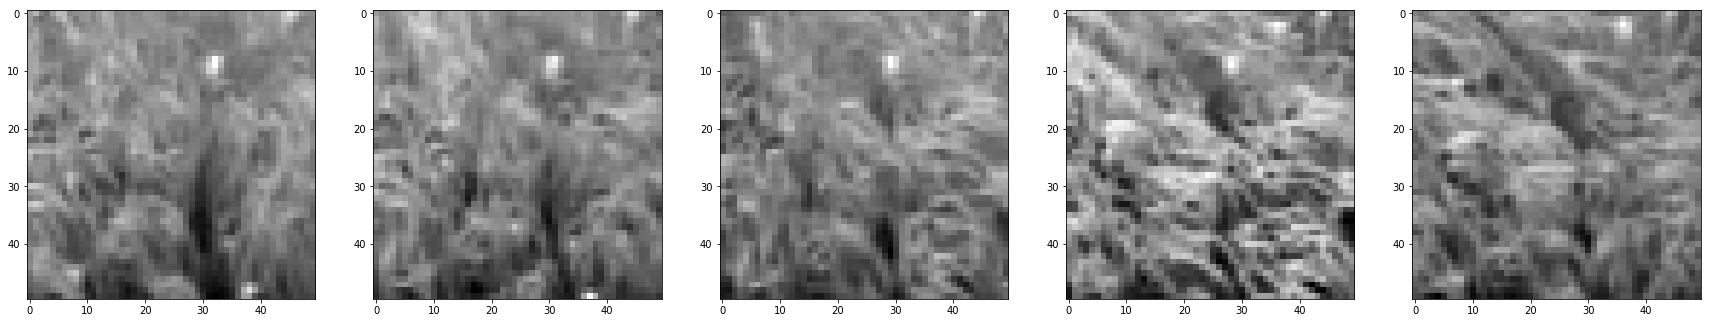

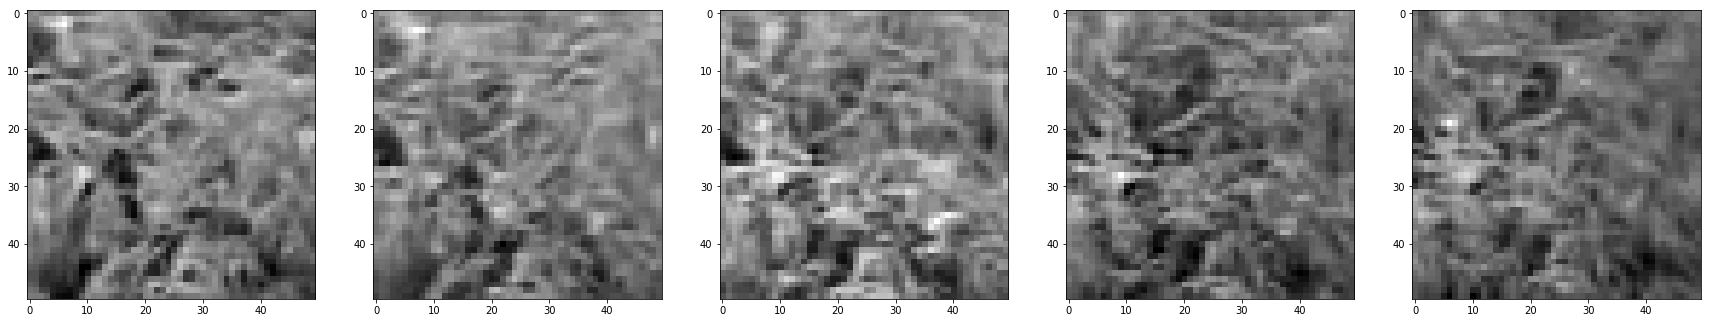

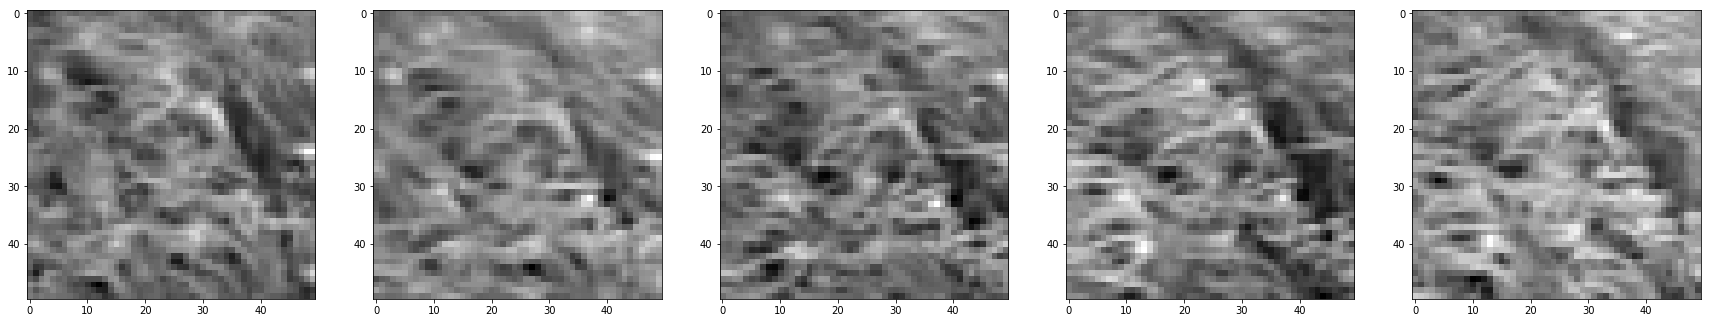

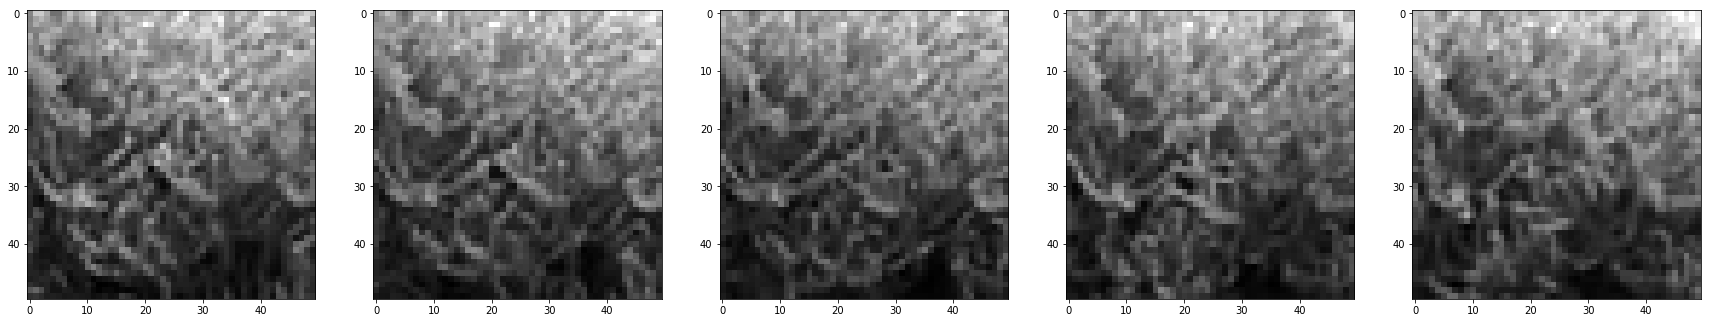

class_id=underwater life (pulsating jellyfish)


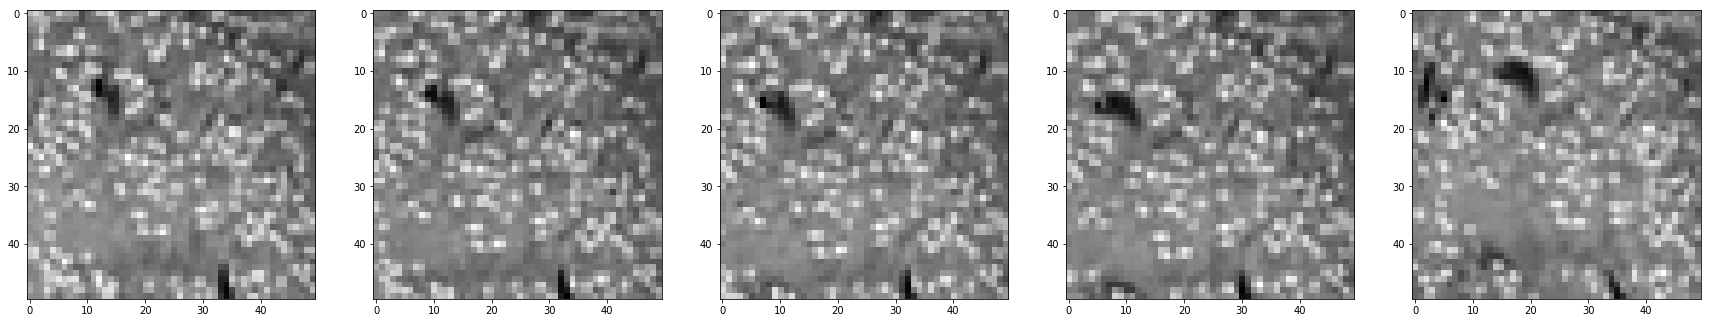

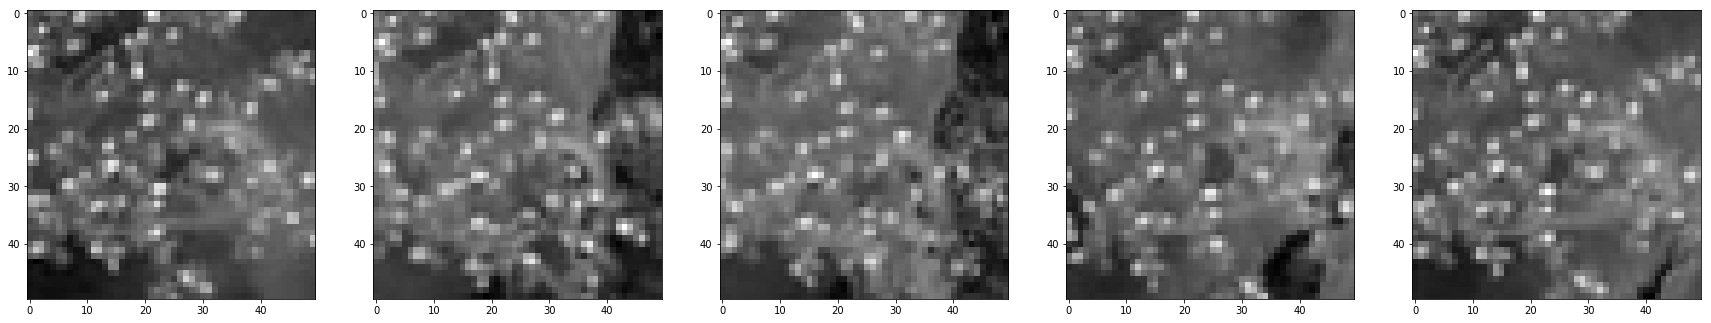

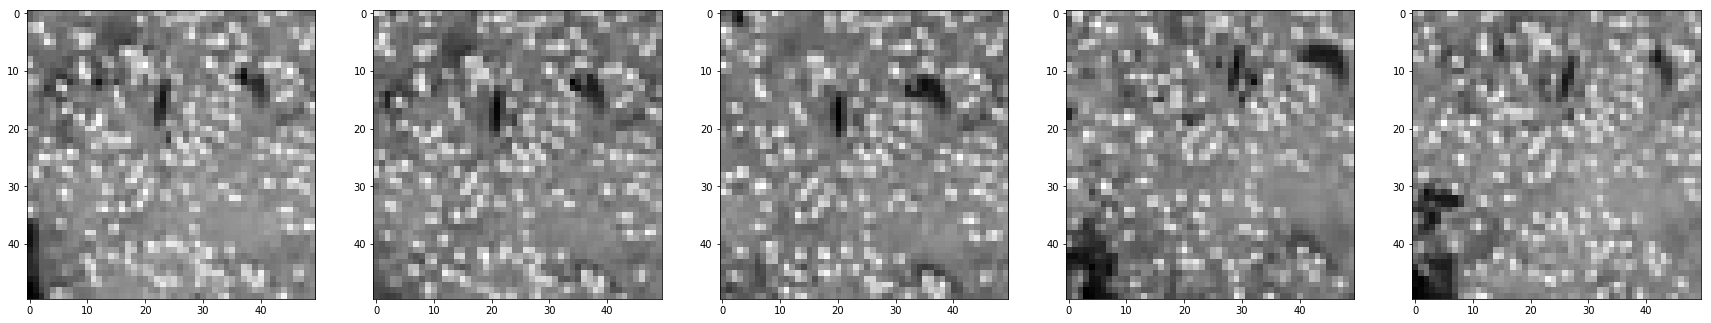

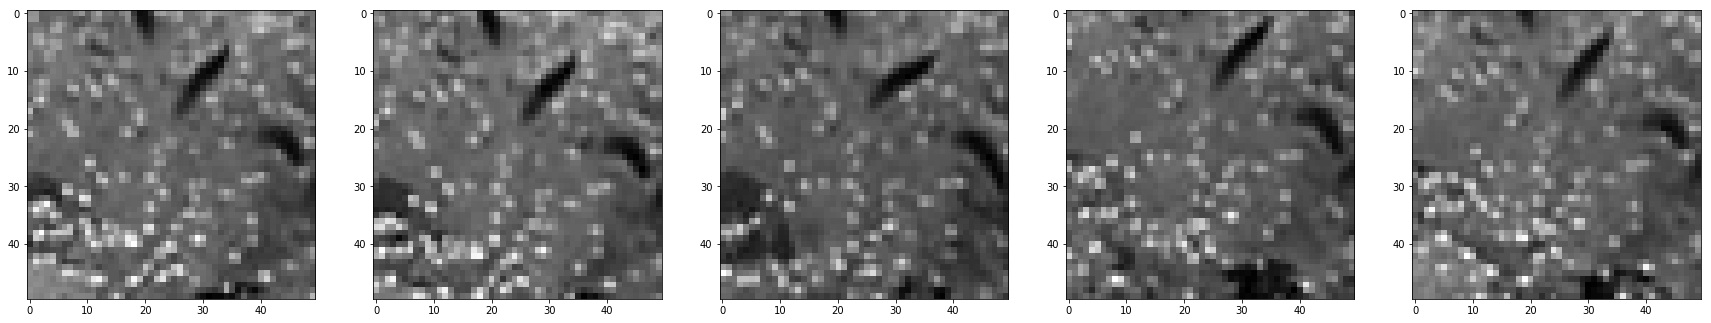

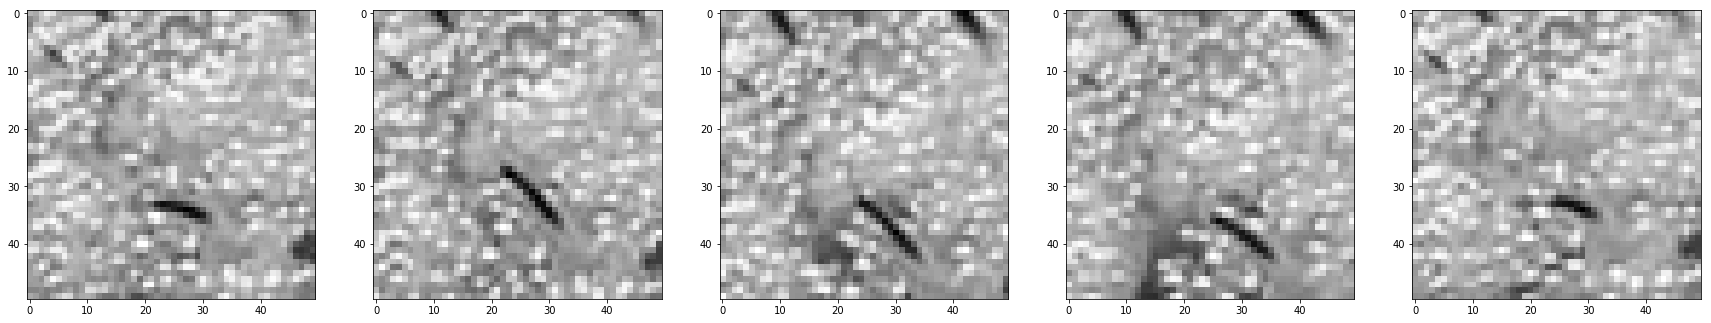

class_id=underwater life (flowers swaying with current)


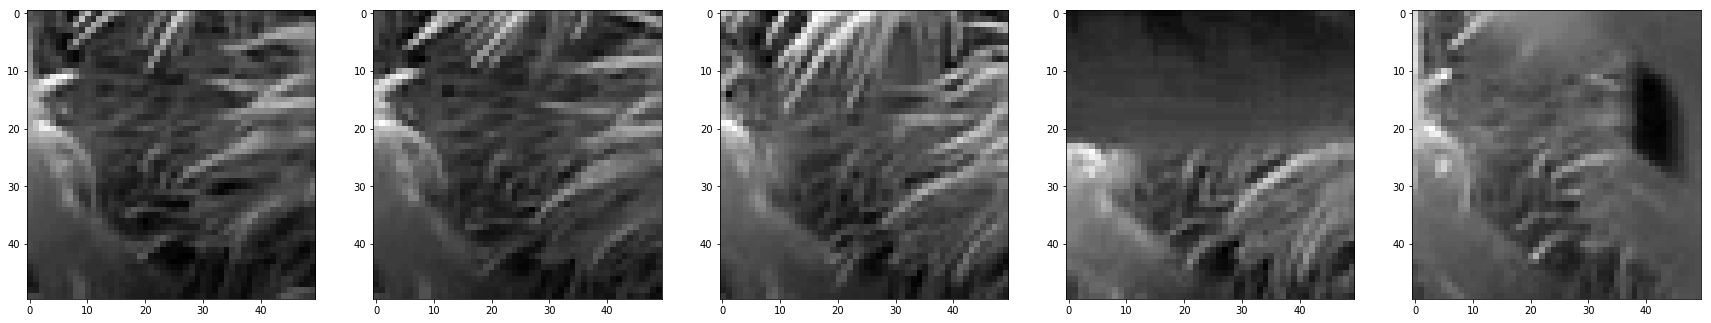

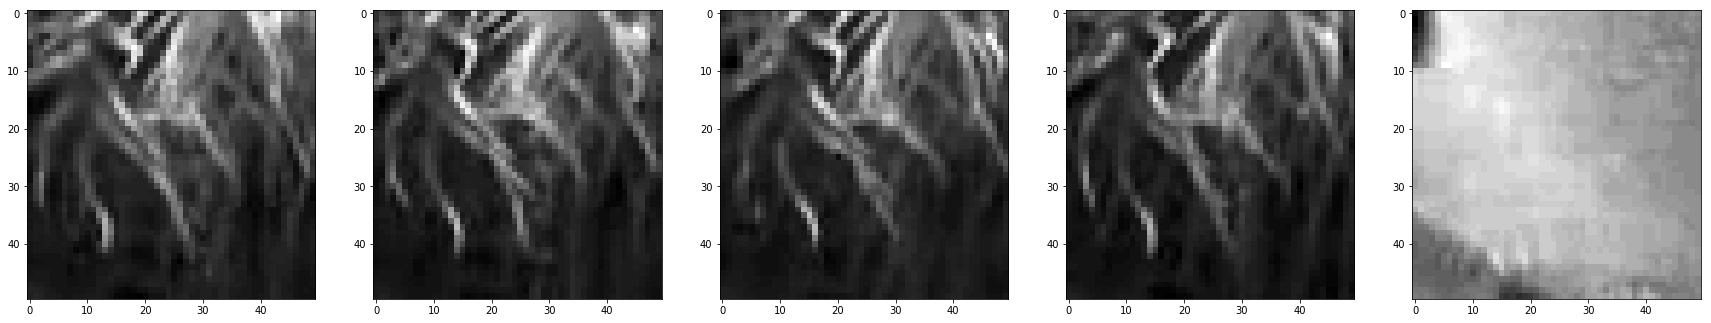

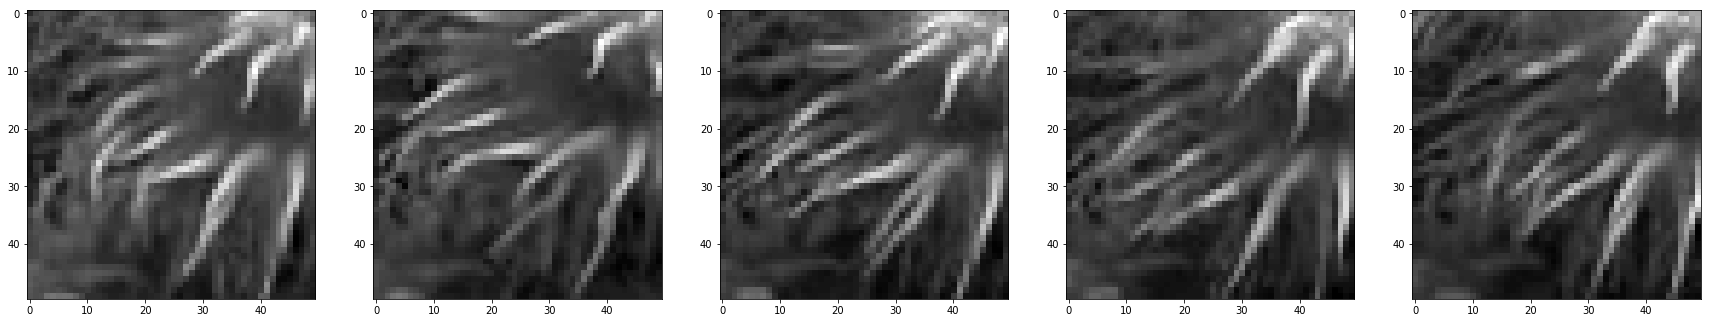

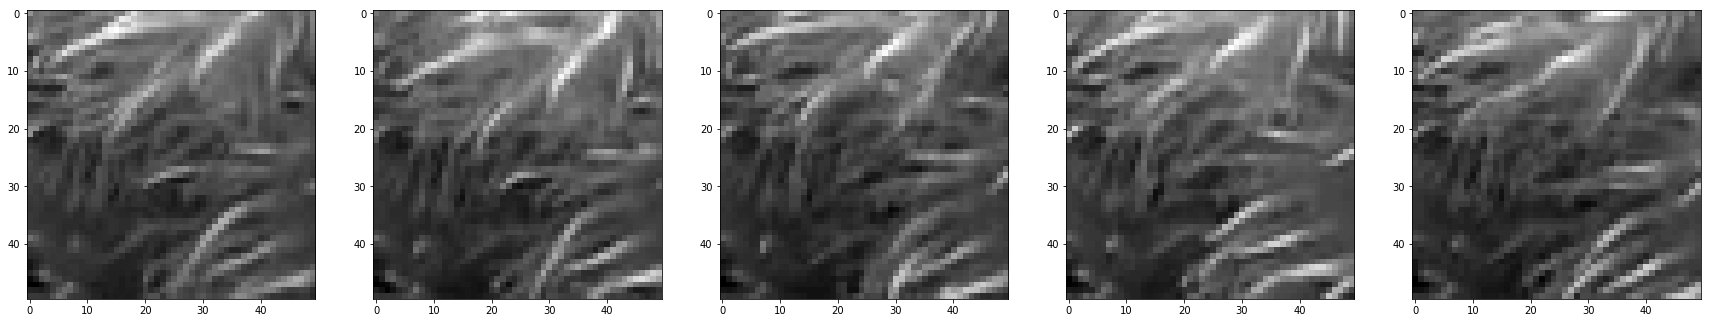

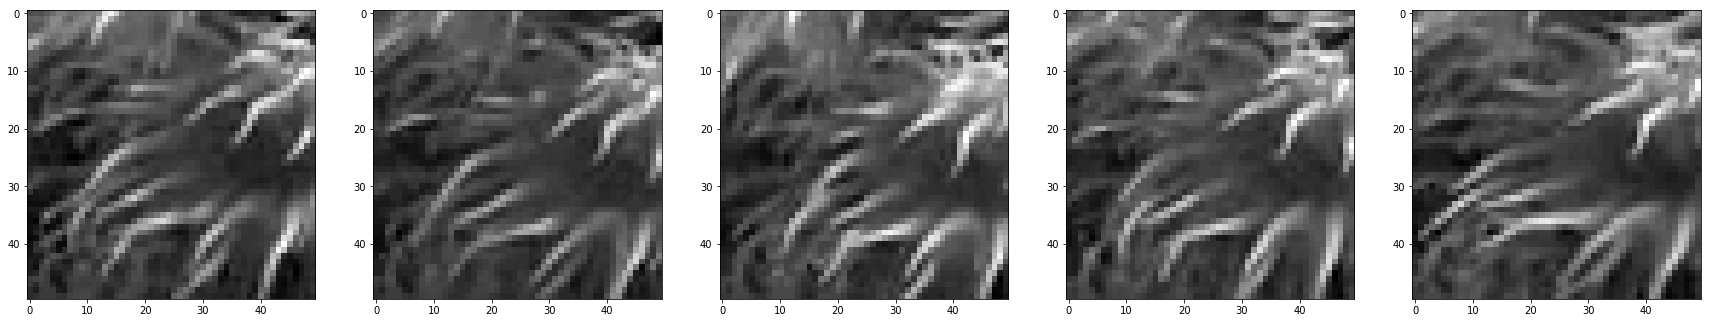

class_id=ants


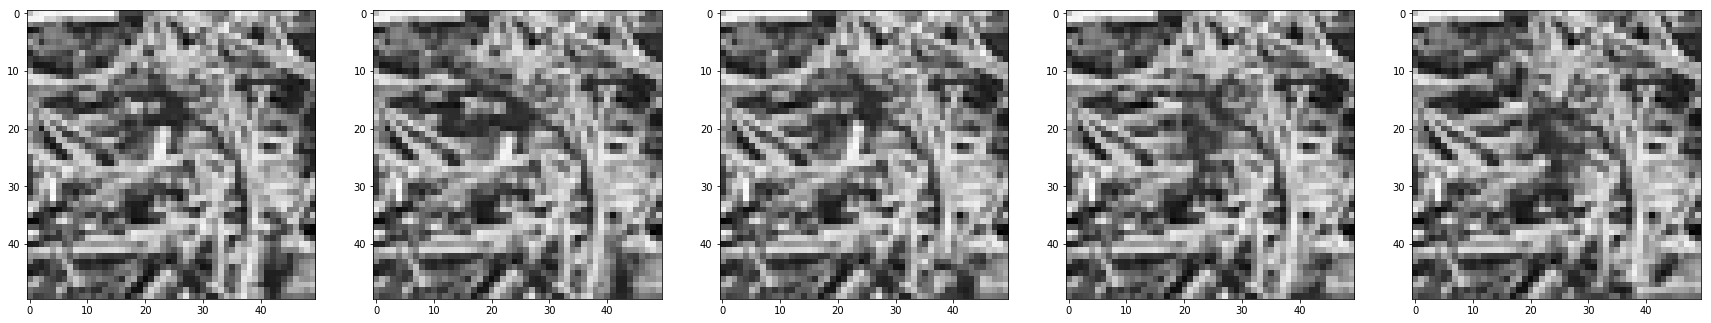

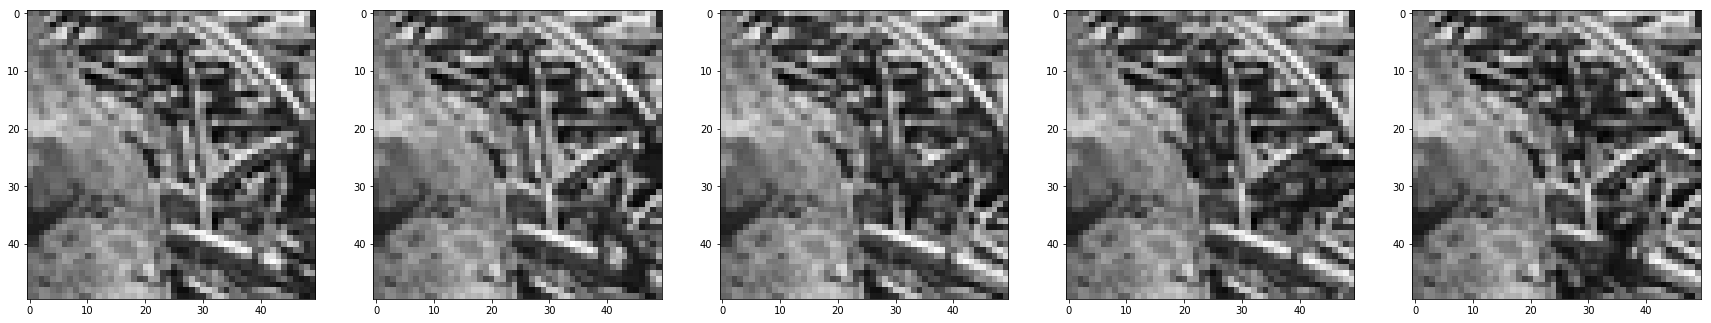

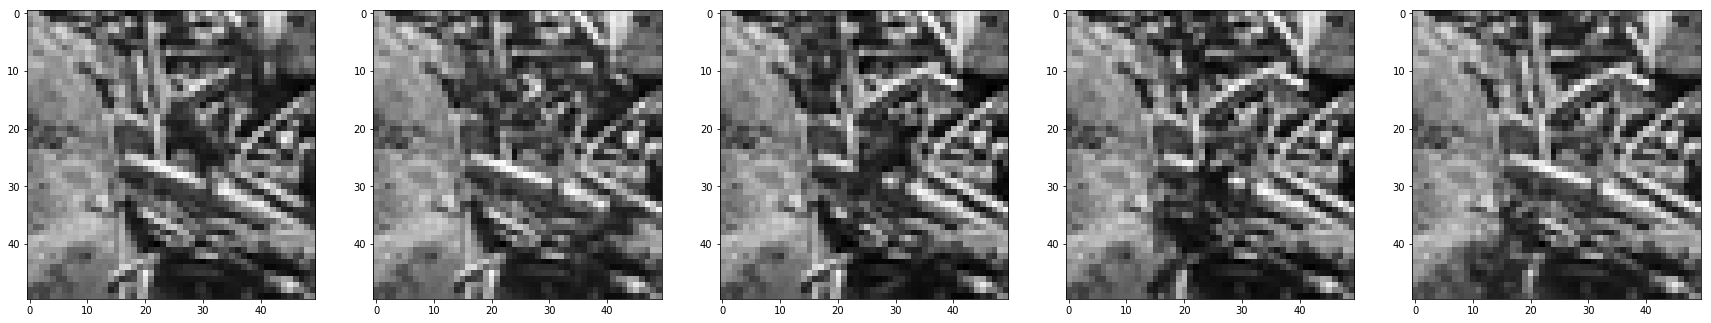

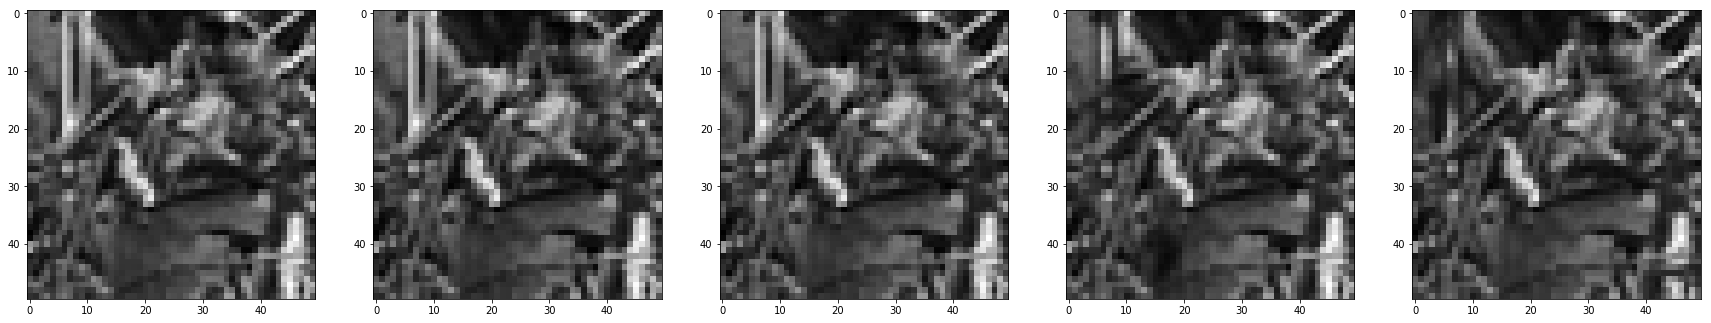

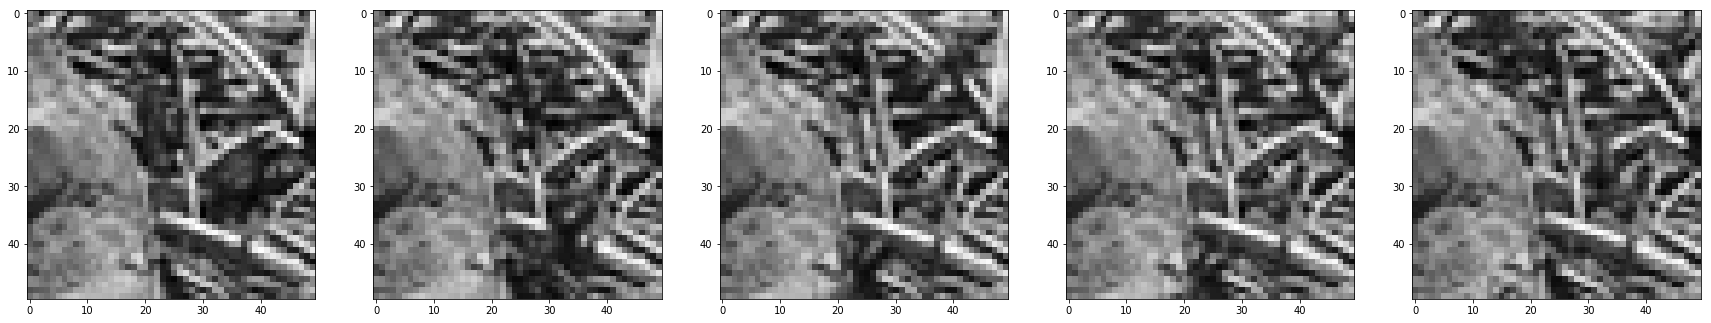

class_id=waterfall


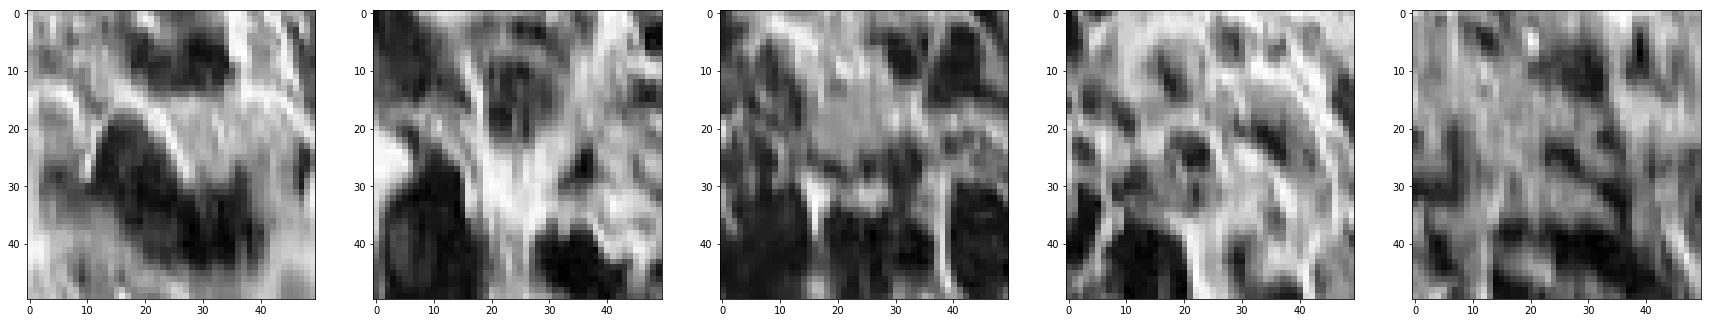

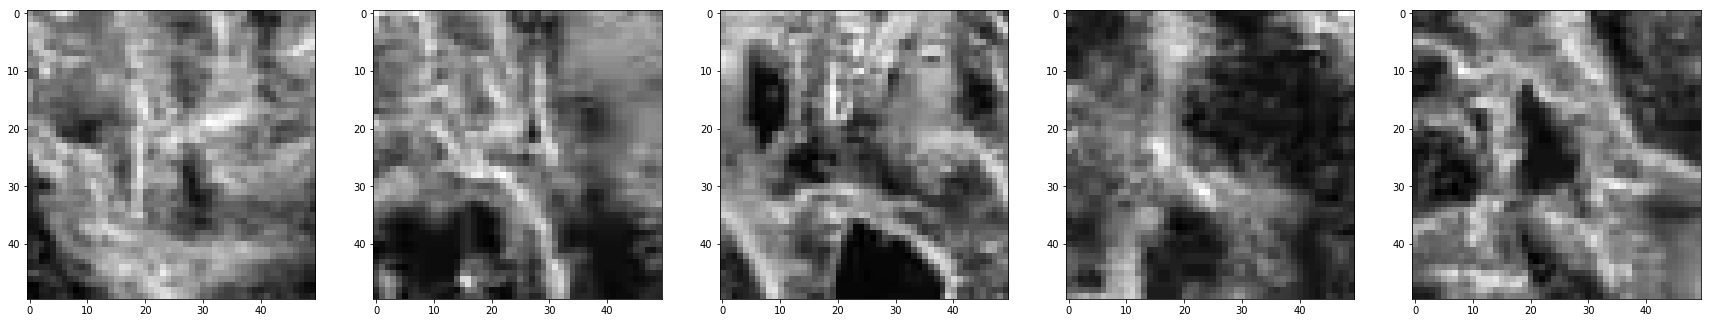

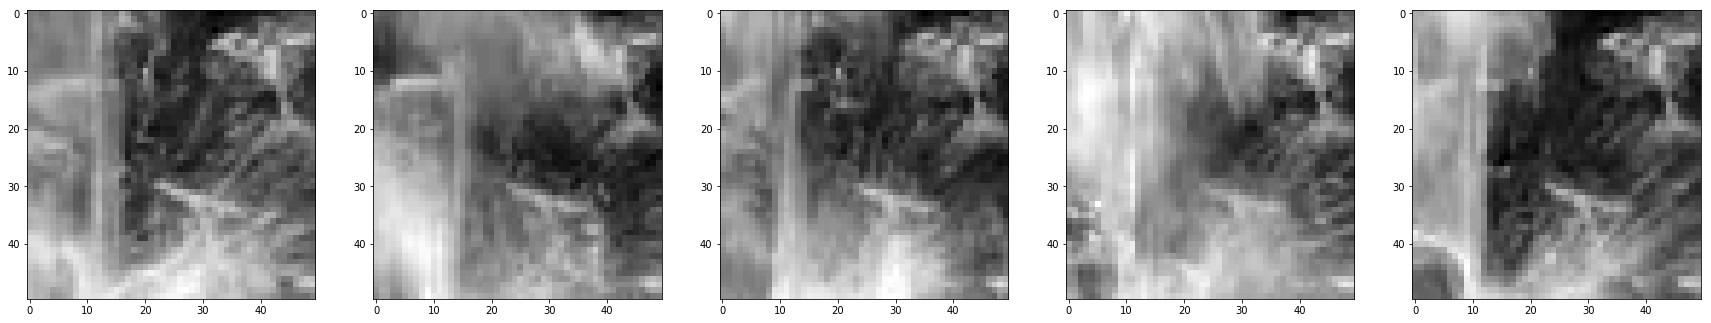

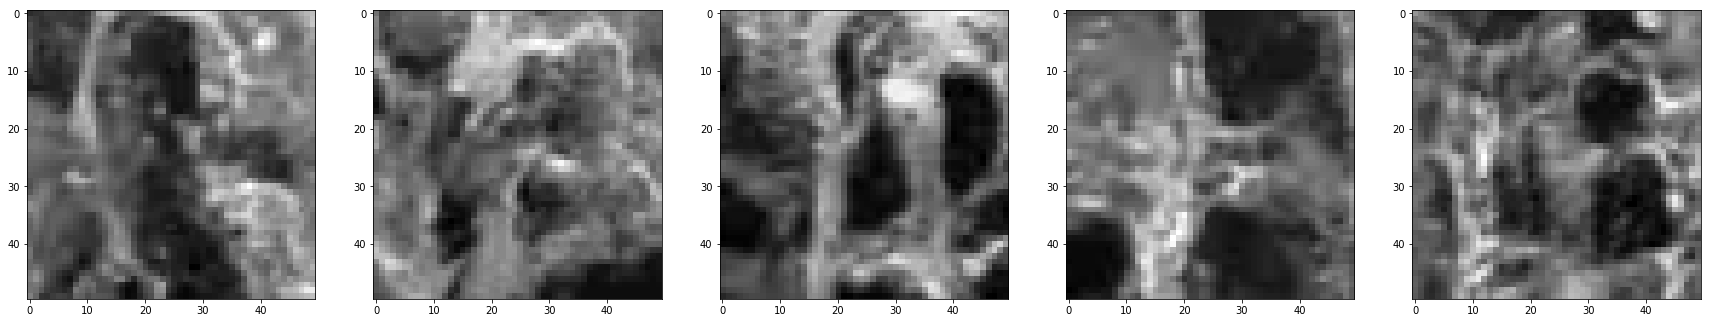

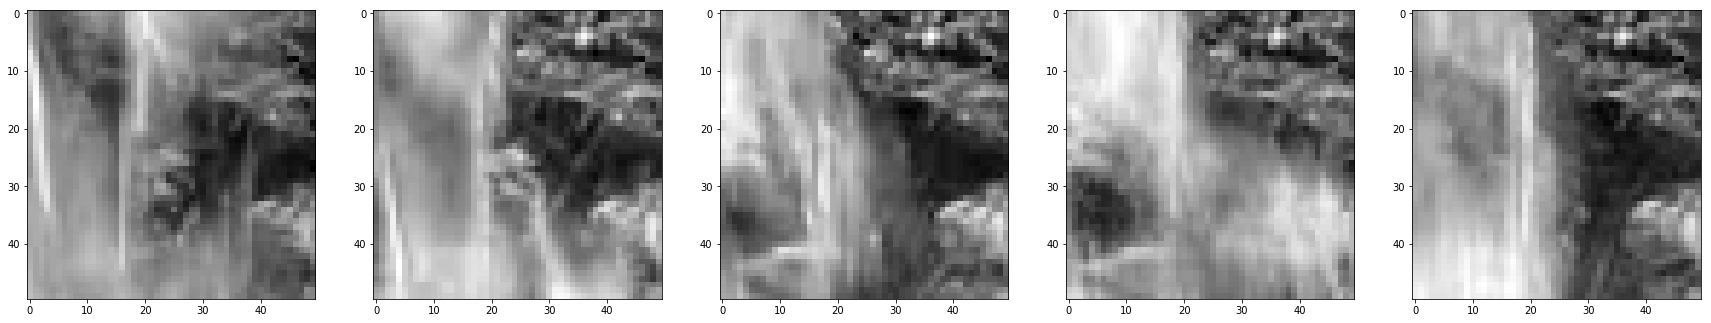

class_id=candles (different views and zooming levels)


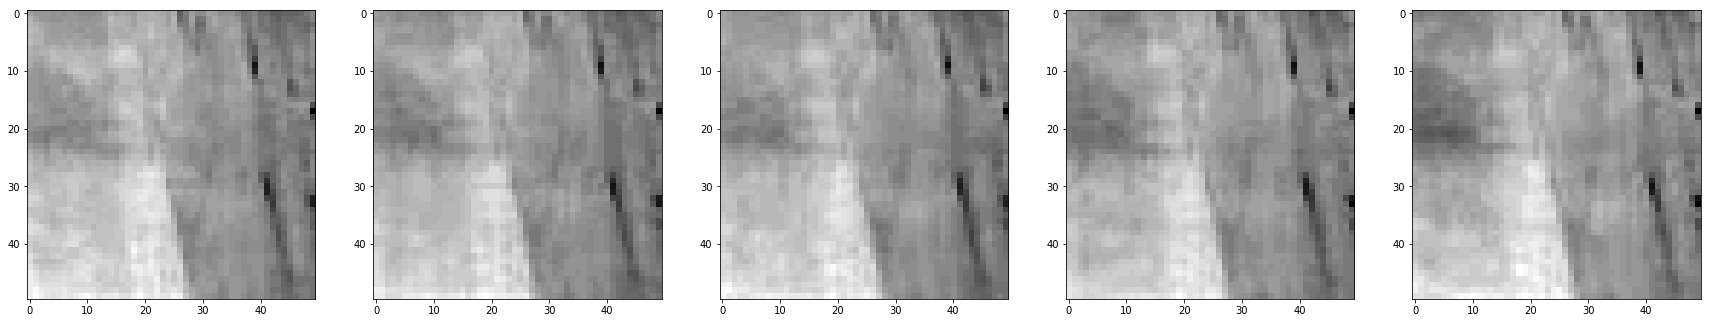

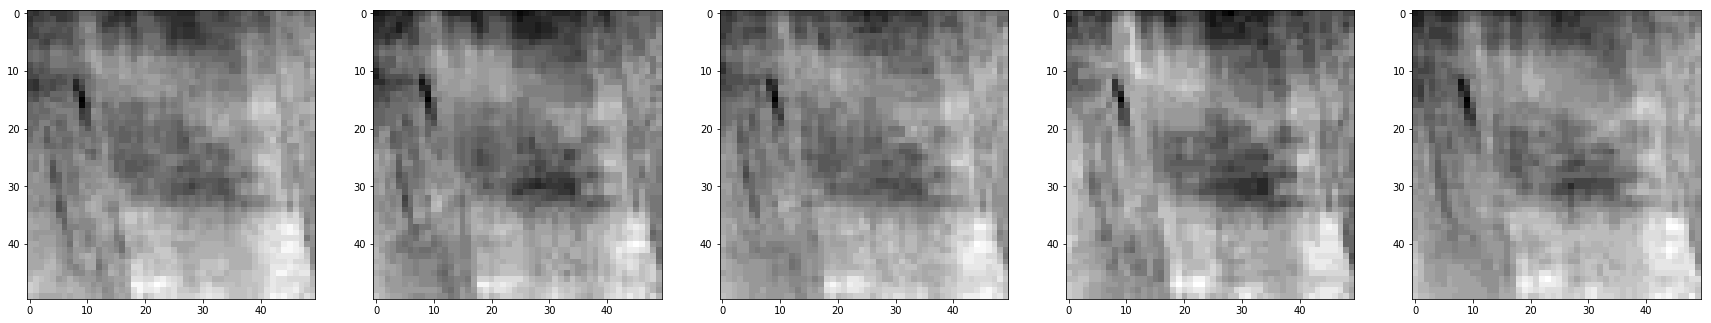

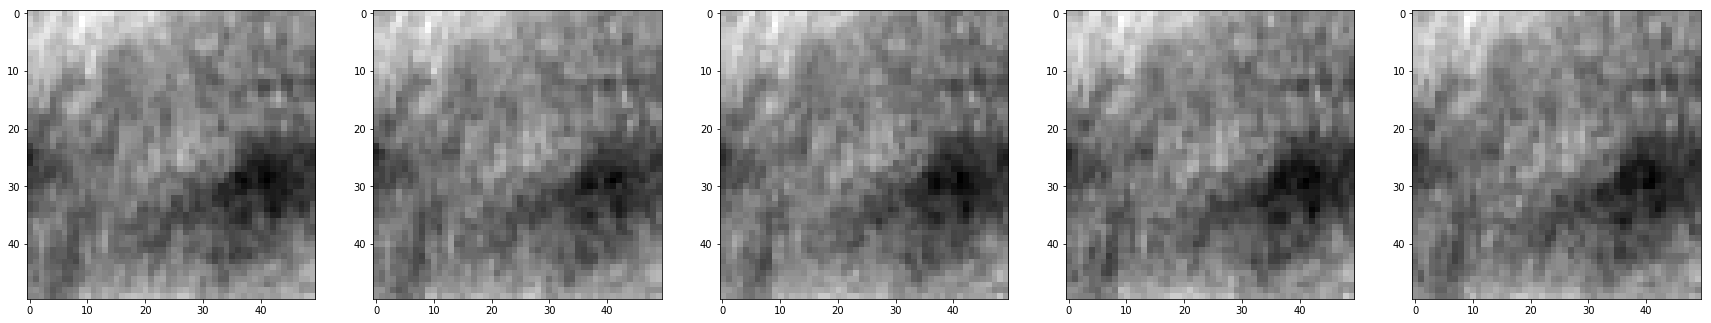

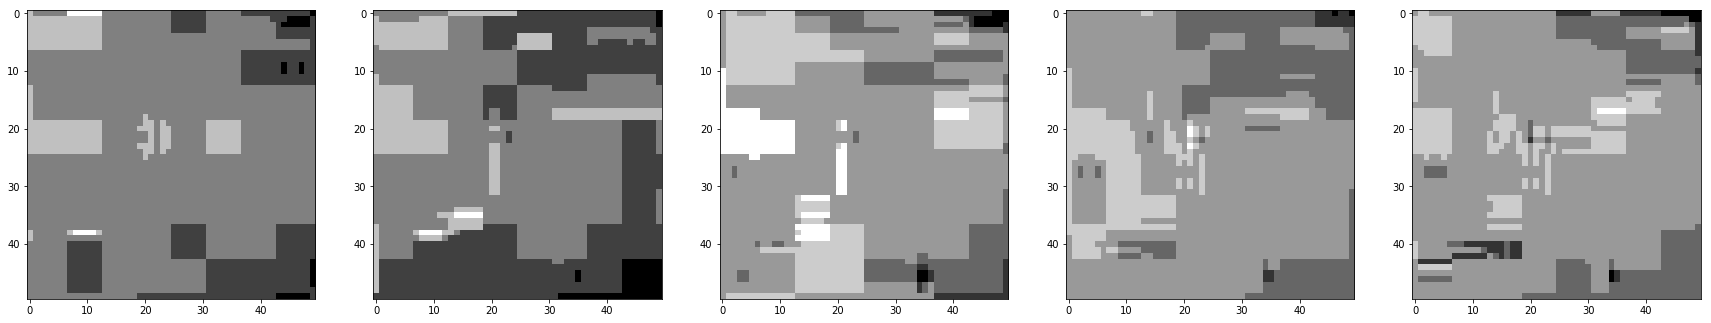

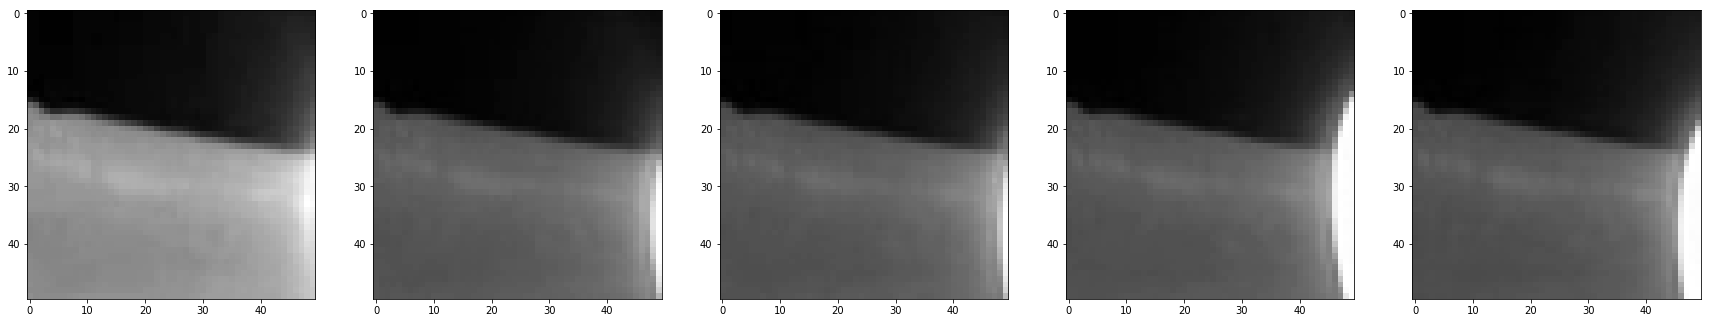

class_id=rain on water


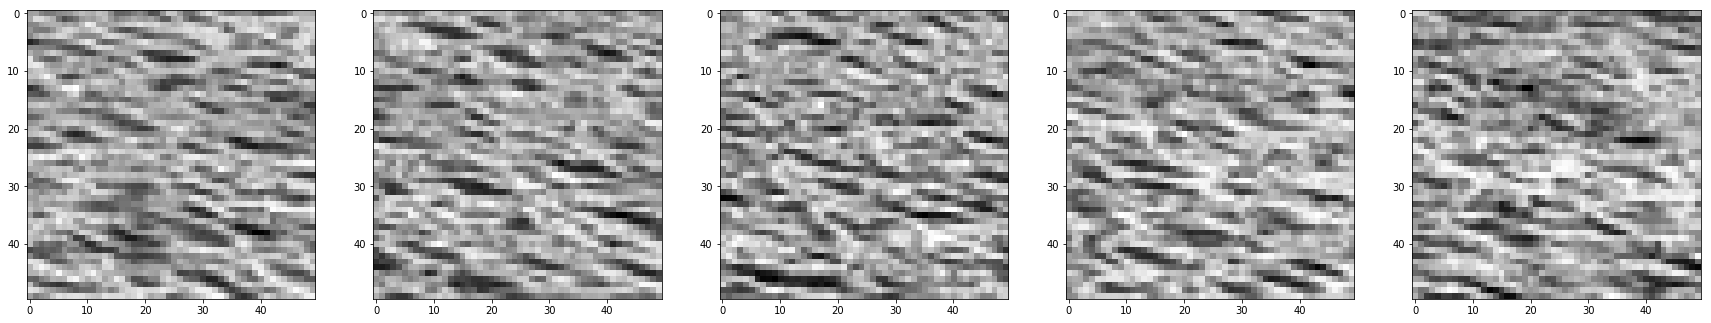

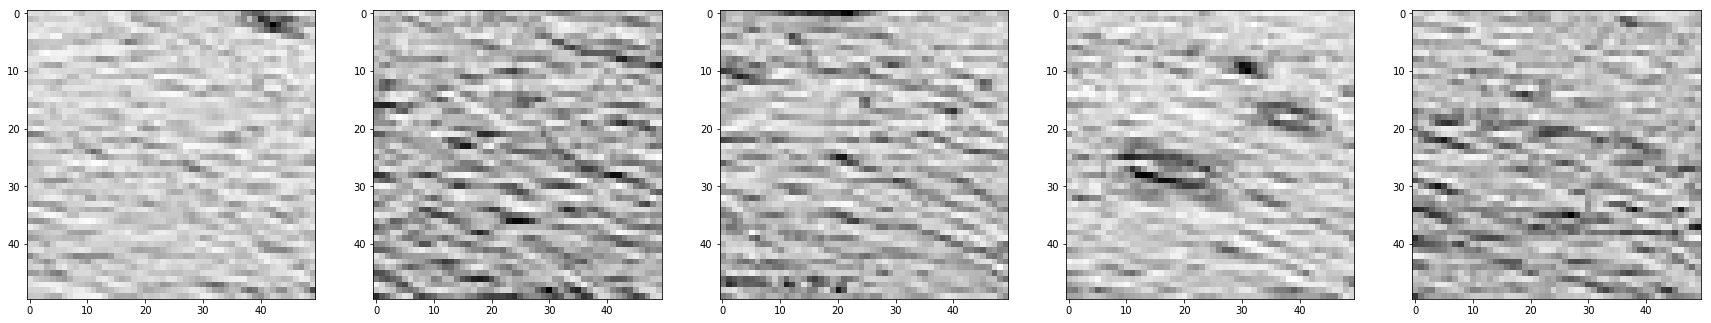

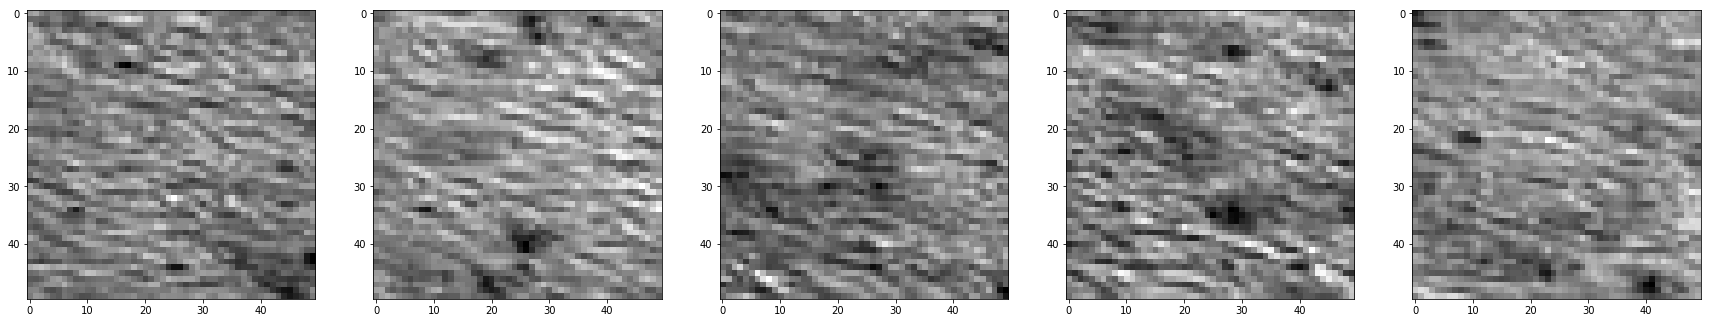

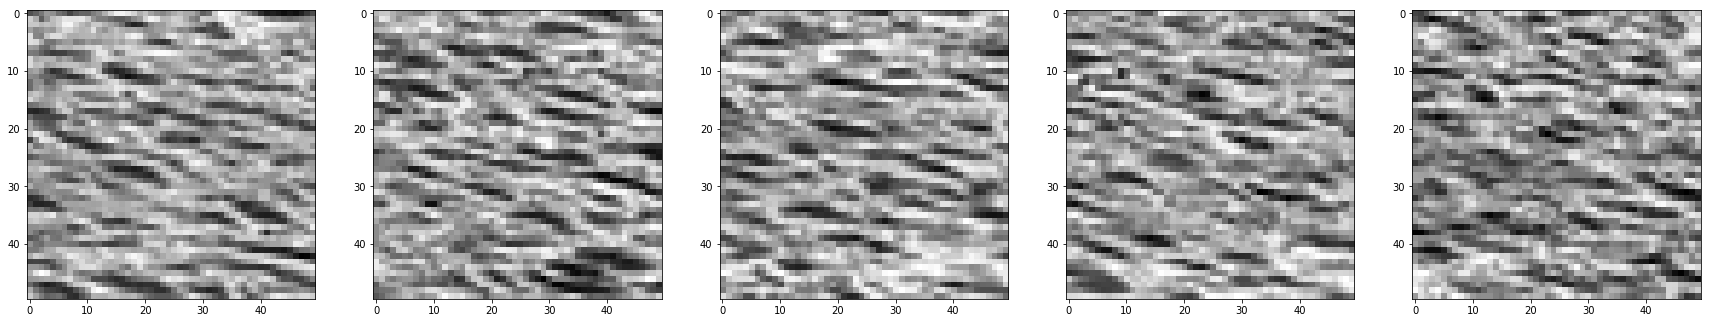

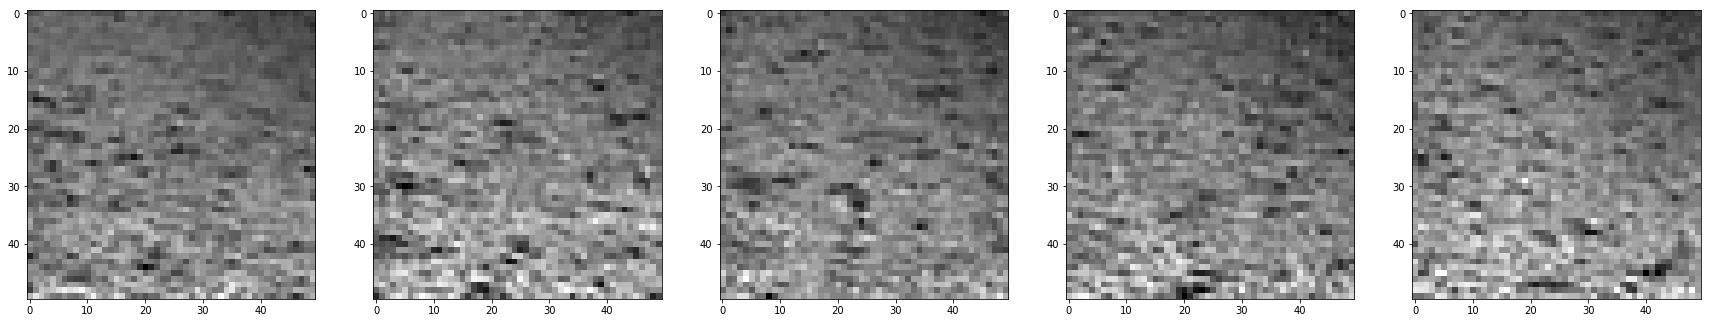

class_id=flushing water


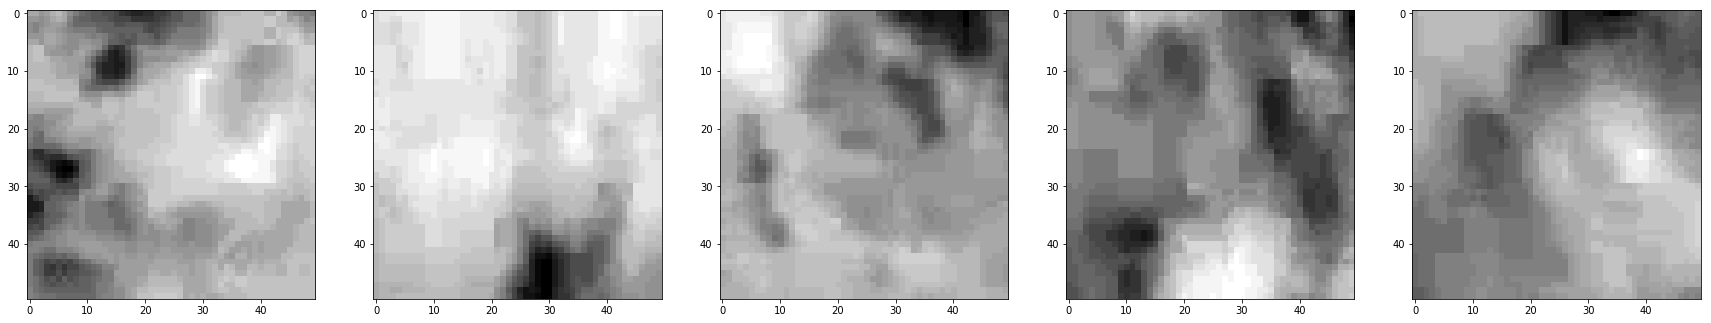

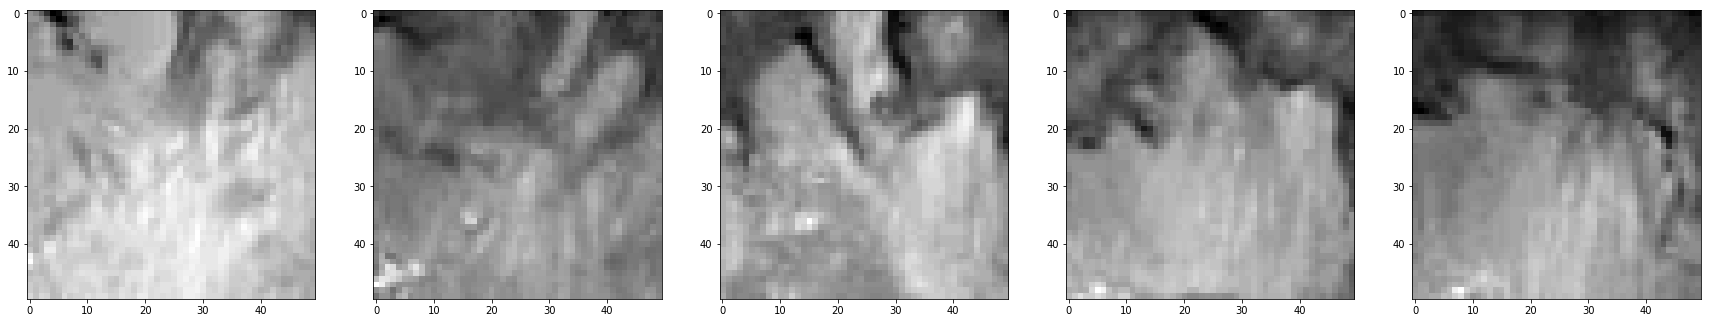

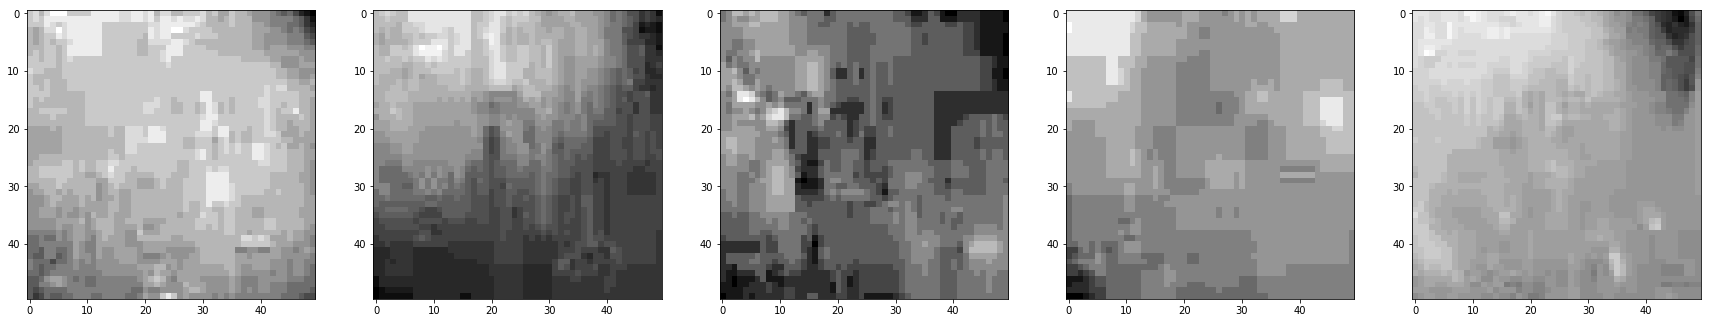

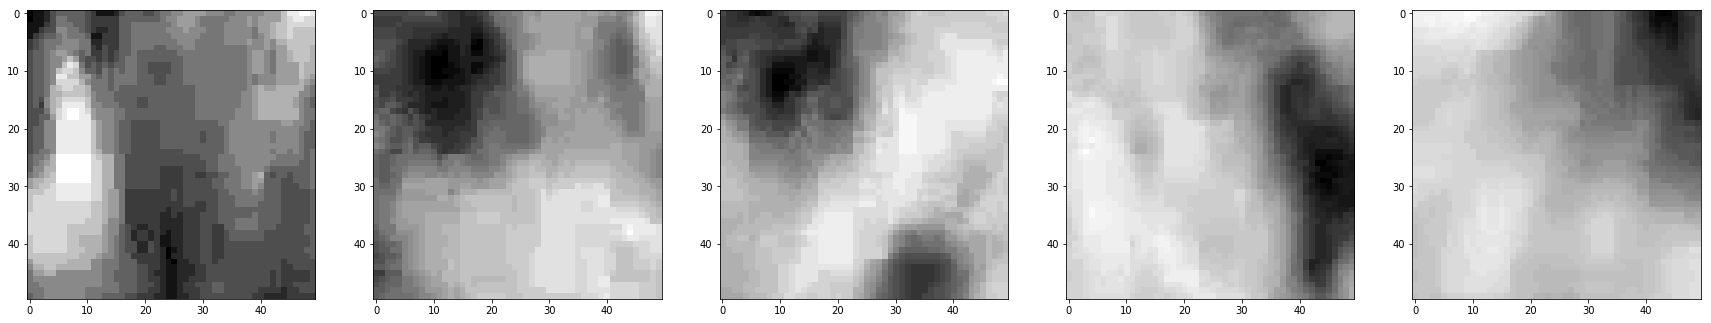

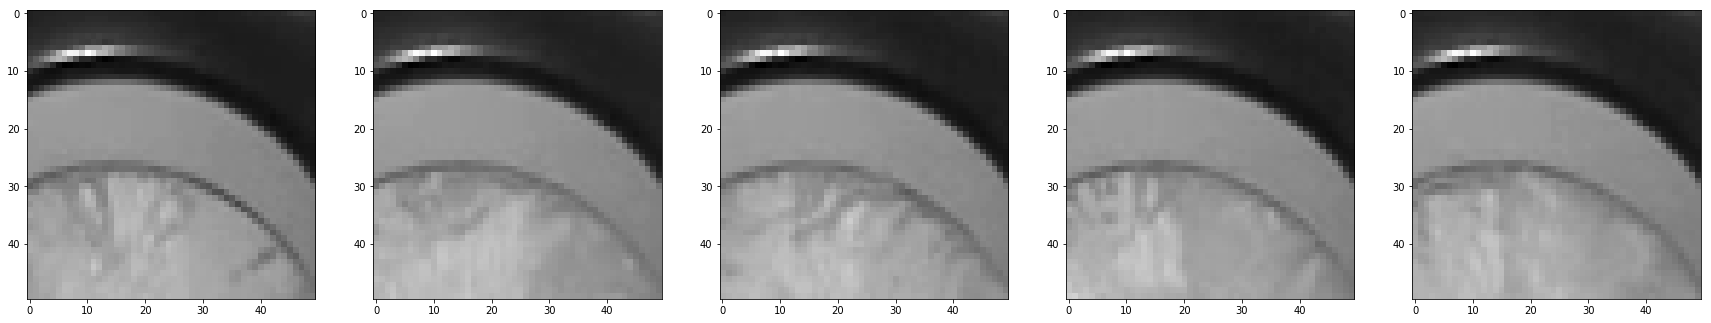

class_id=water in sink (going down drain)


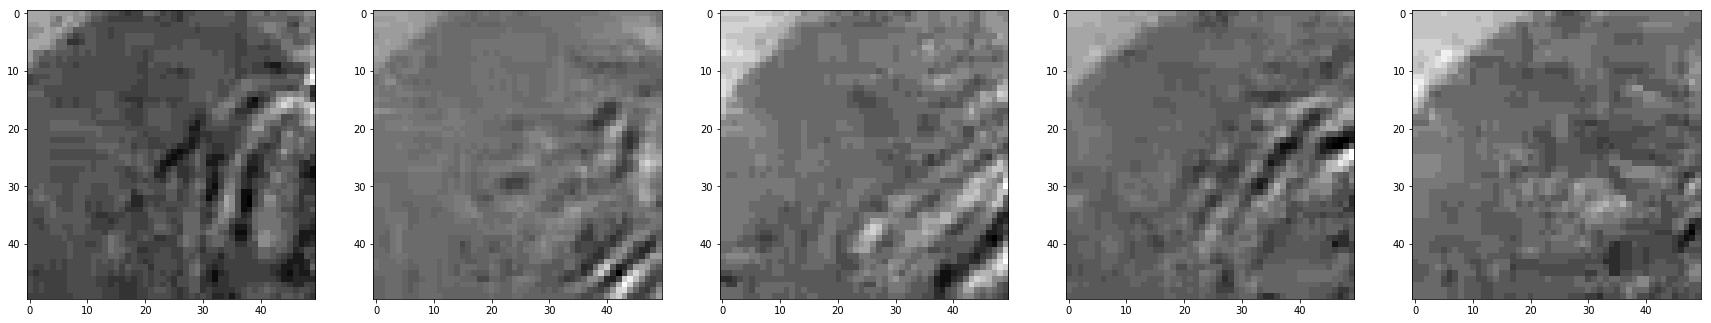

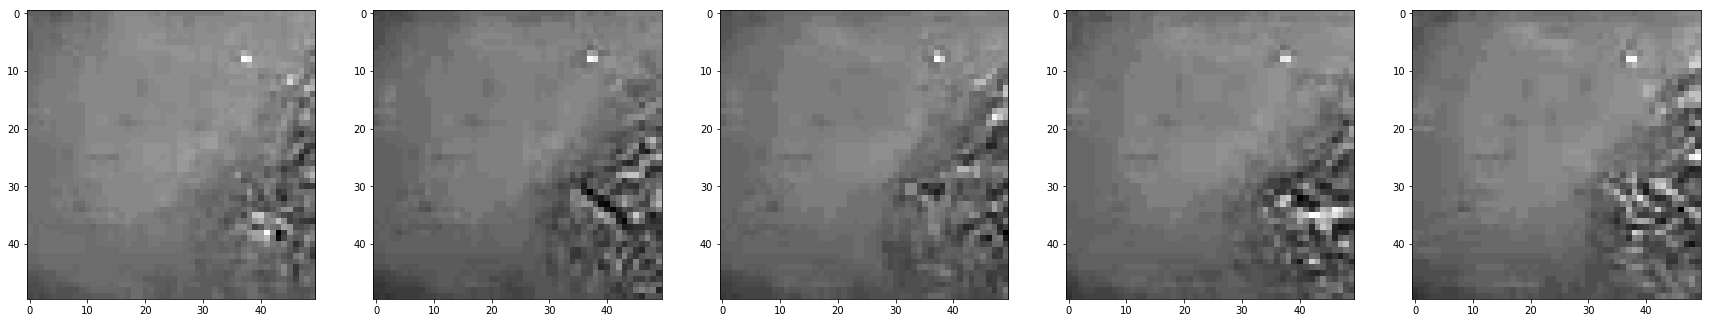

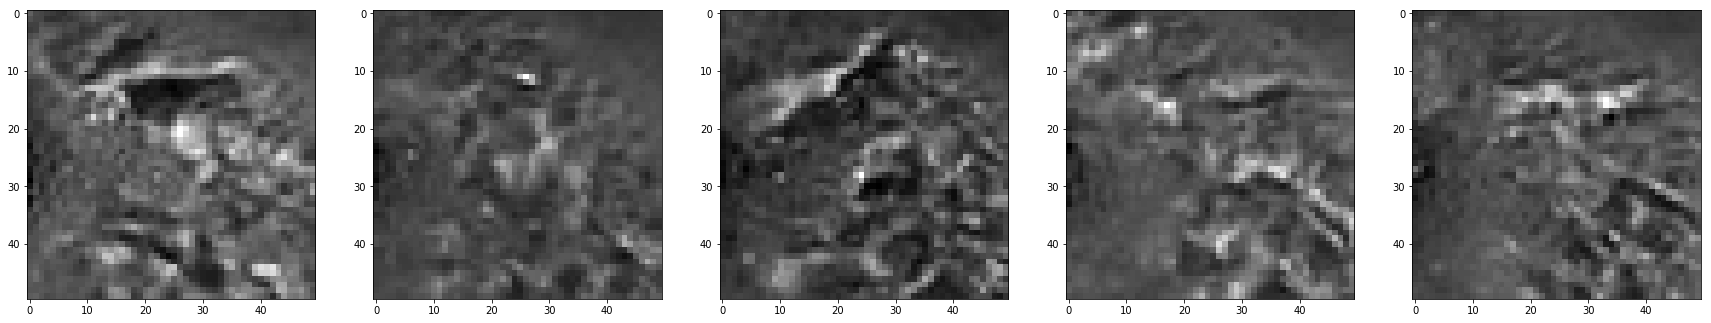

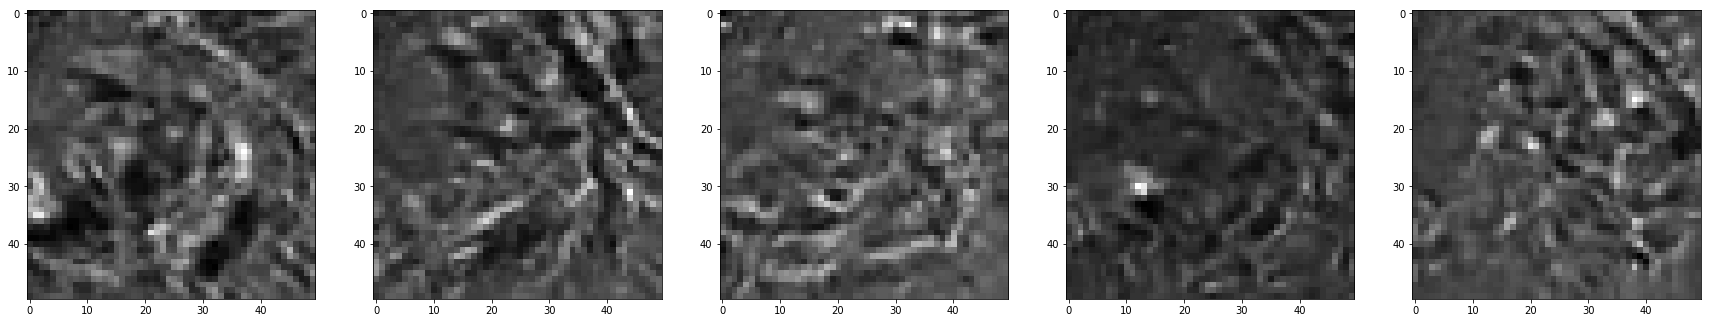

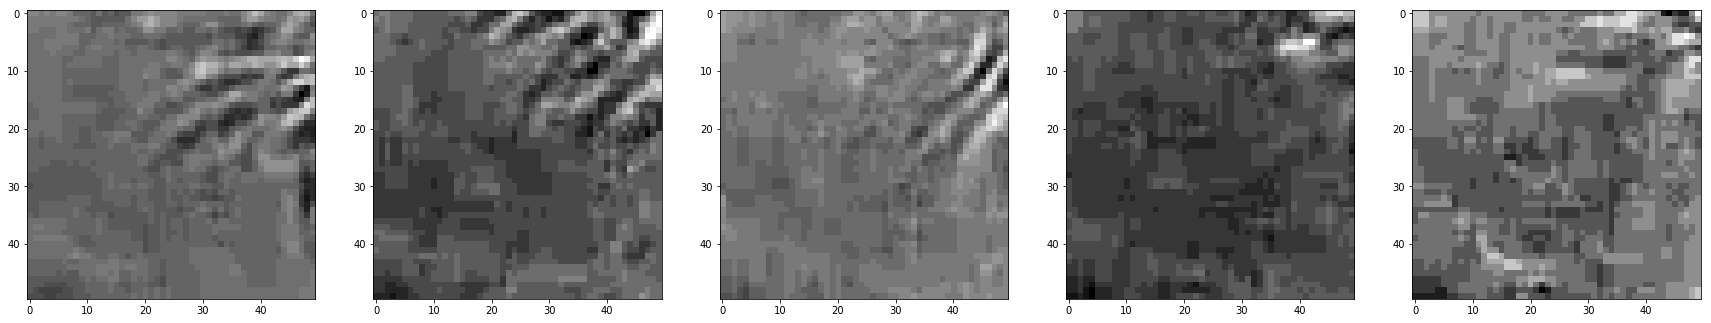

class_id=CD in CD player


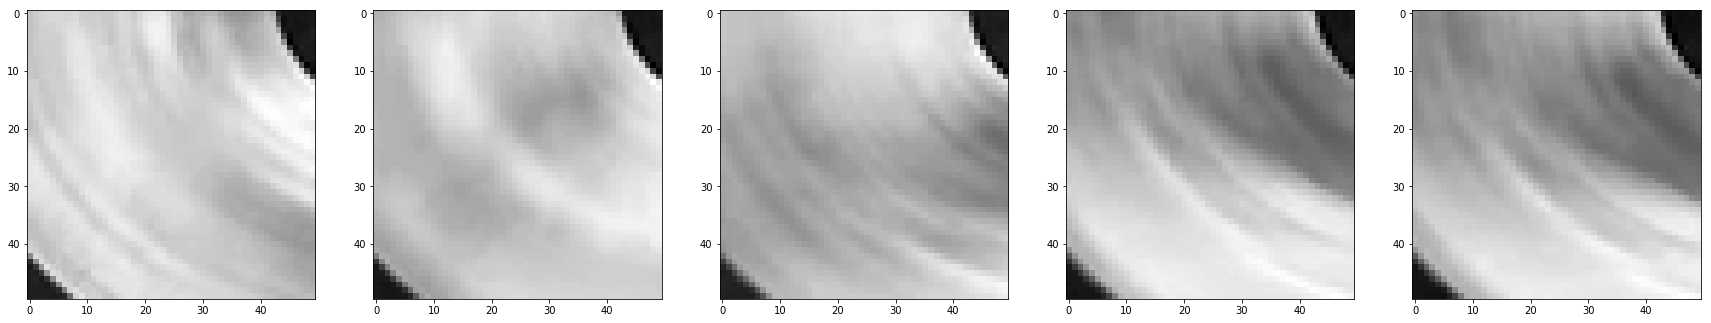

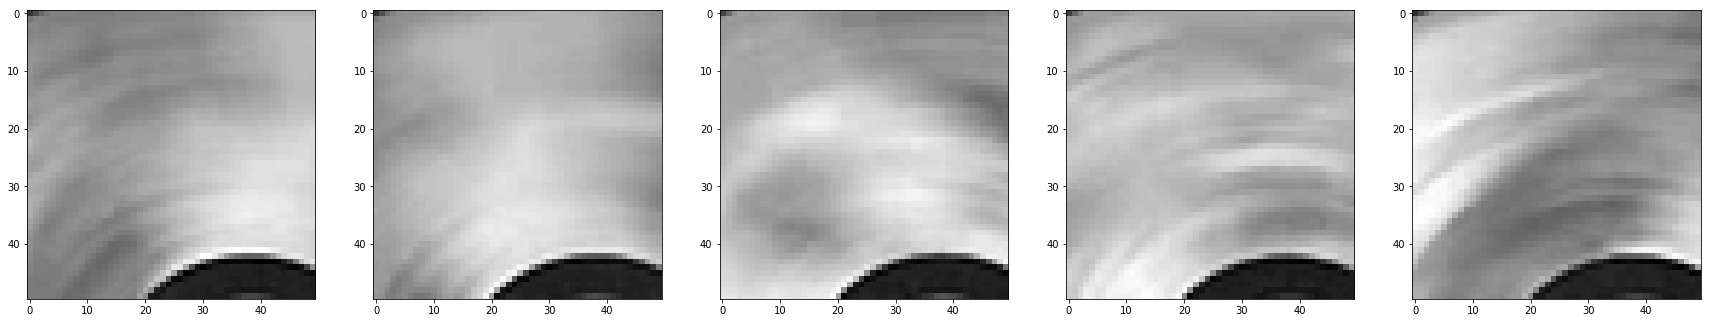

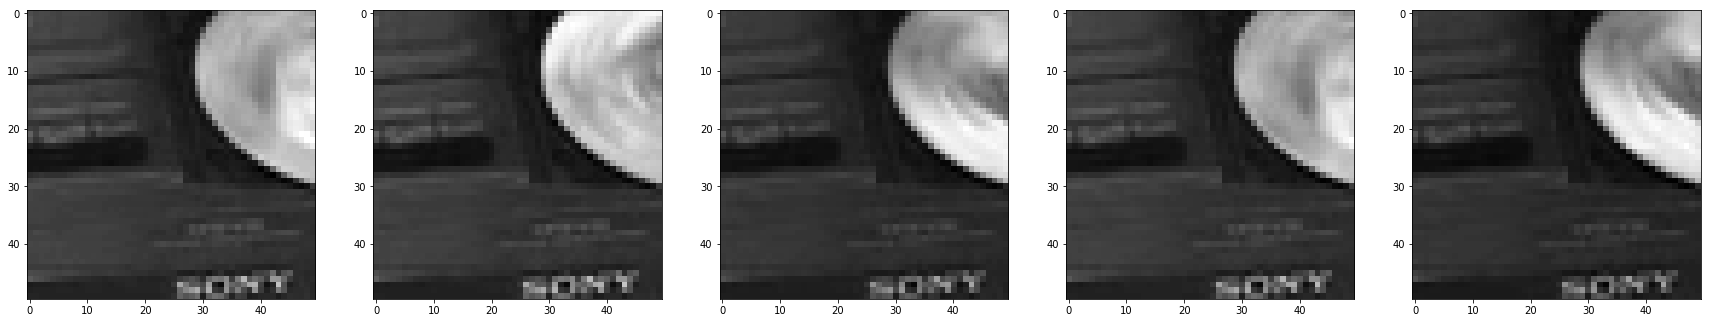

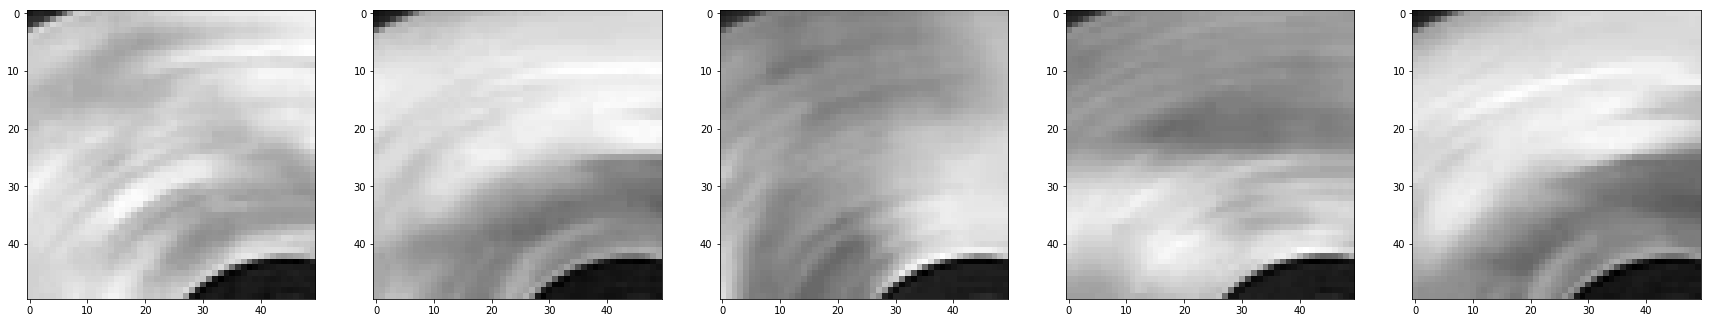

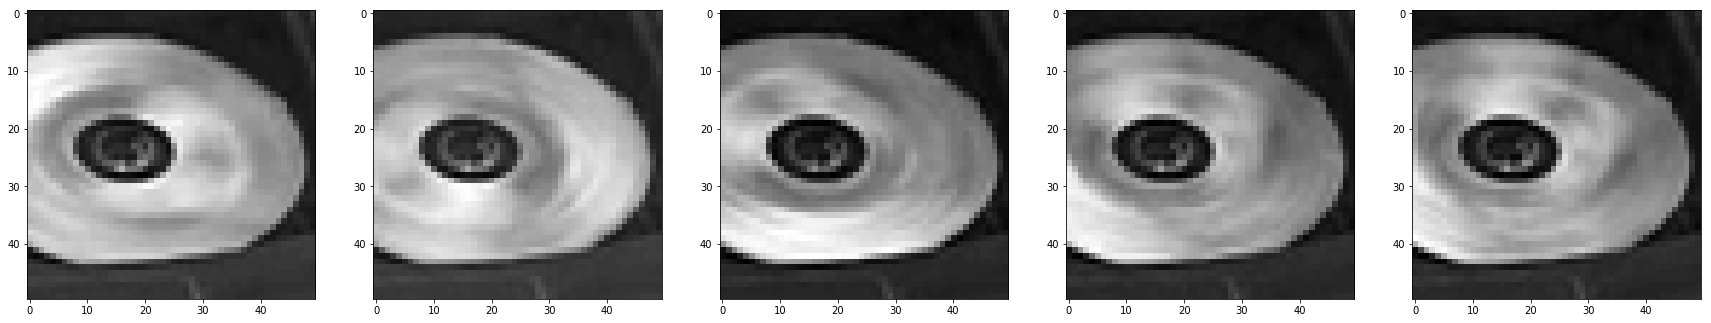

class_id=wash cycle (different zooming levels)


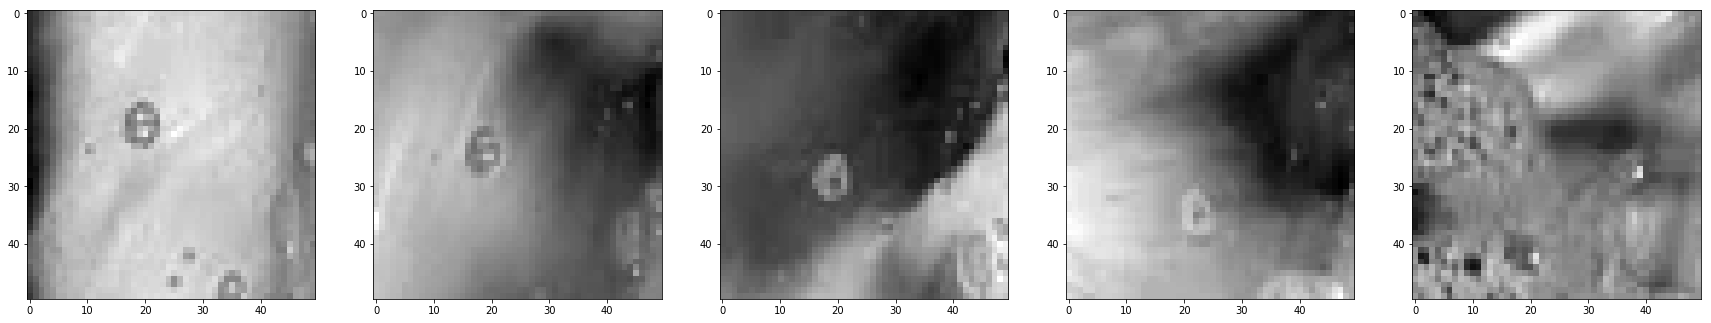

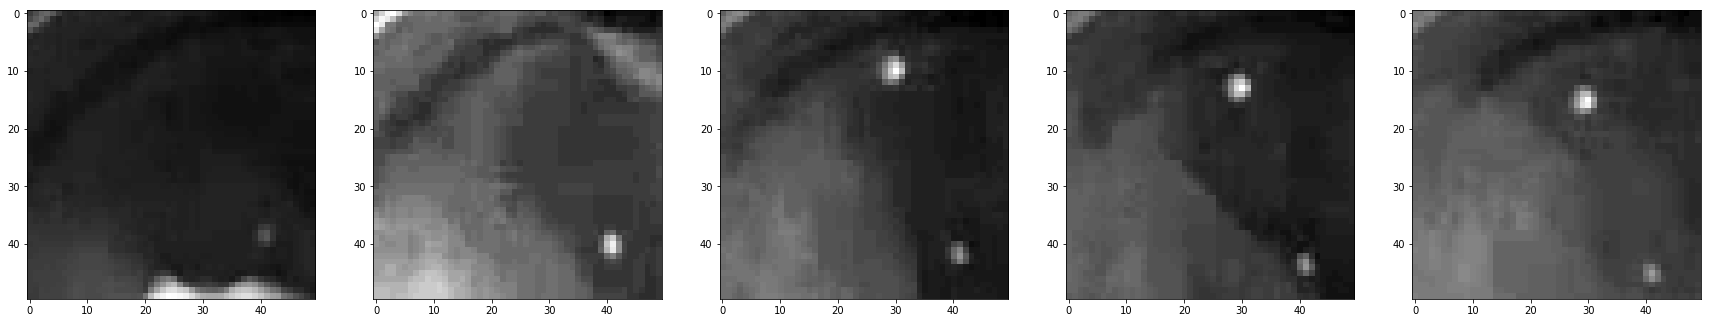

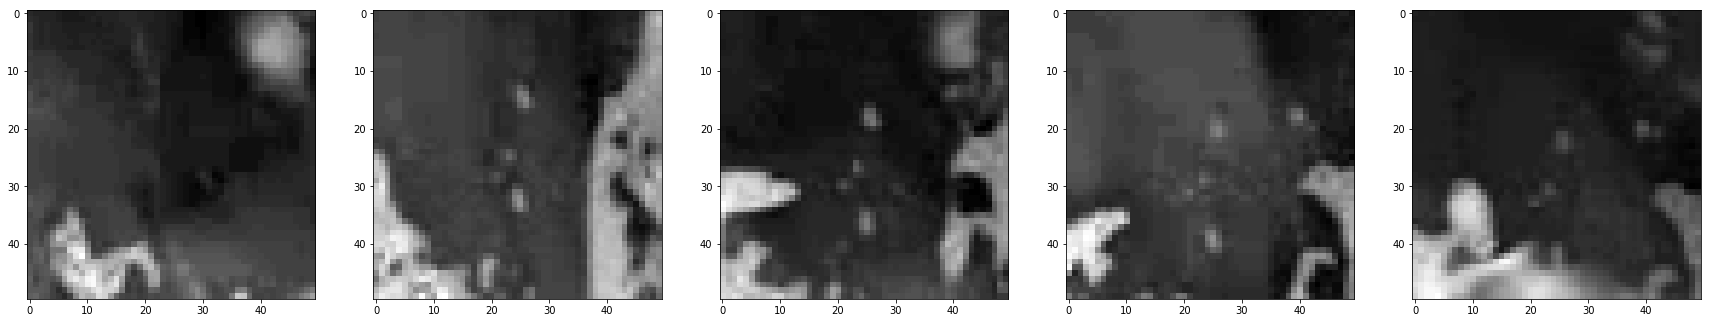

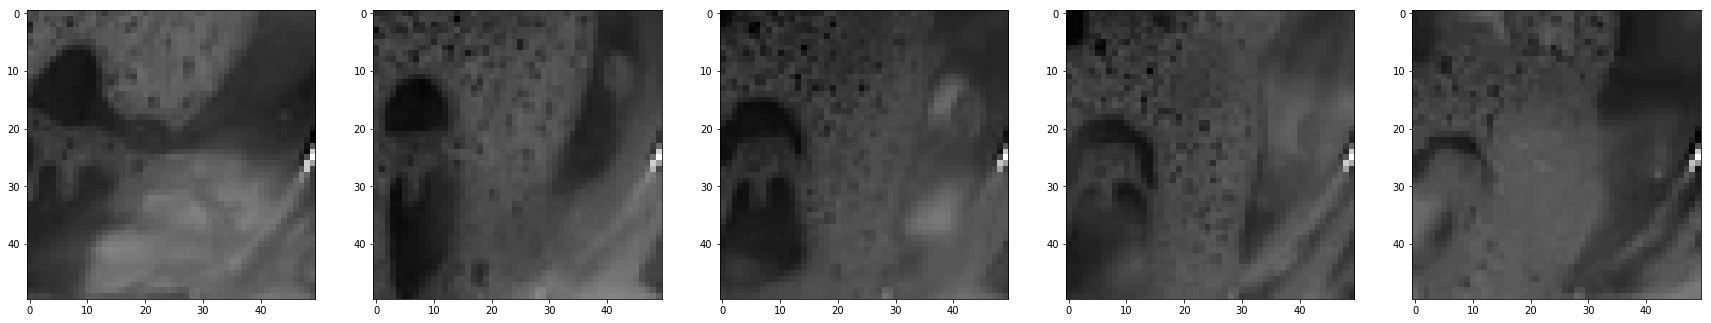

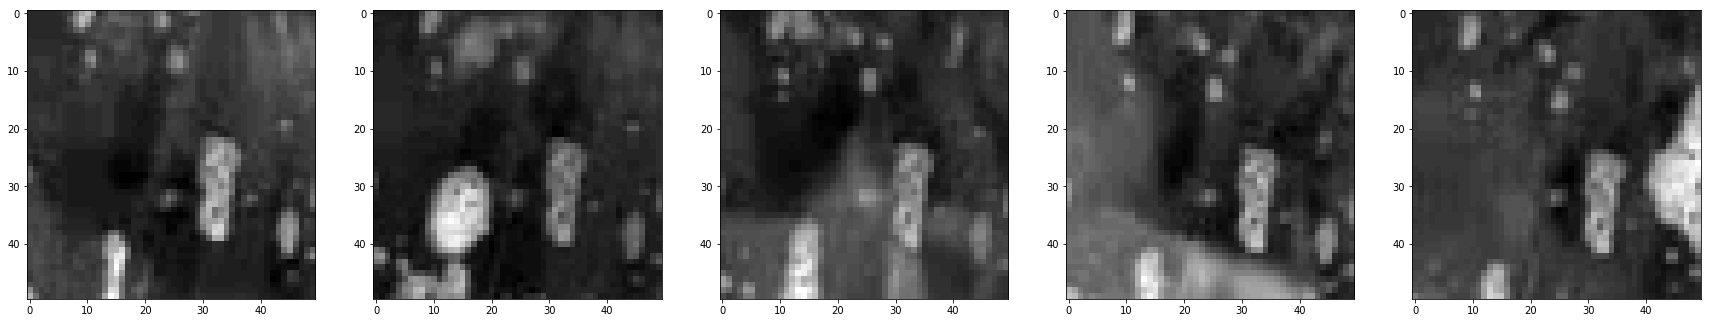

class_id=water pouring into sink


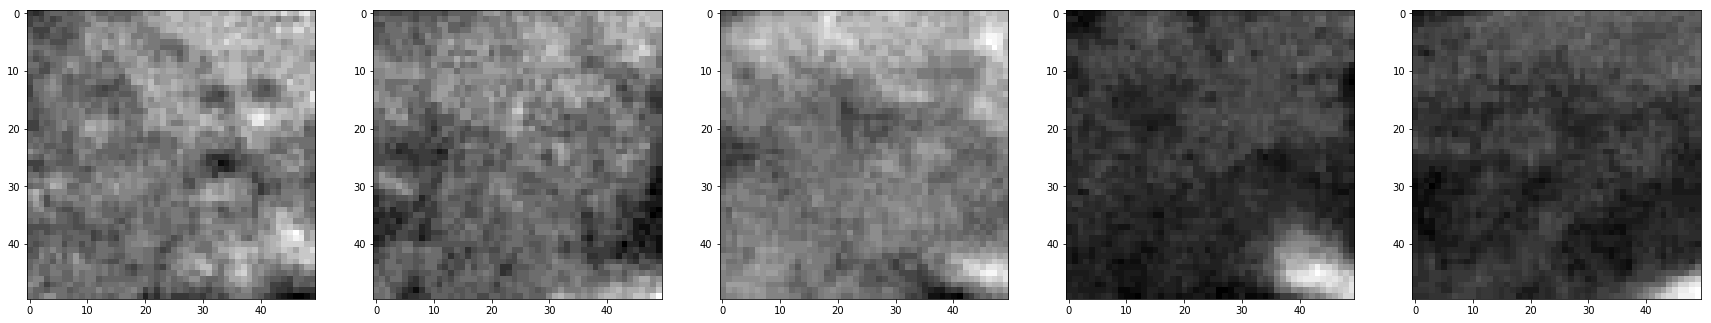

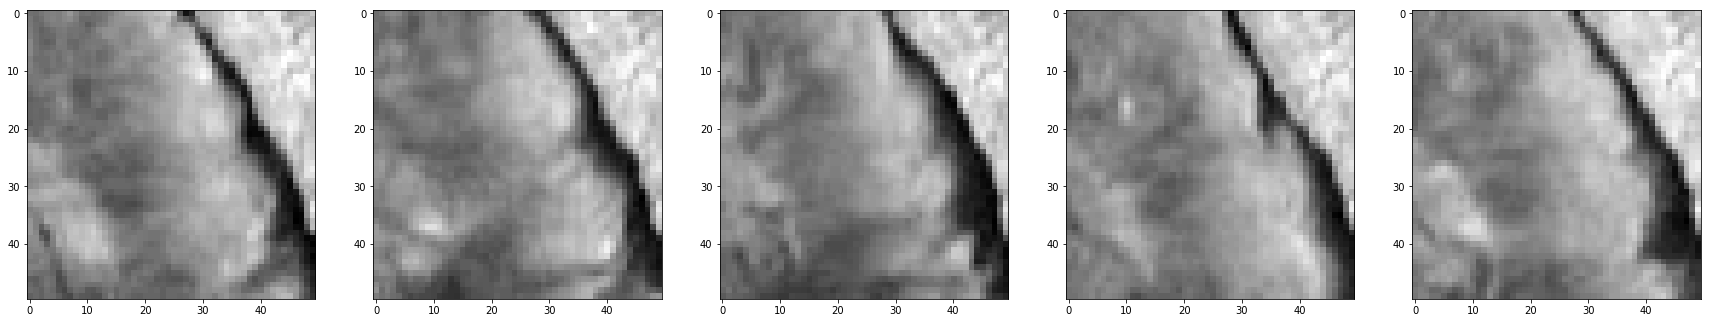

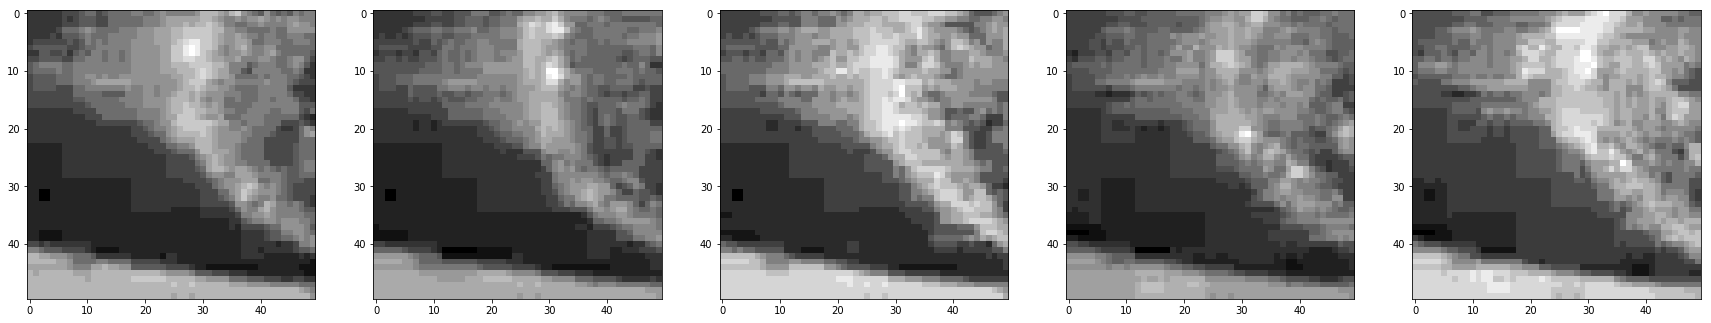

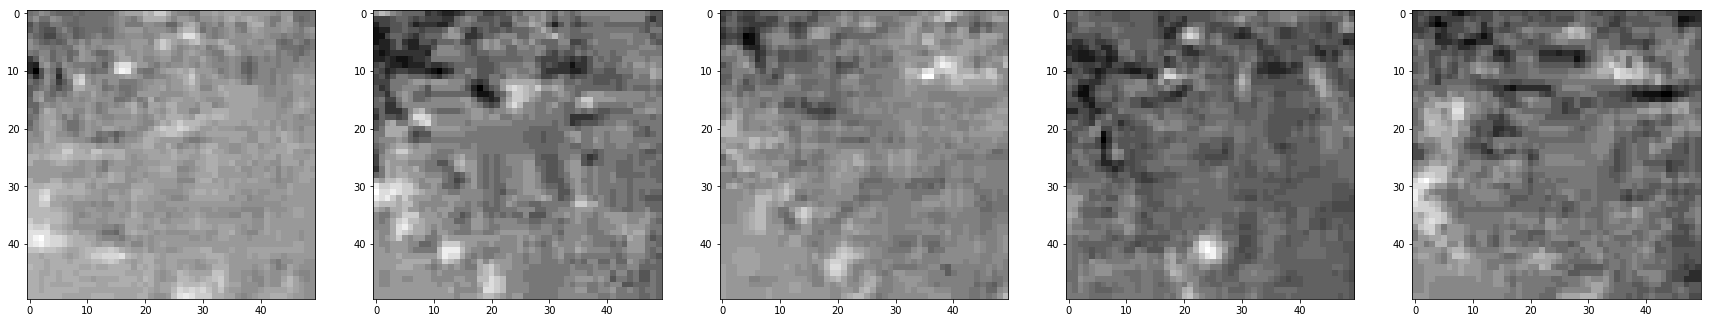

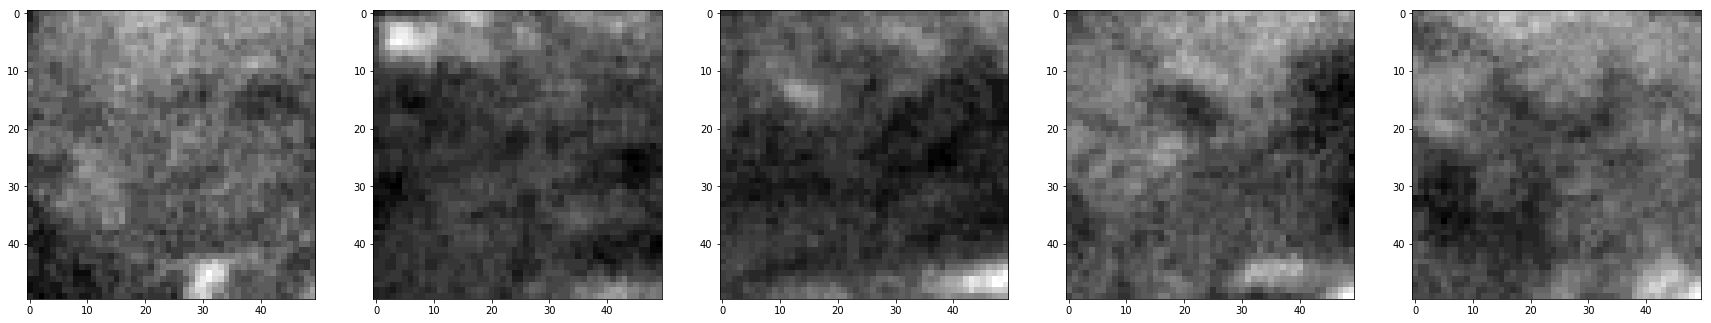

class_id=lamp globes swaying


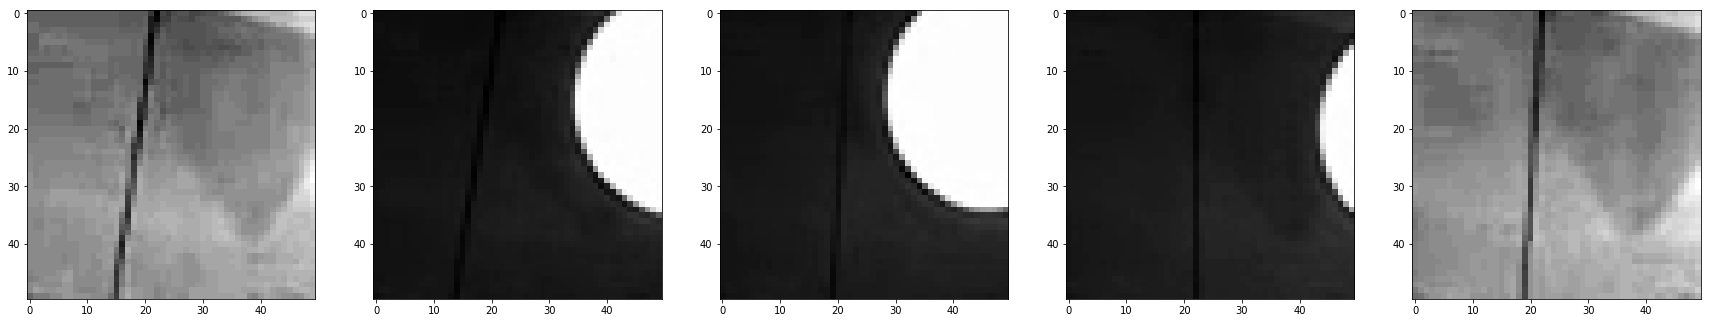

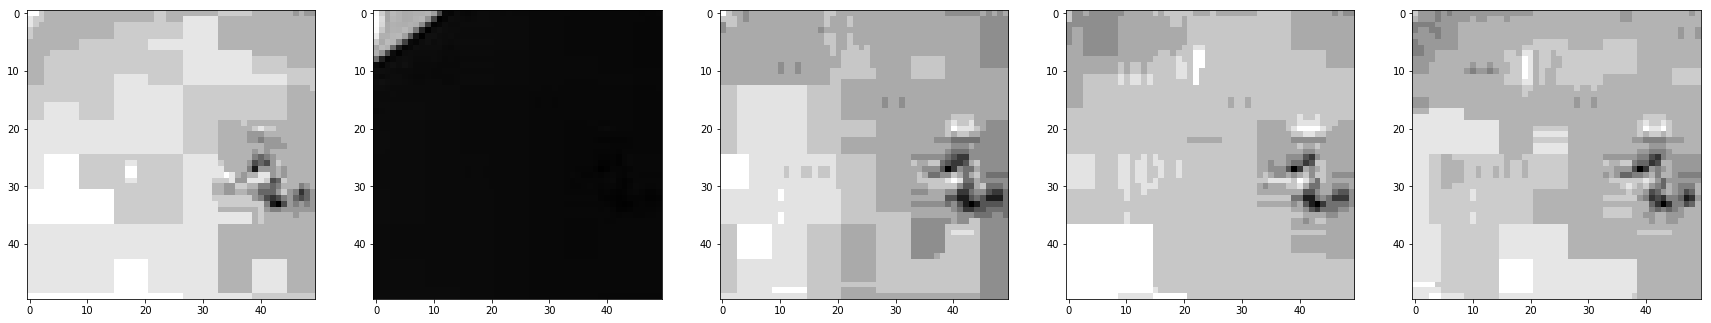

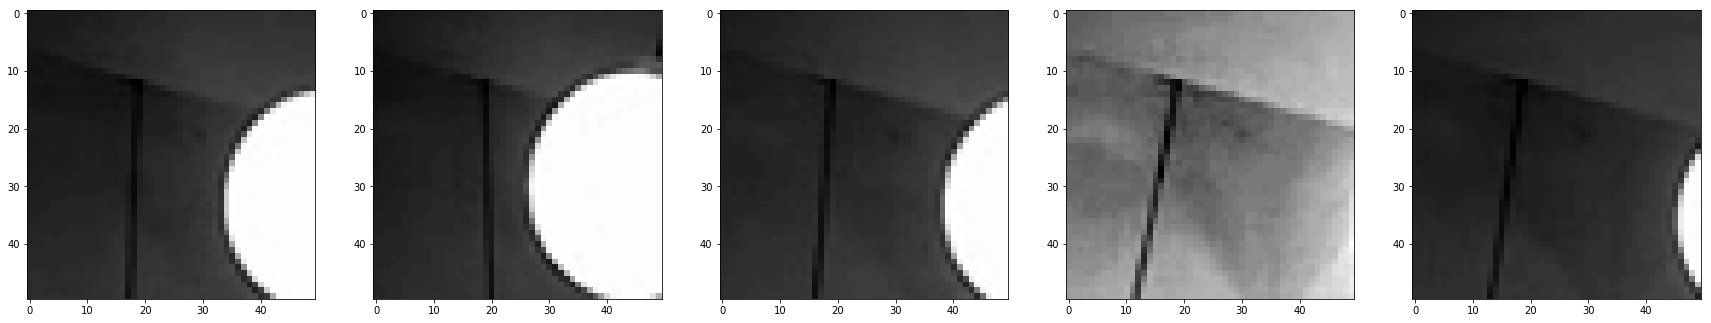

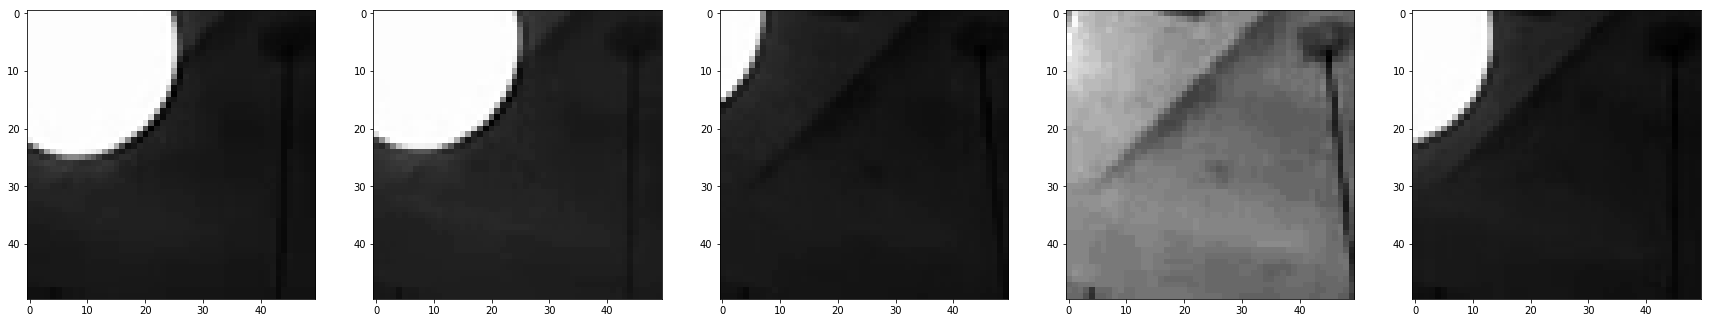

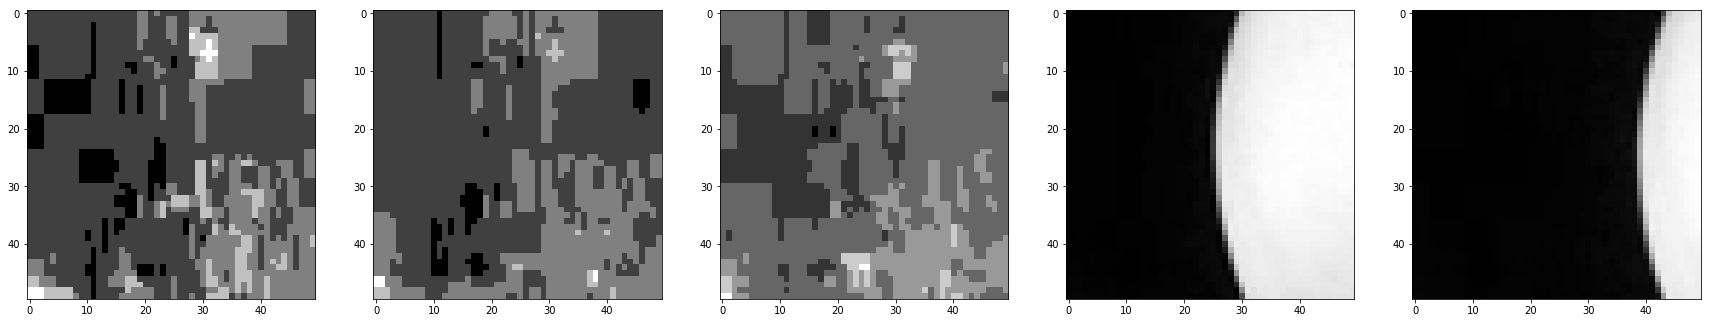

class_id=lights blinking


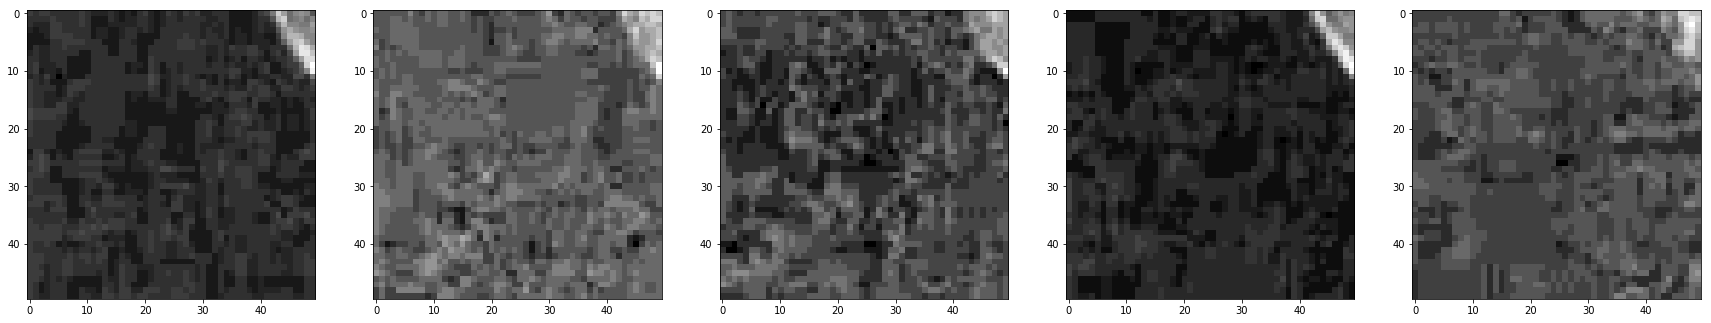

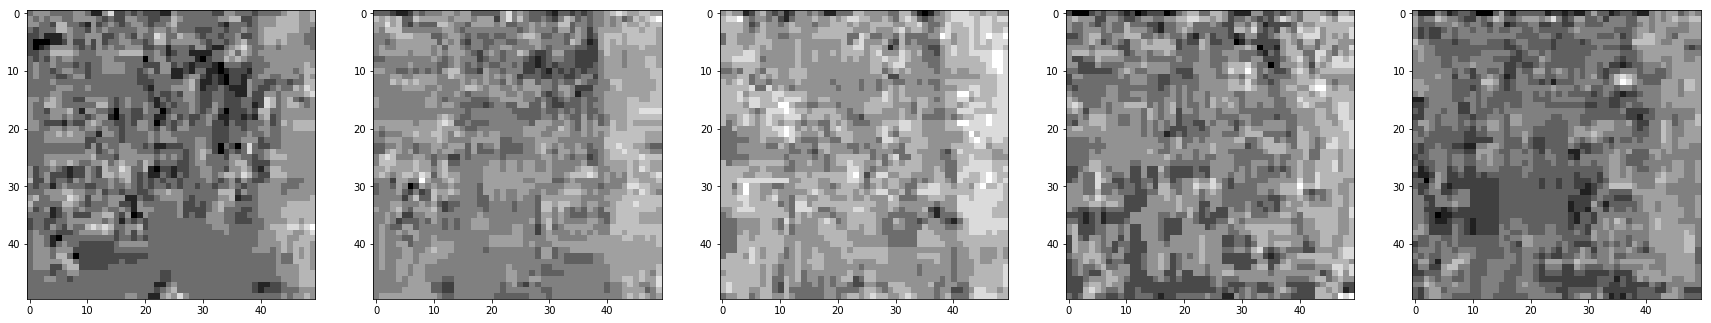

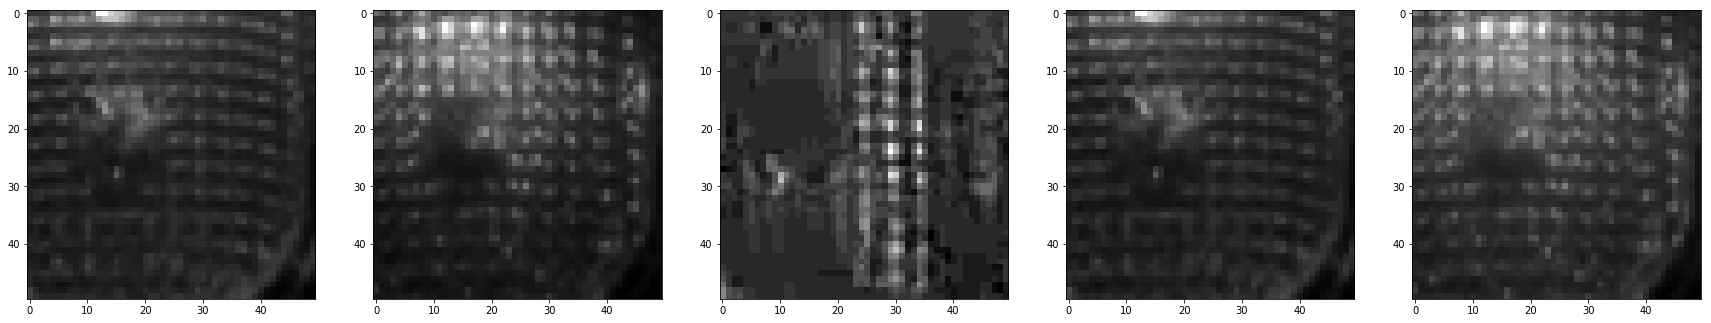

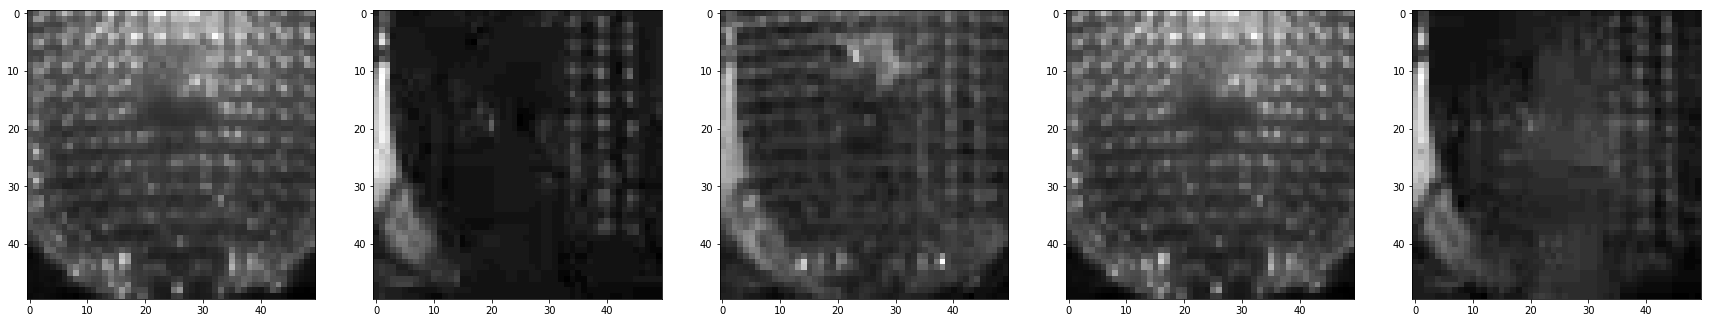

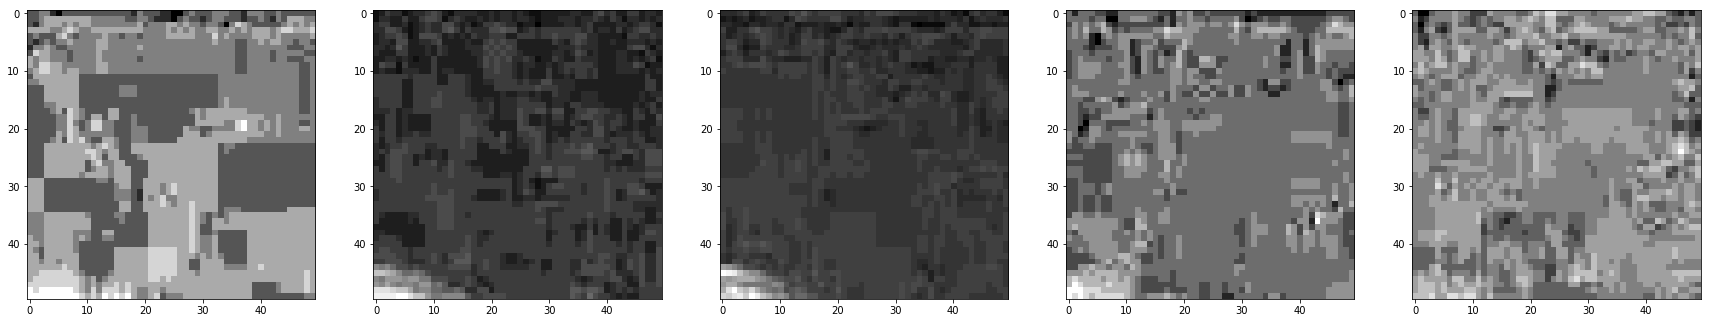

class_id=leaves on branches swaying with wind


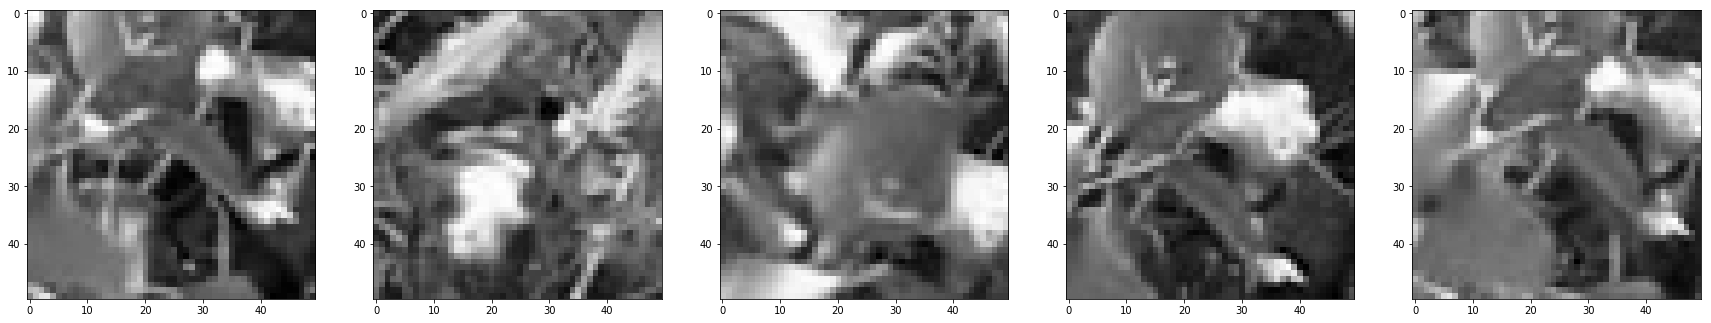

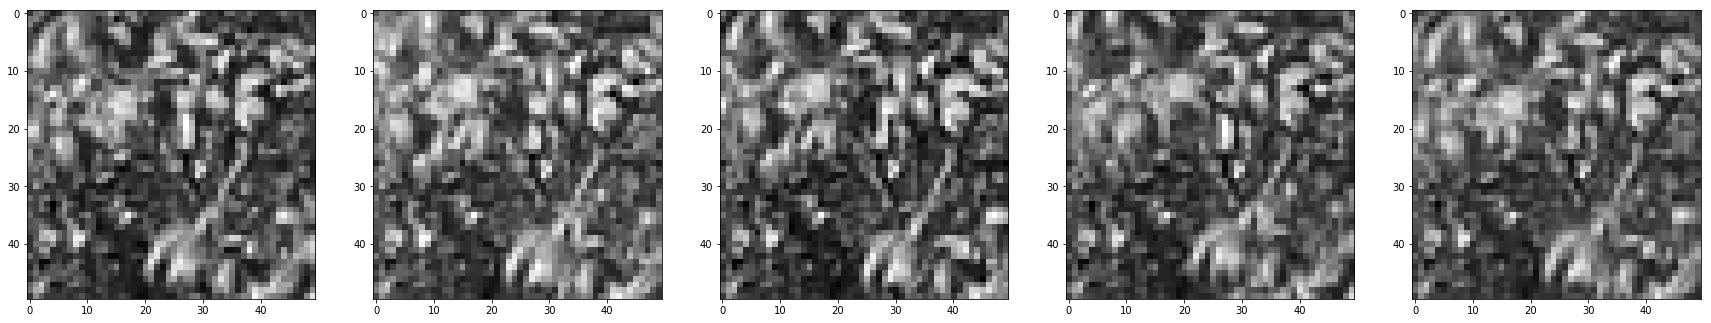

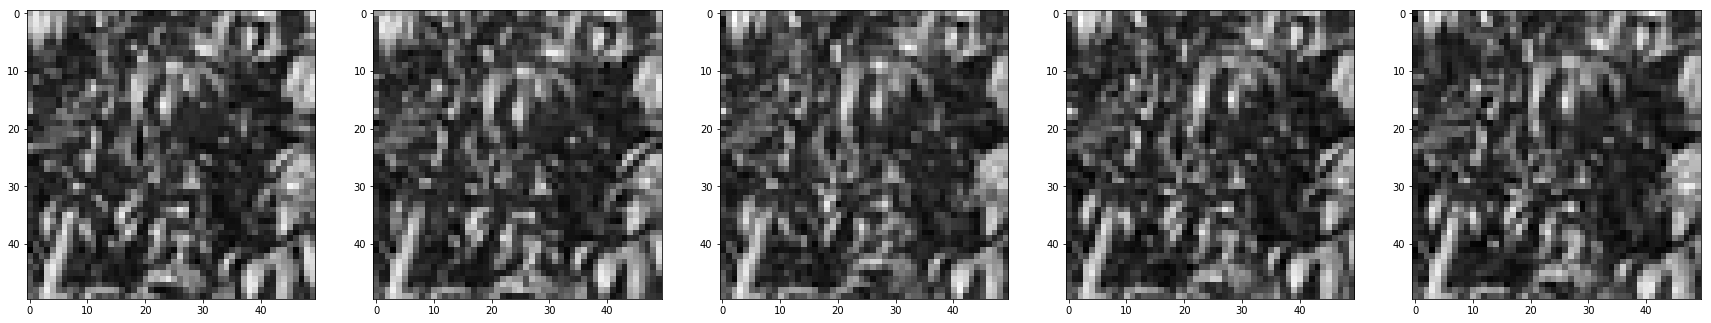

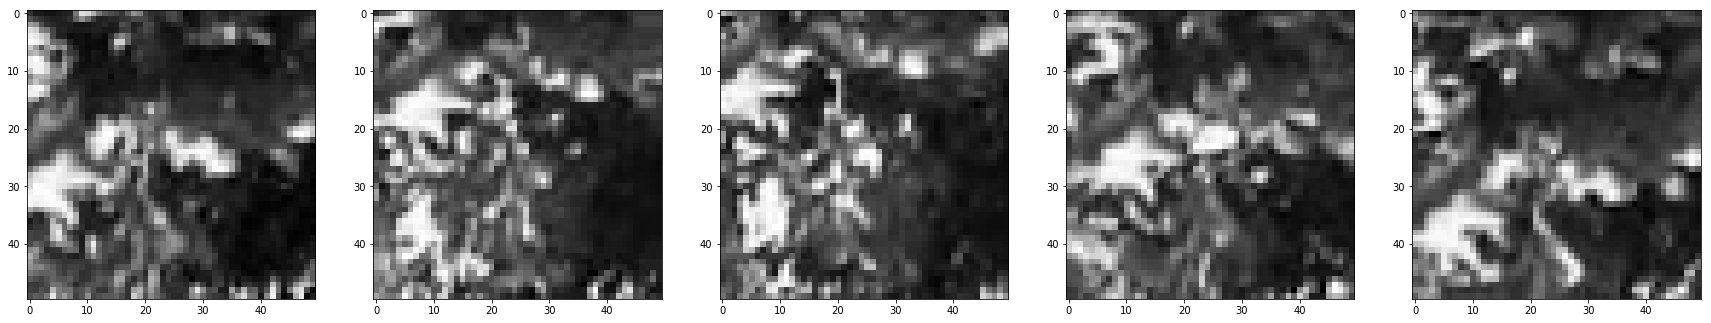

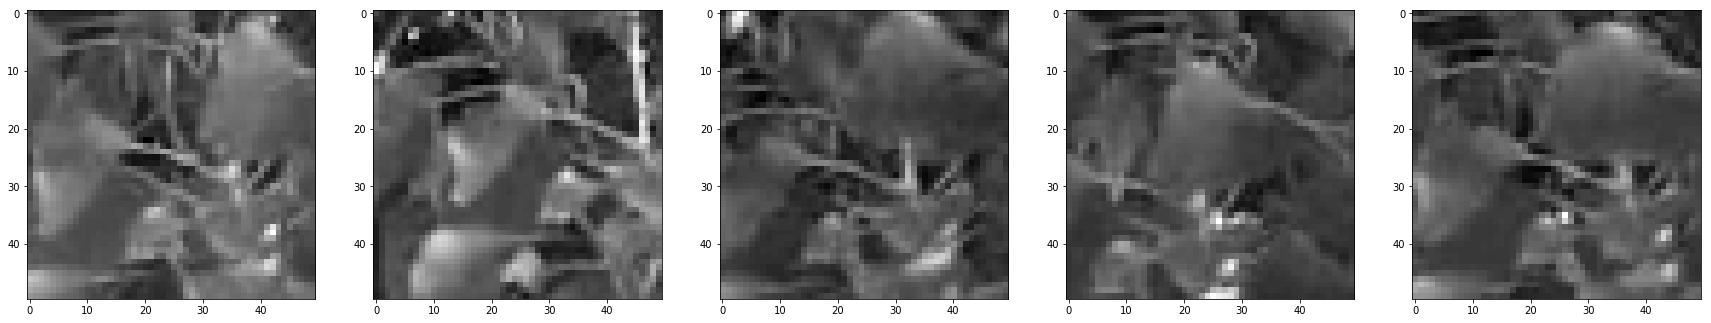

class_id=birds flying in sky


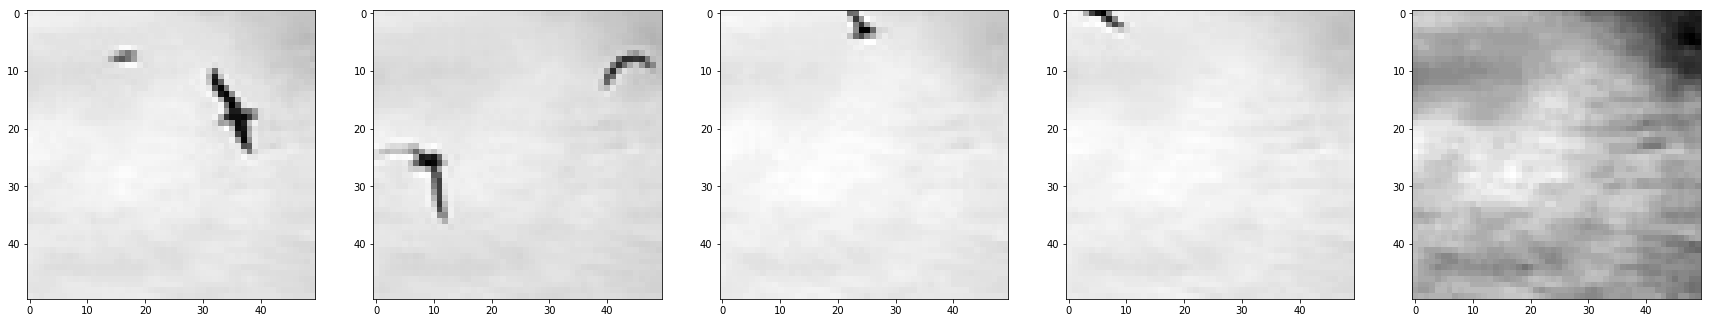

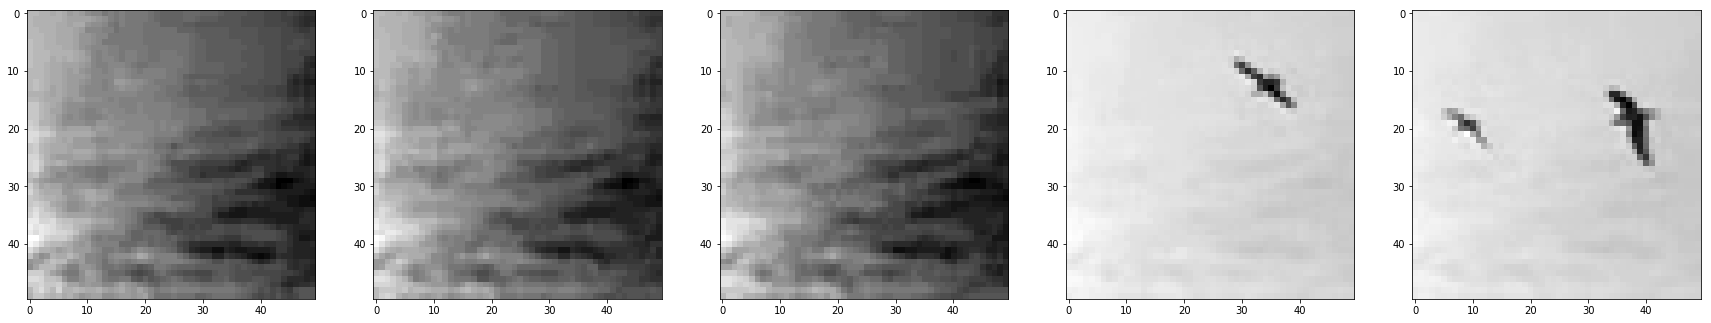

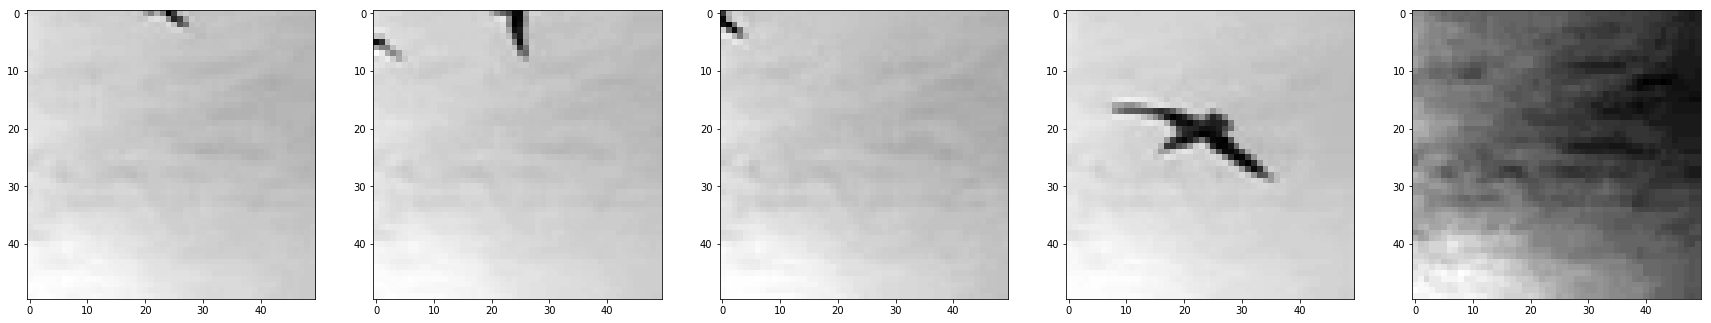

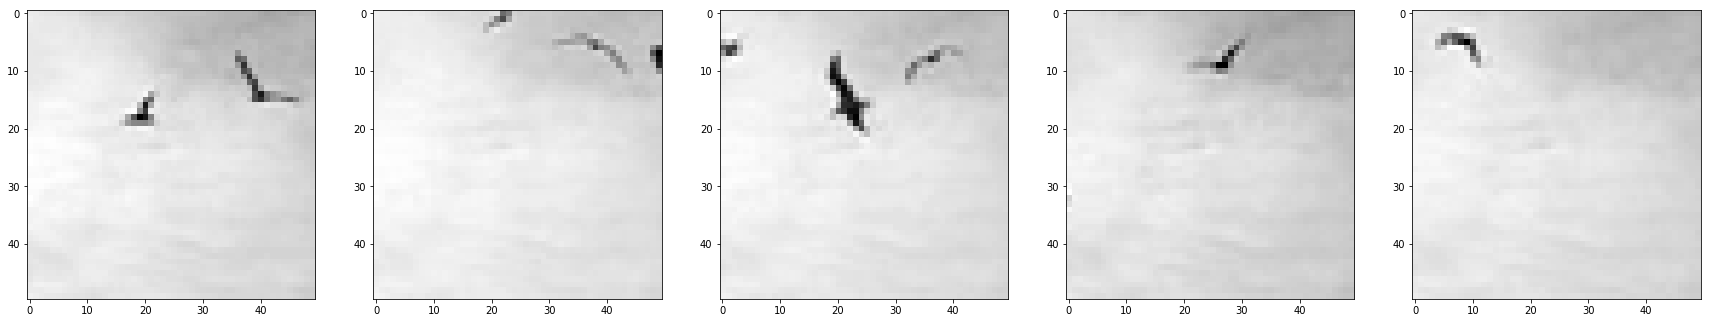

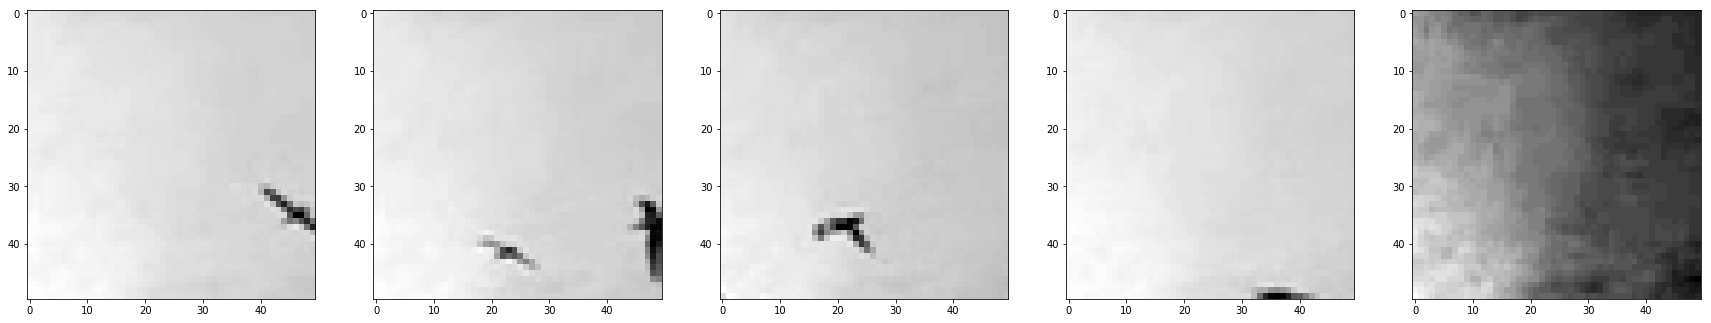

class_id=pond water


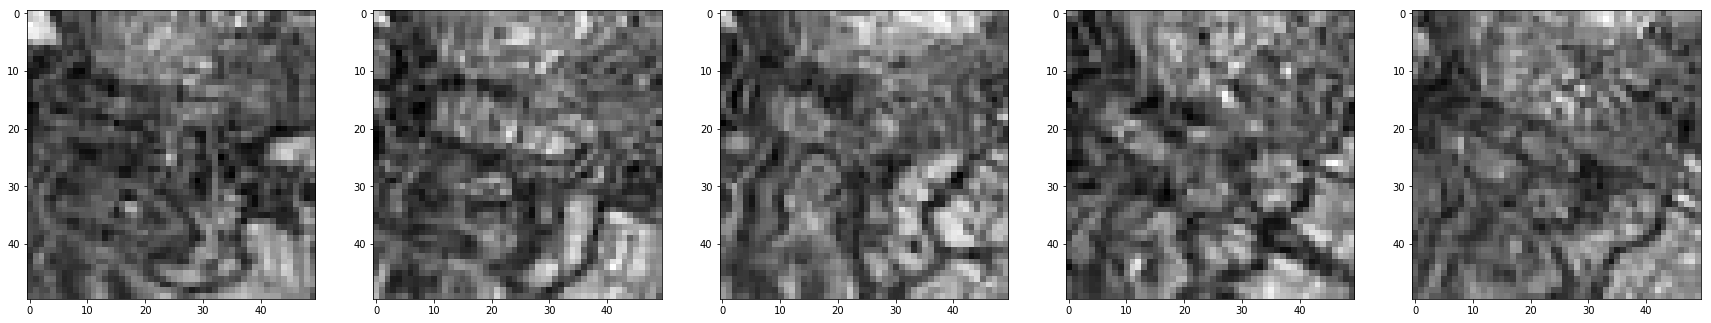

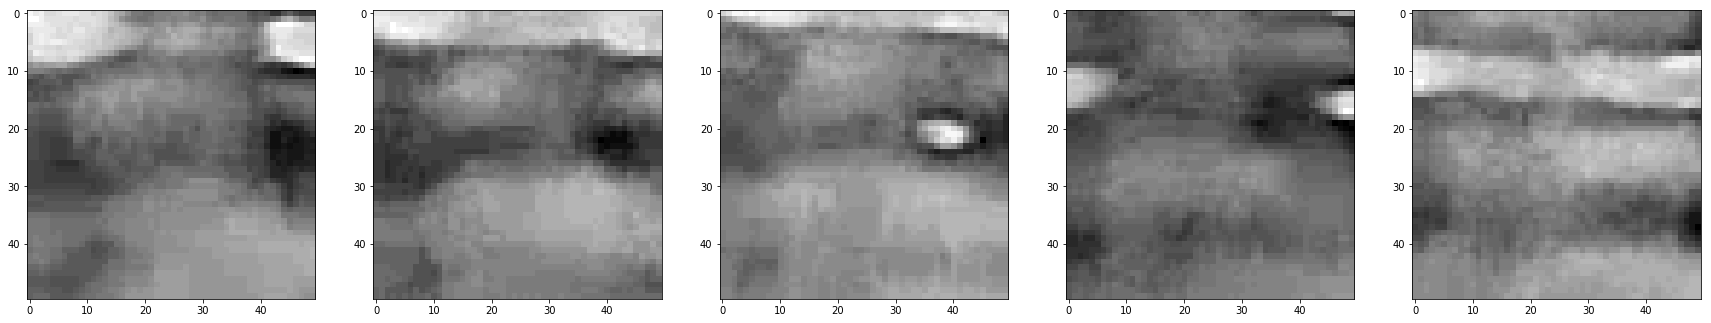

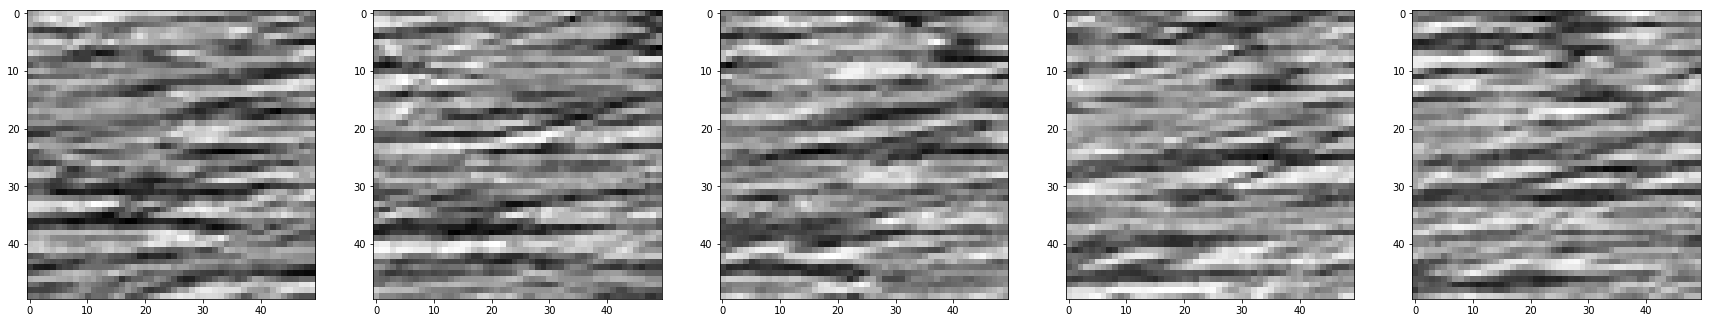

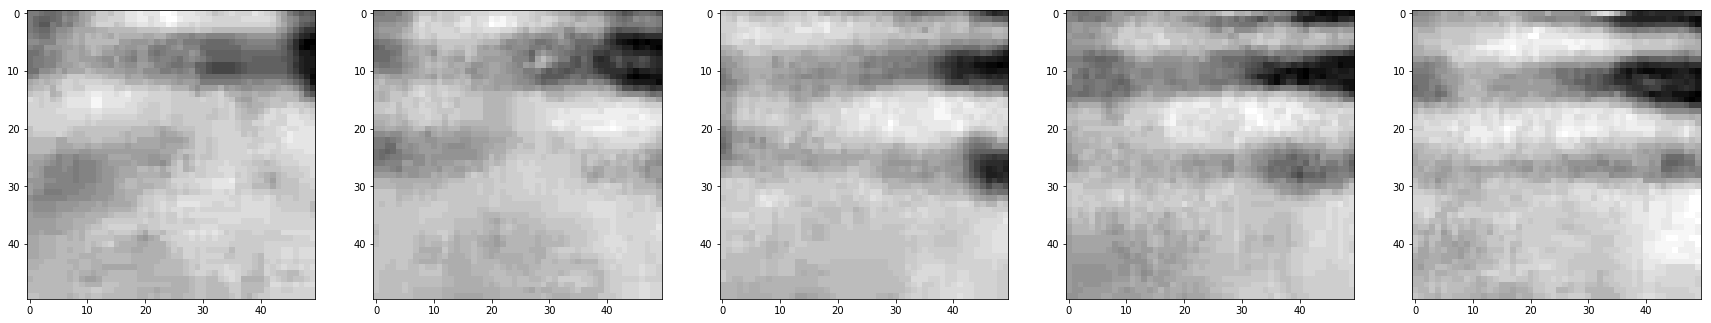

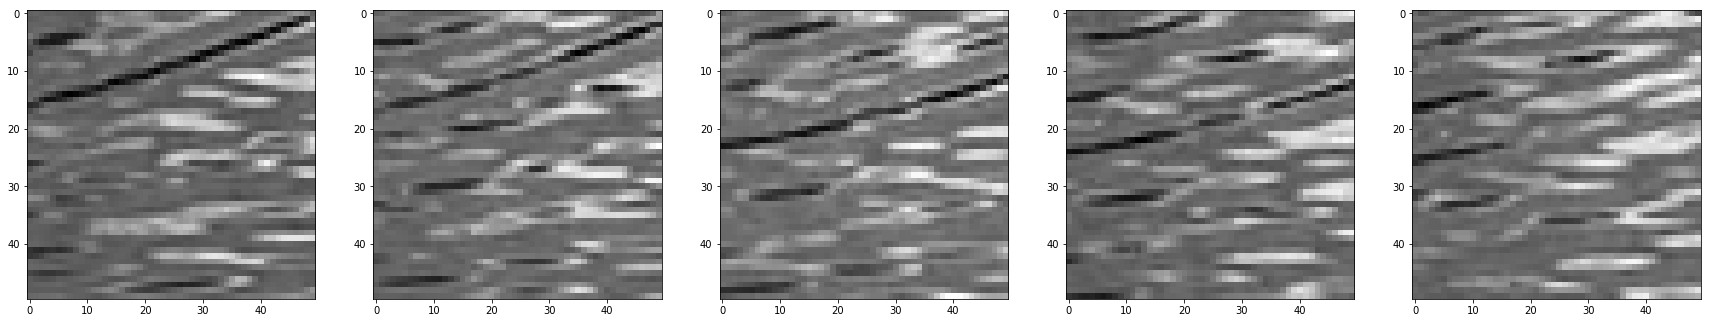

class_id=rotating wind ornament


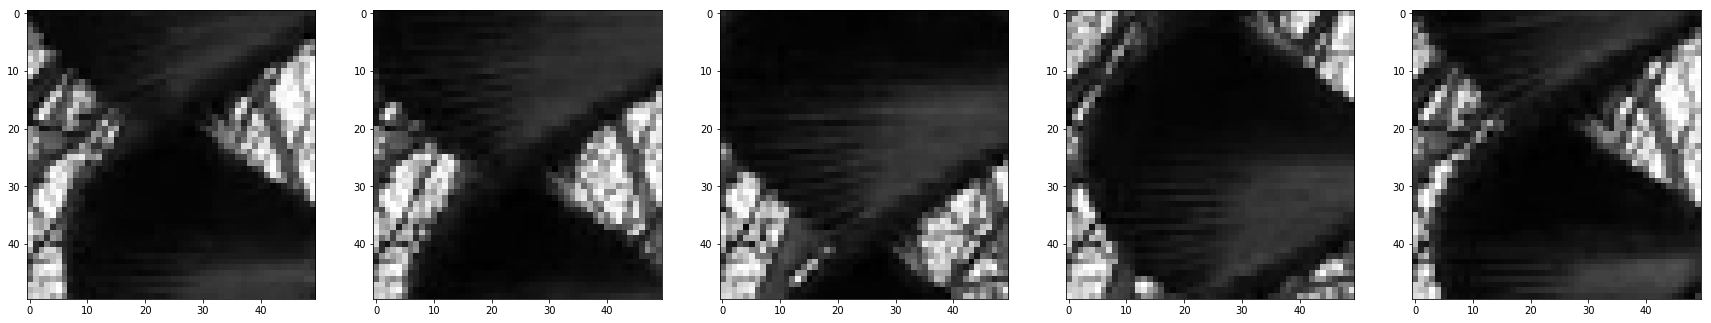

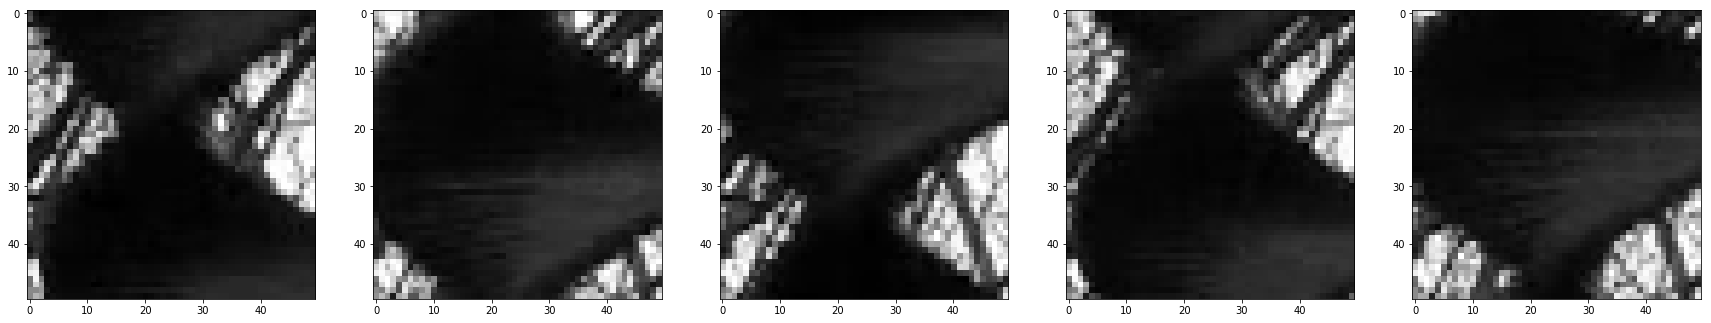

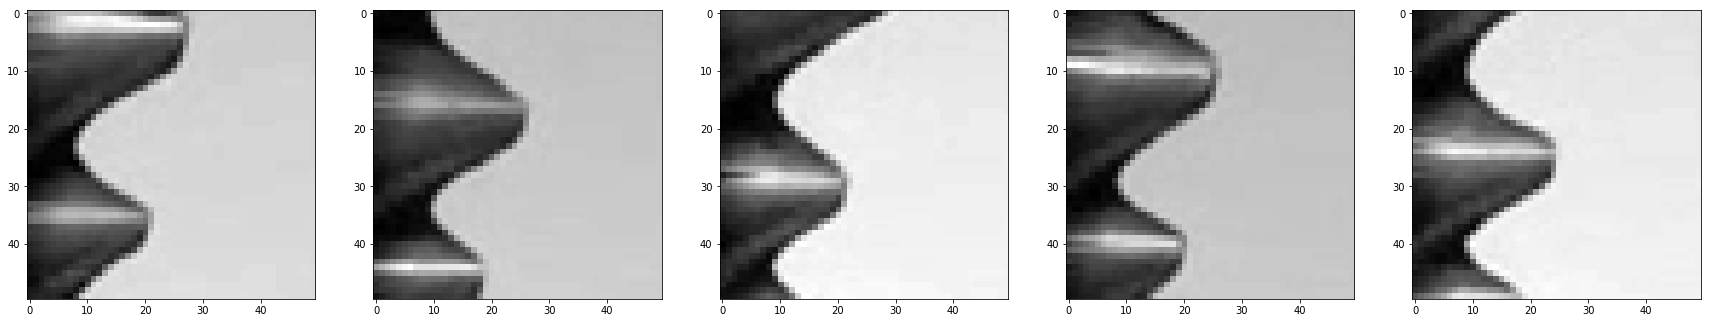

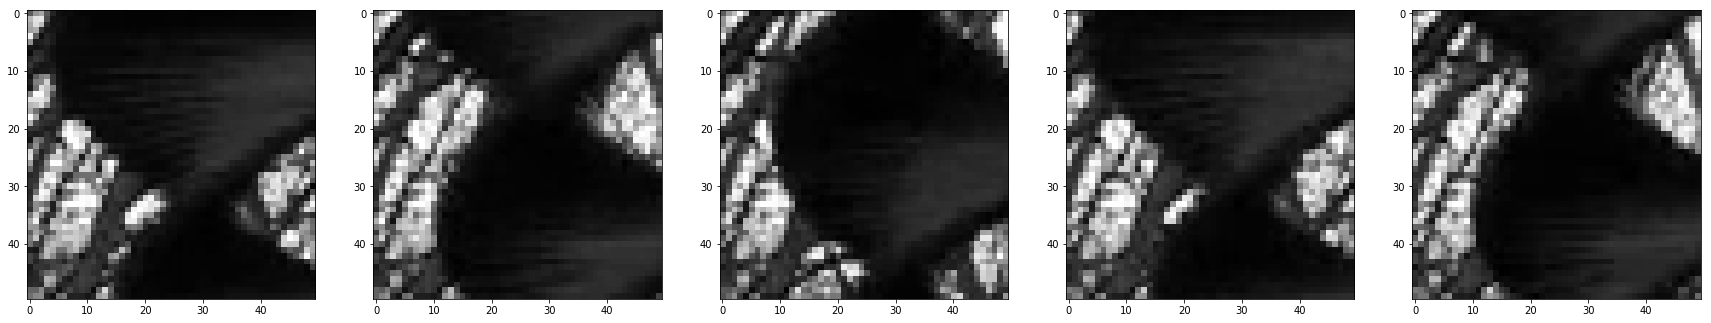

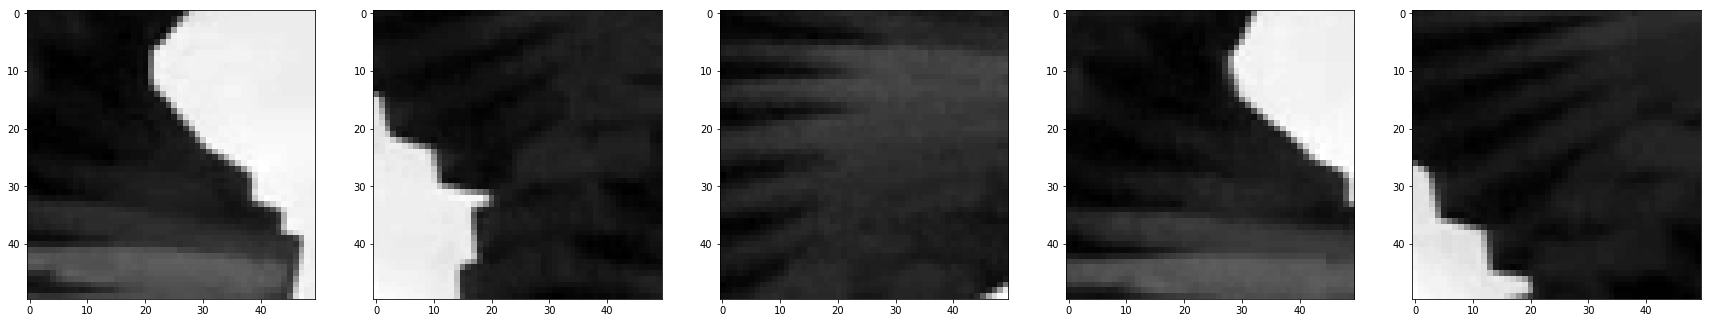

class_id=vehicle traffic on road


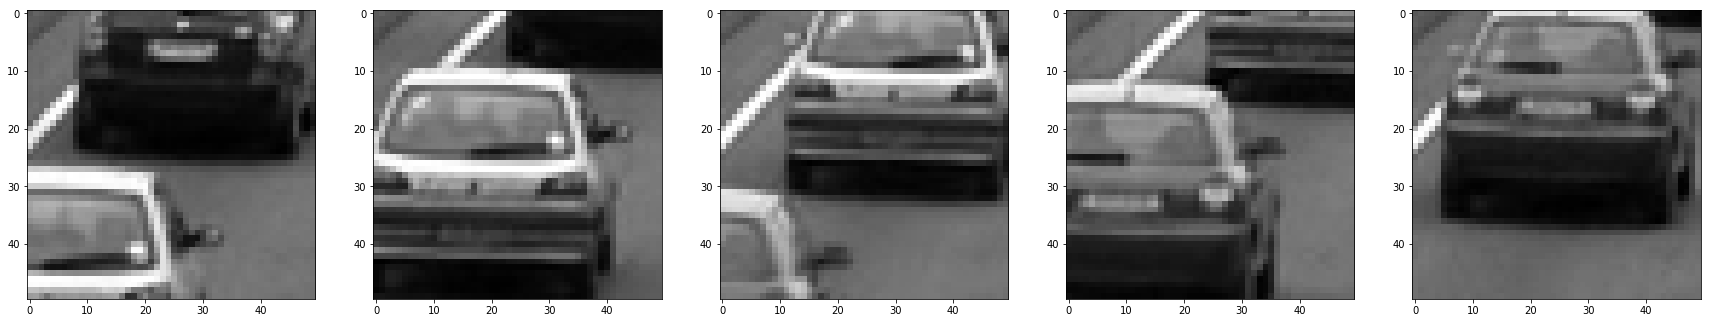

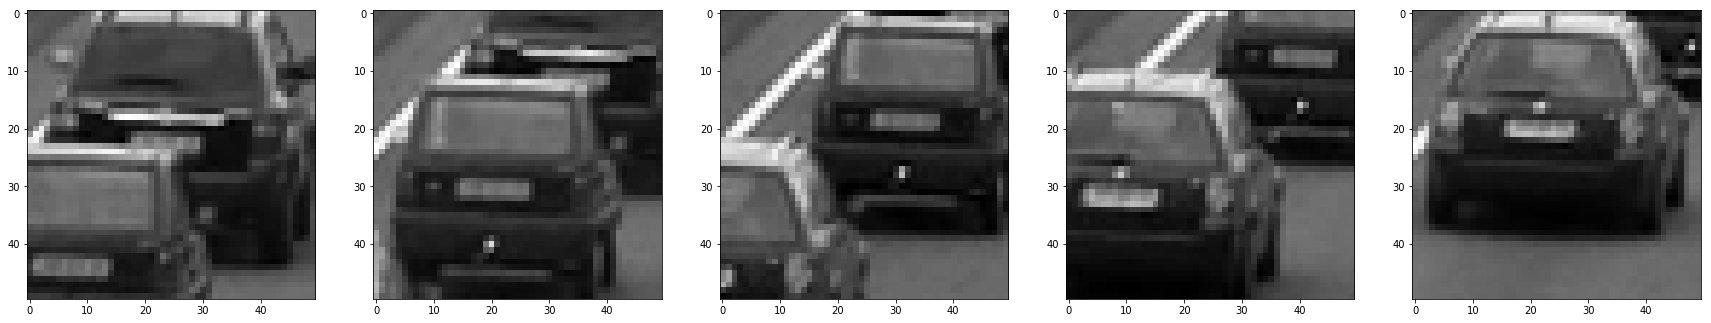

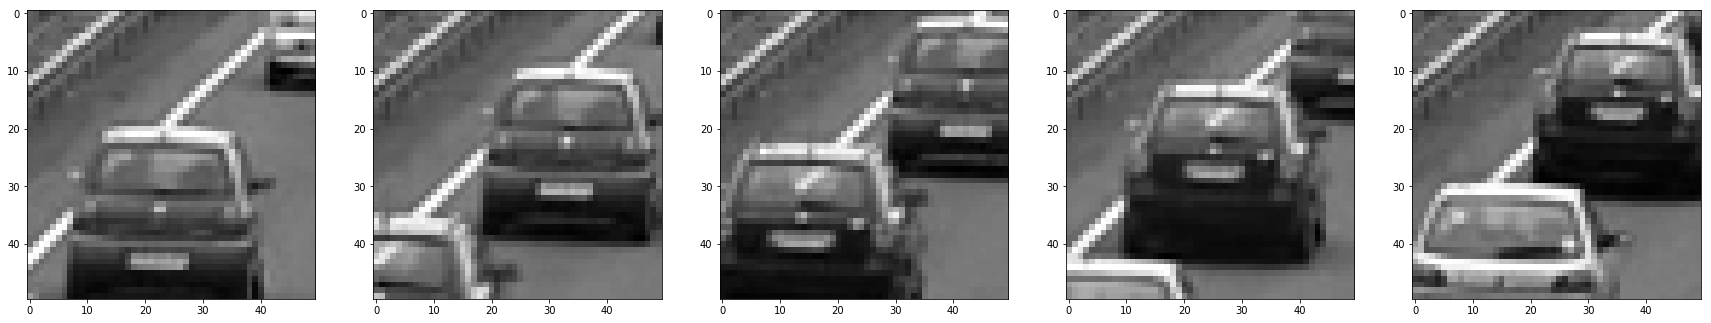

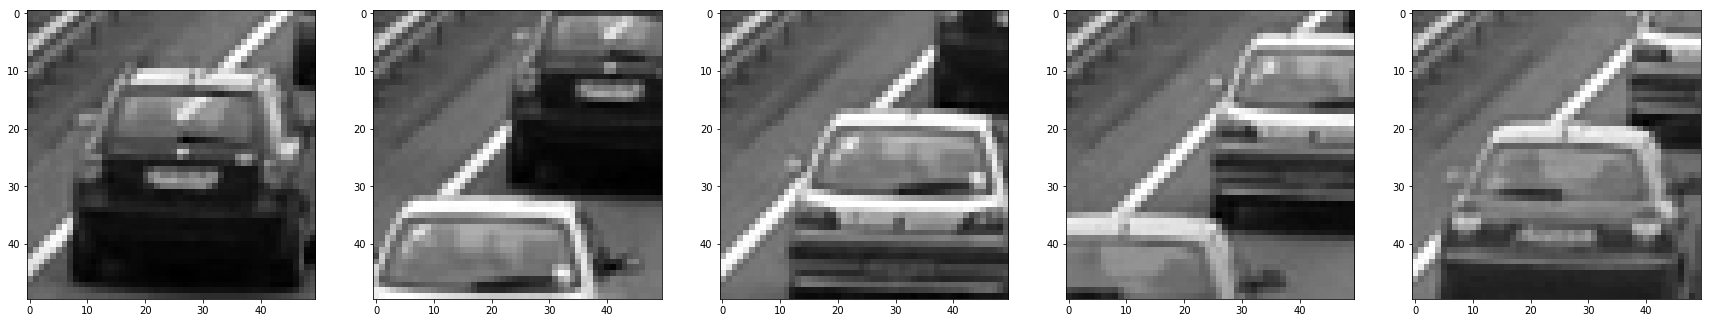

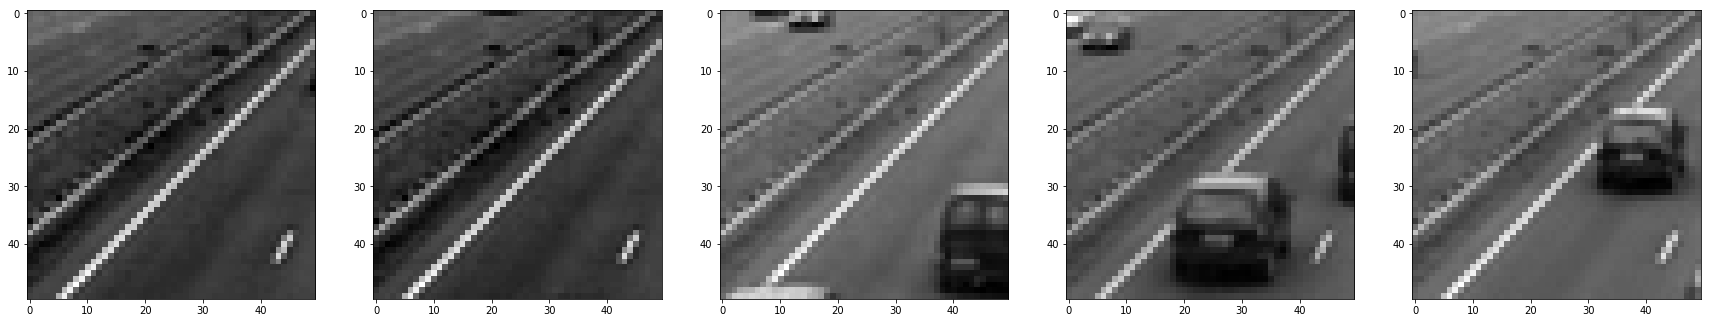

class_id=flag (with occlusion + zoom levels)


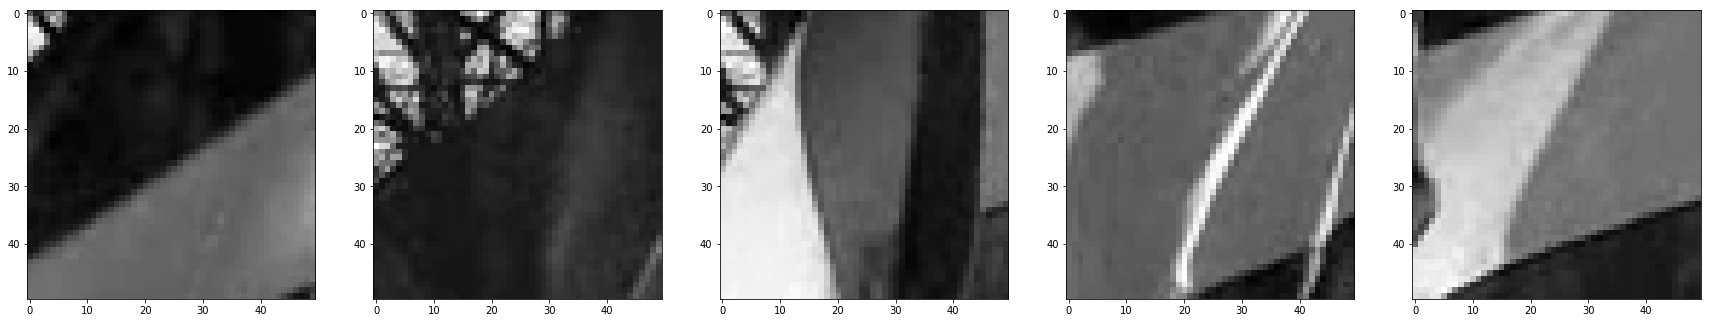

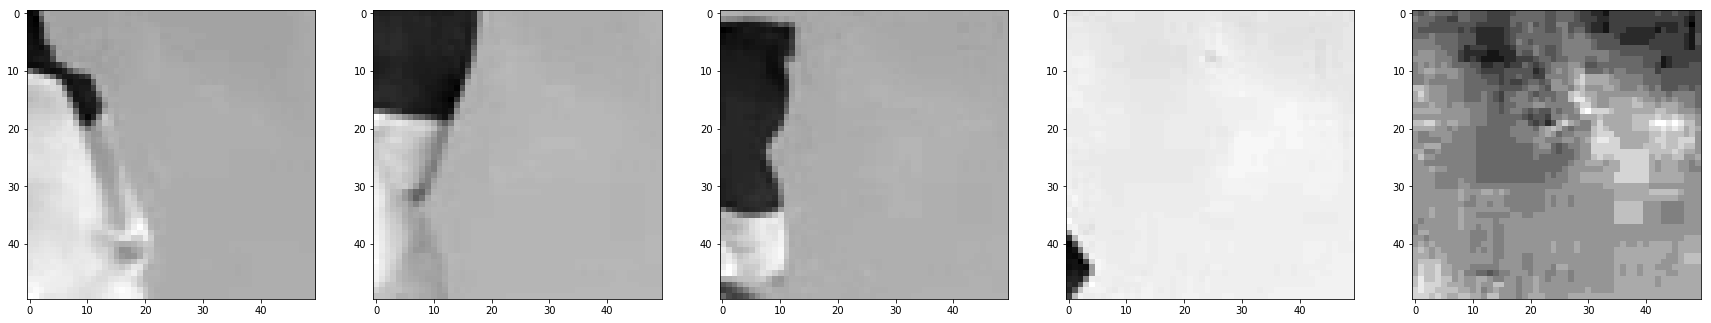

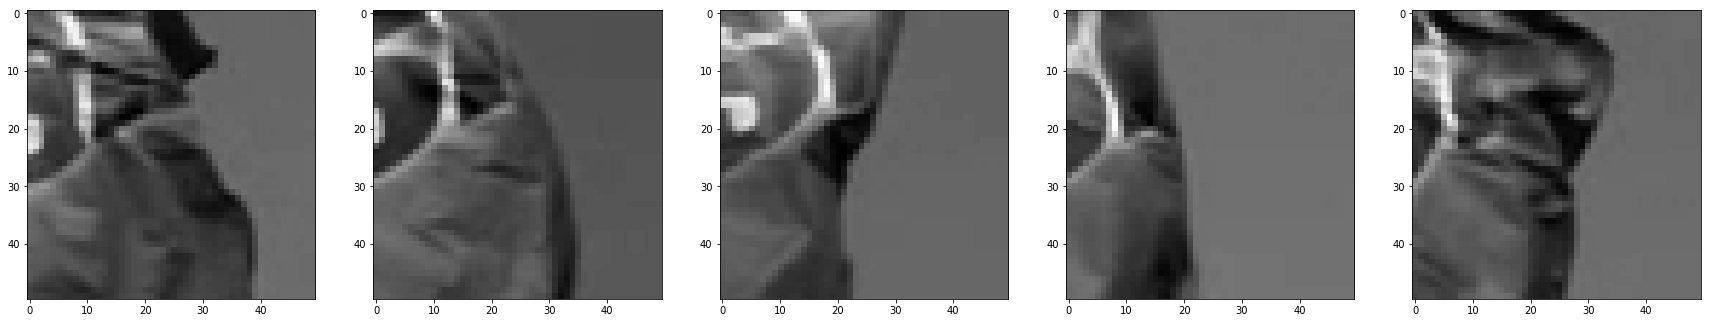

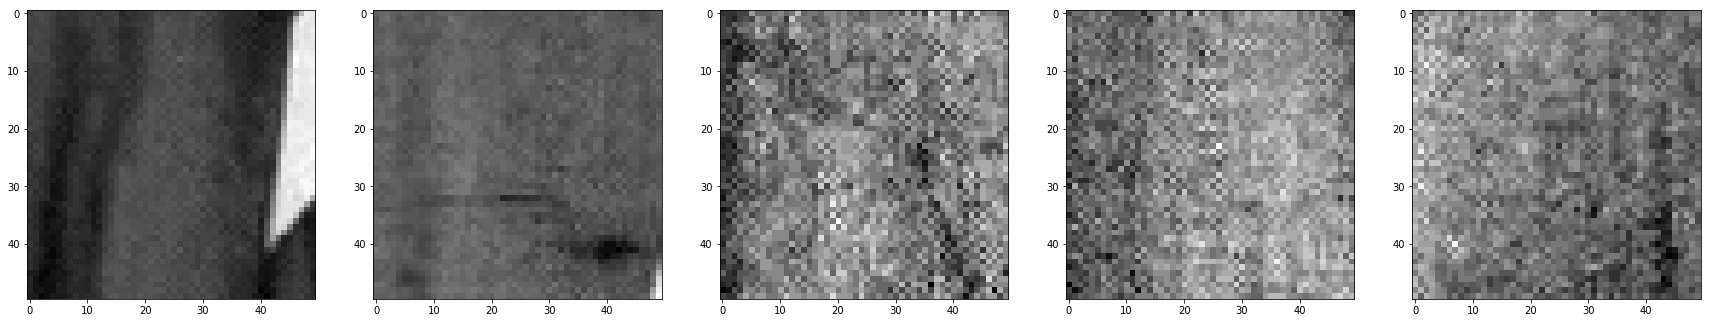

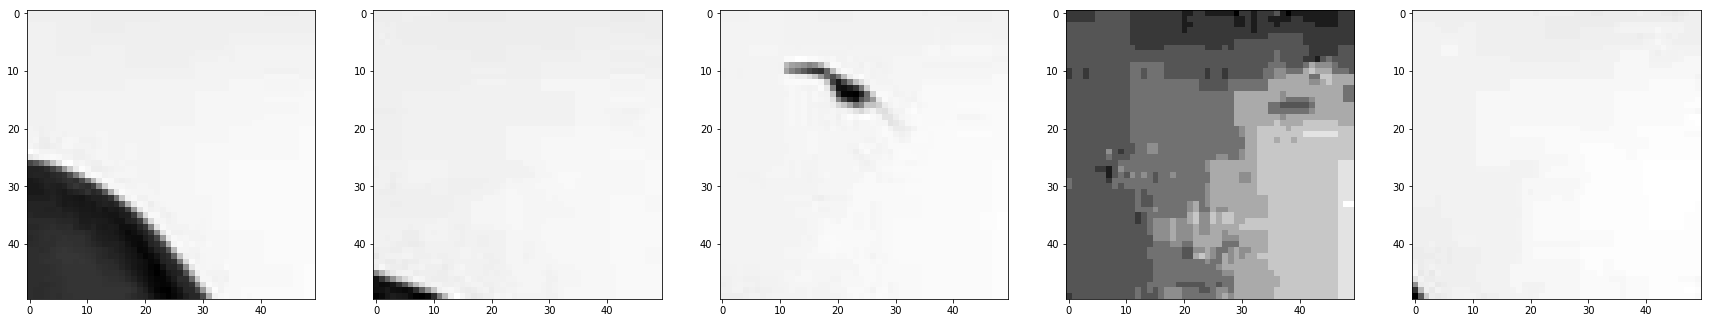

class_id=branches swaying in wind (no leaves)


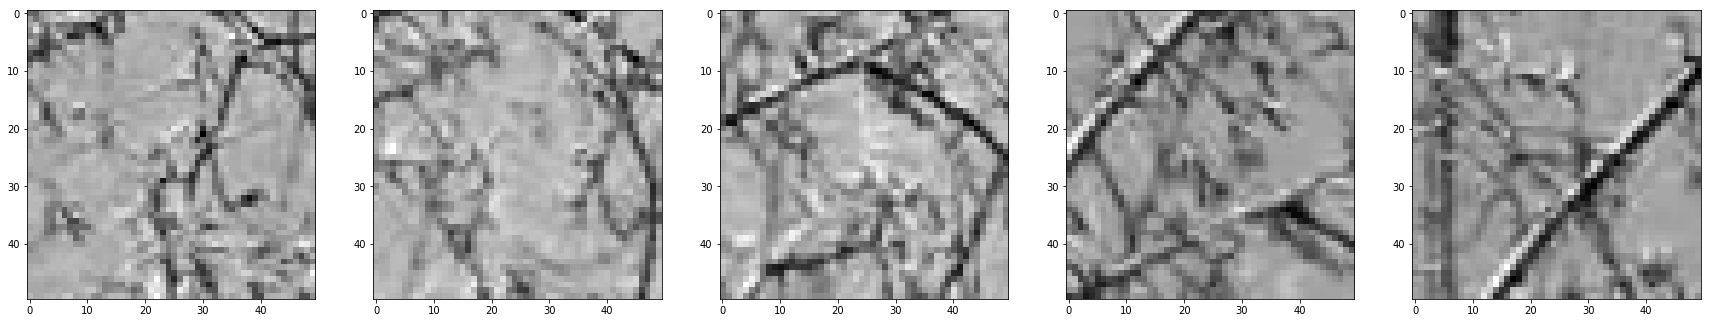

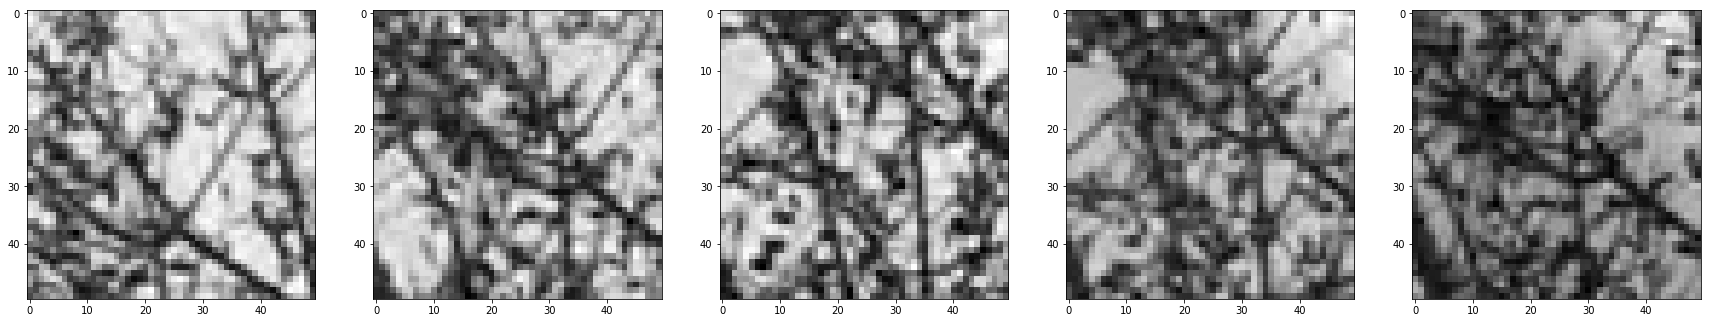

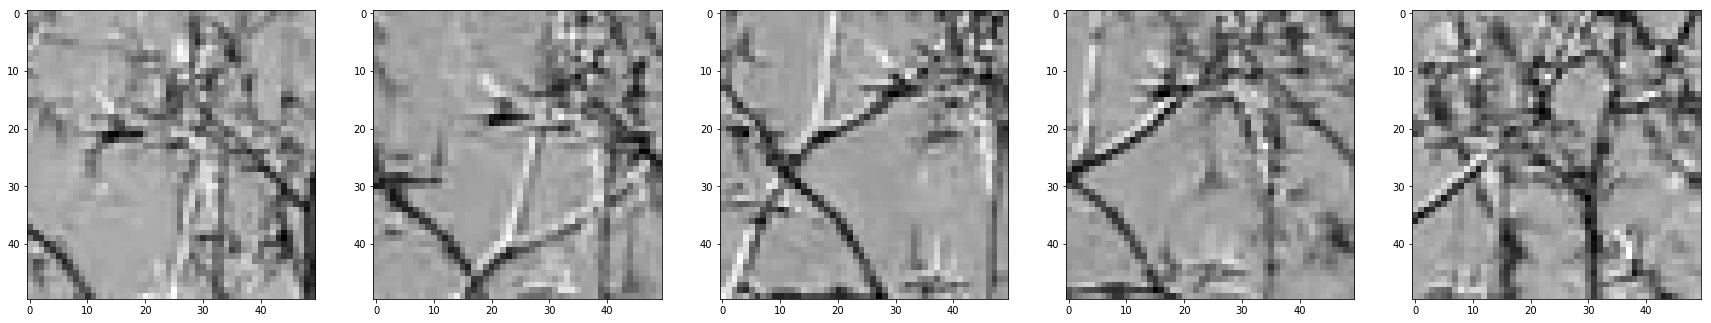

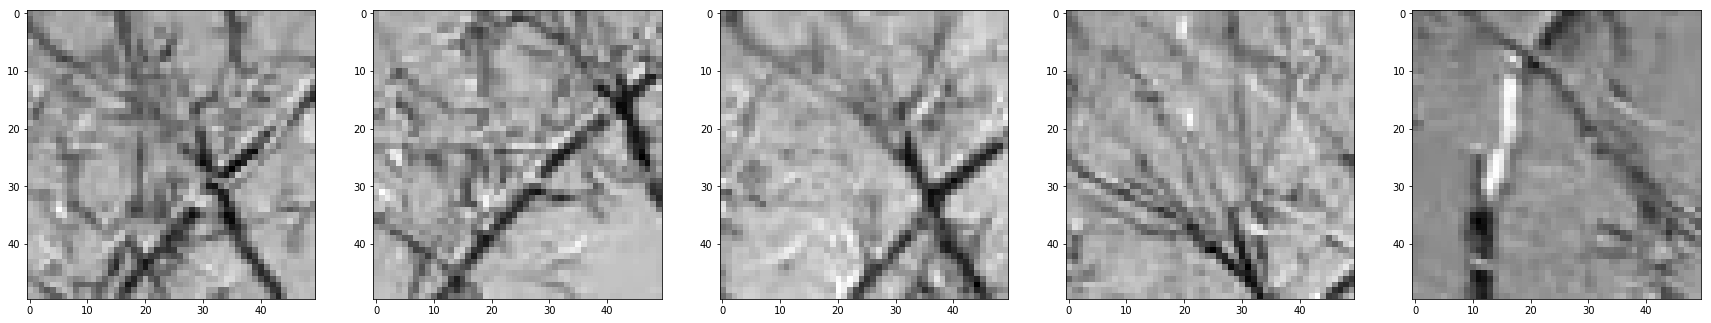

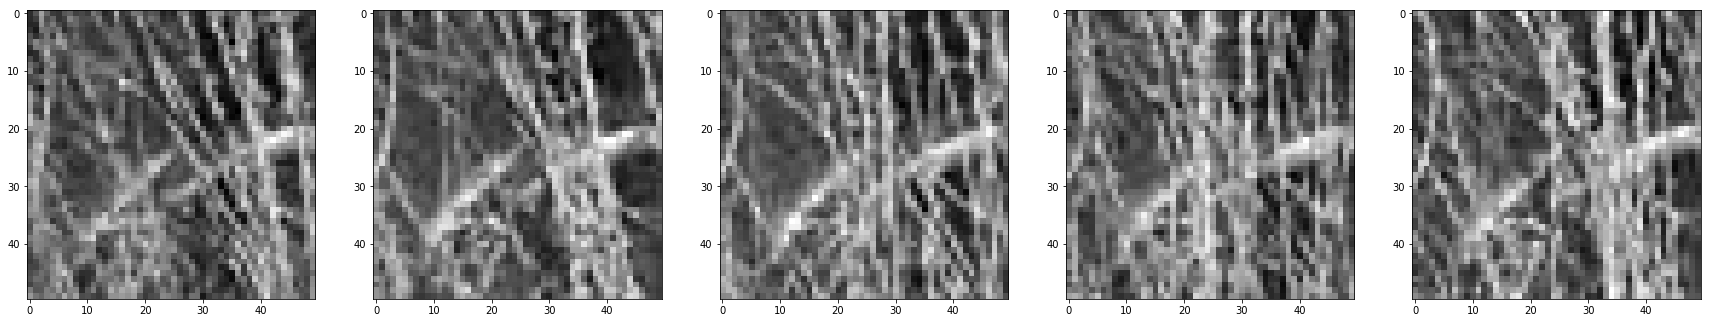

class_id=water fountain


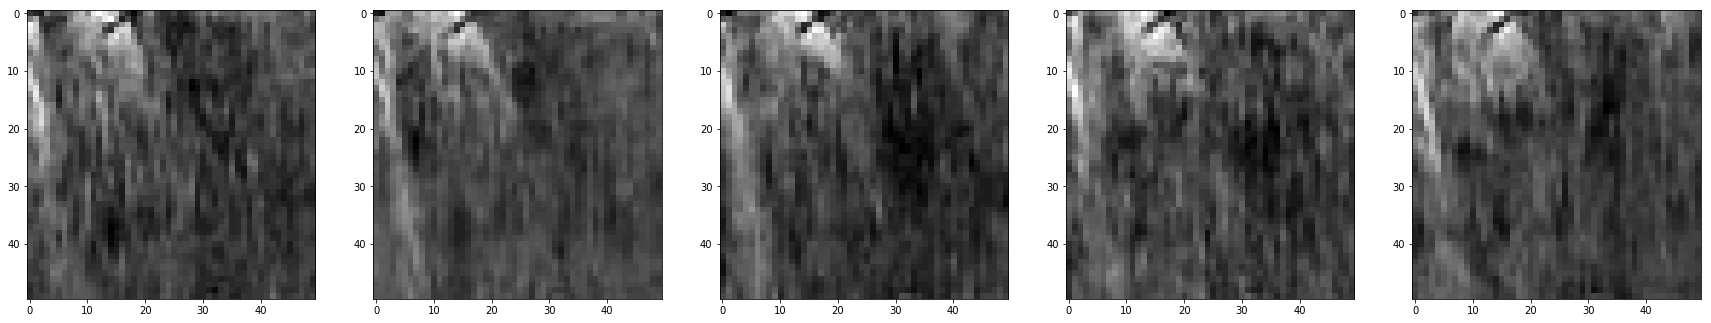

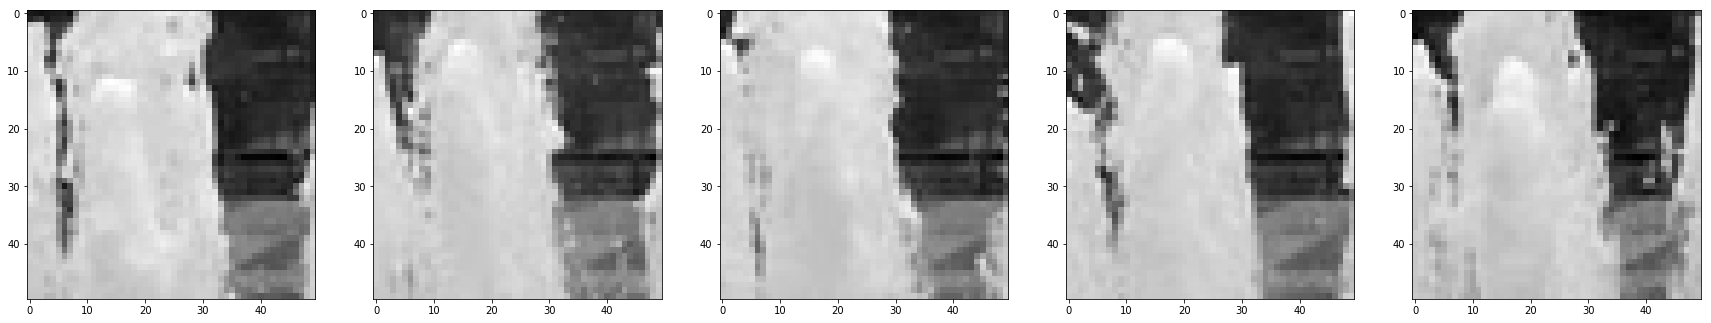

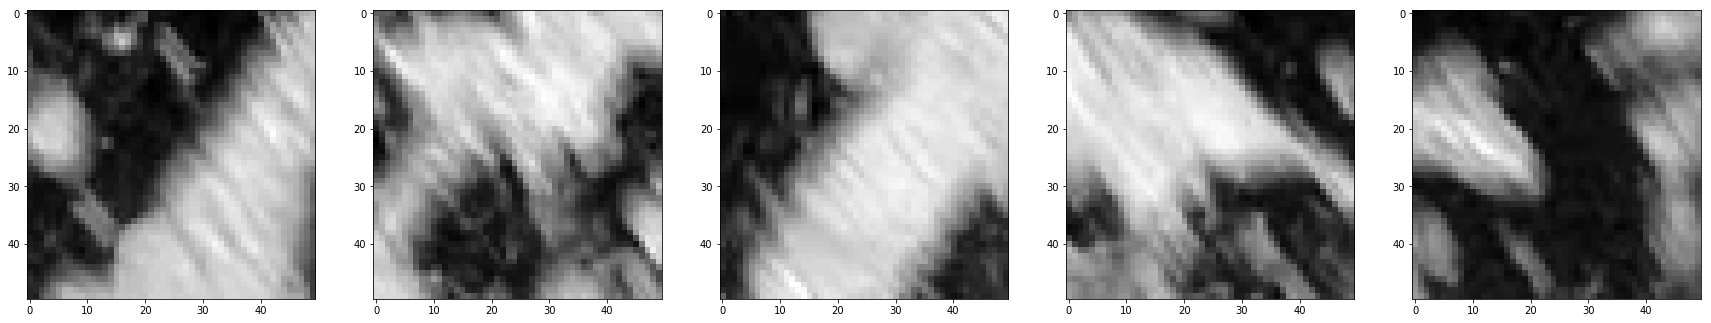

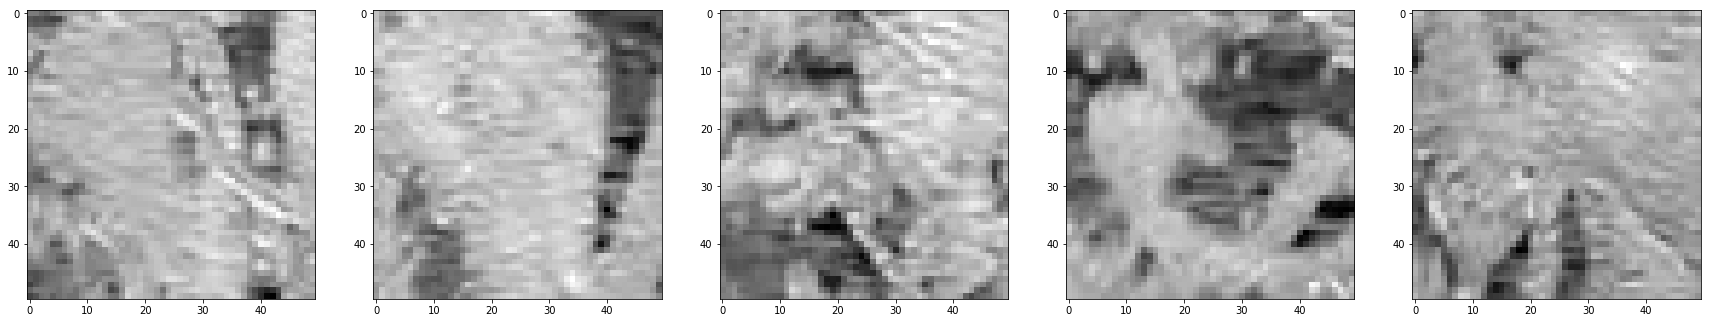

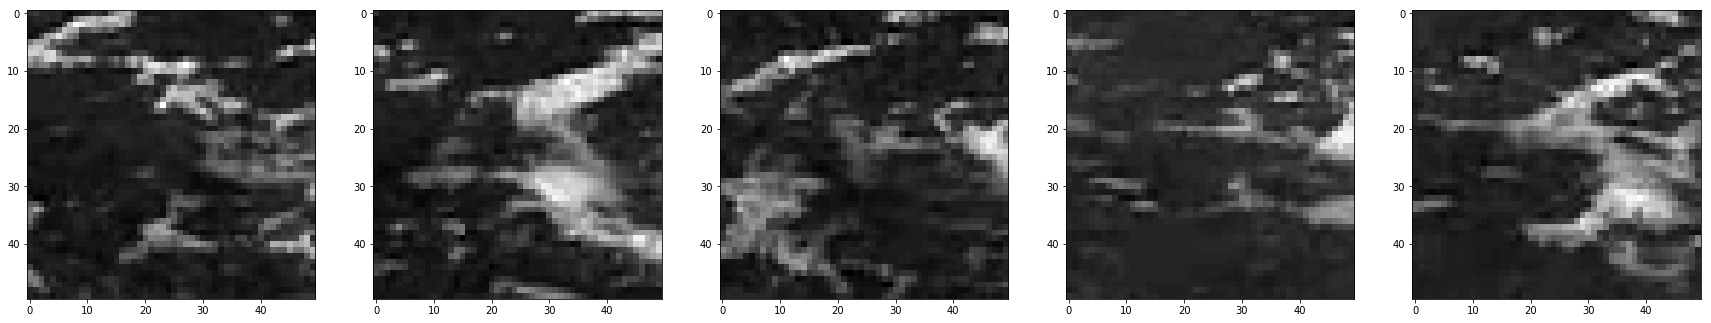

class_id=clouds


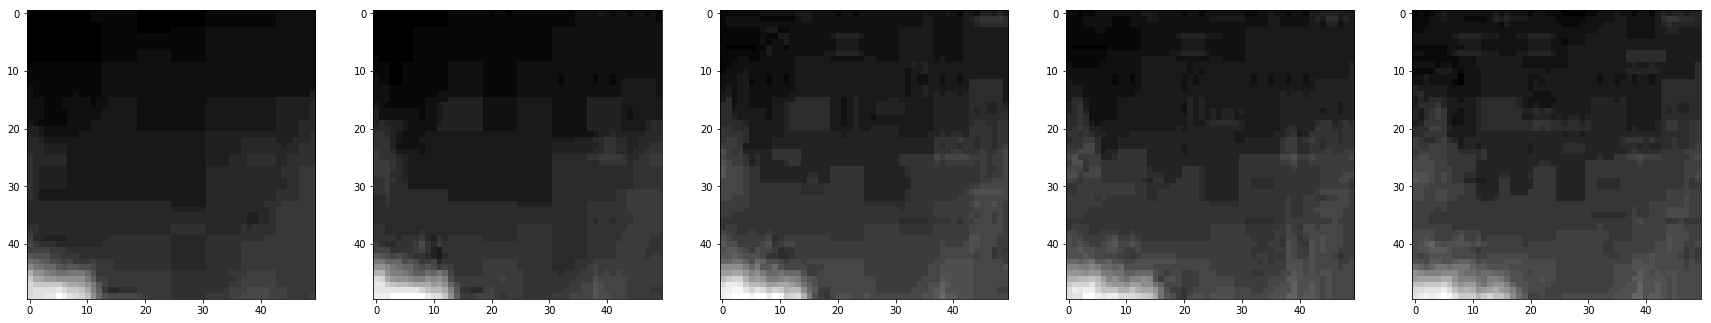

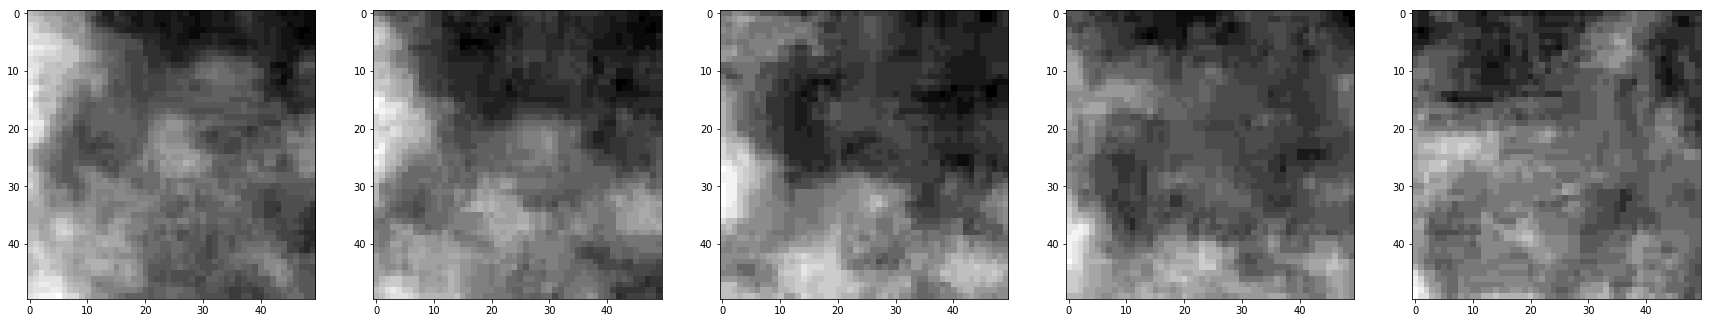

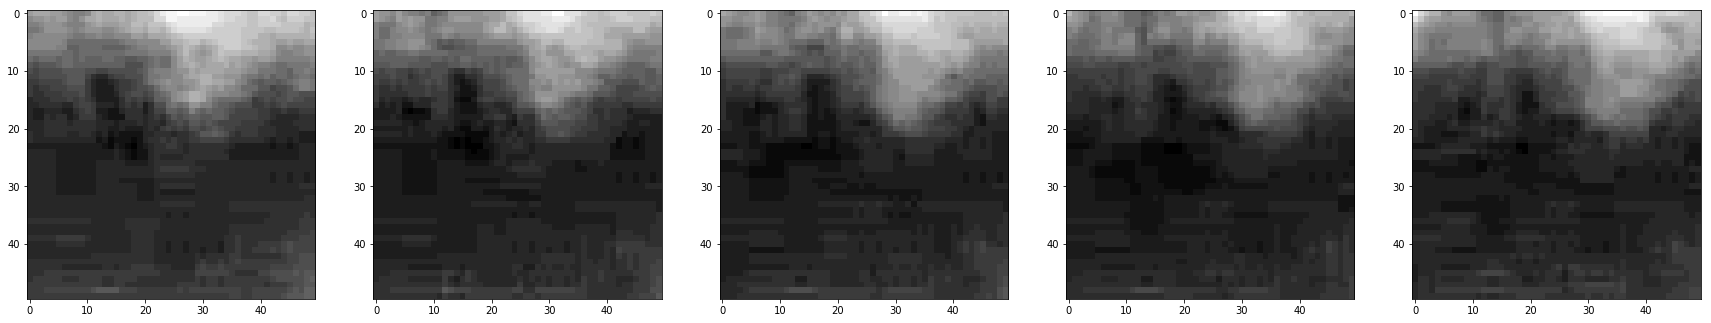

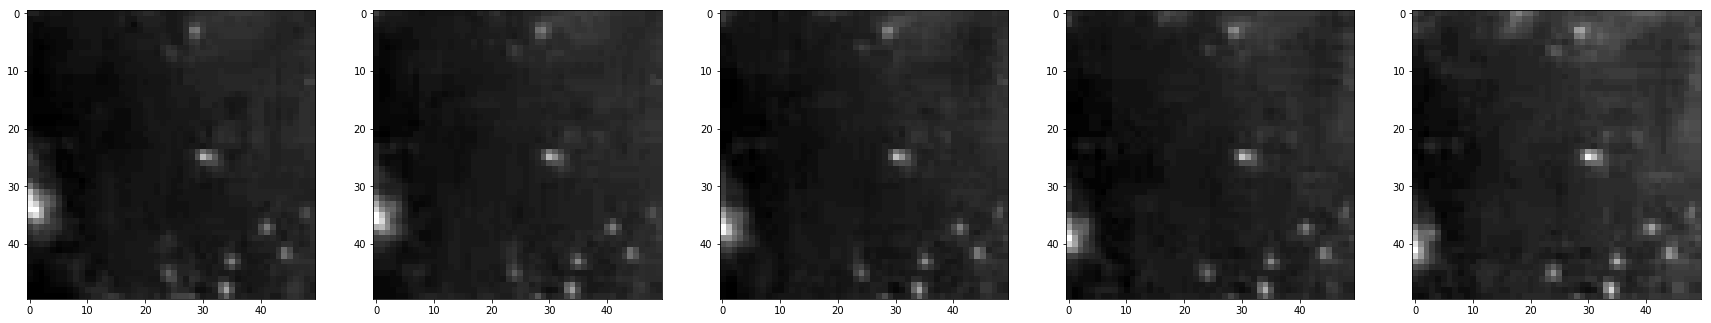

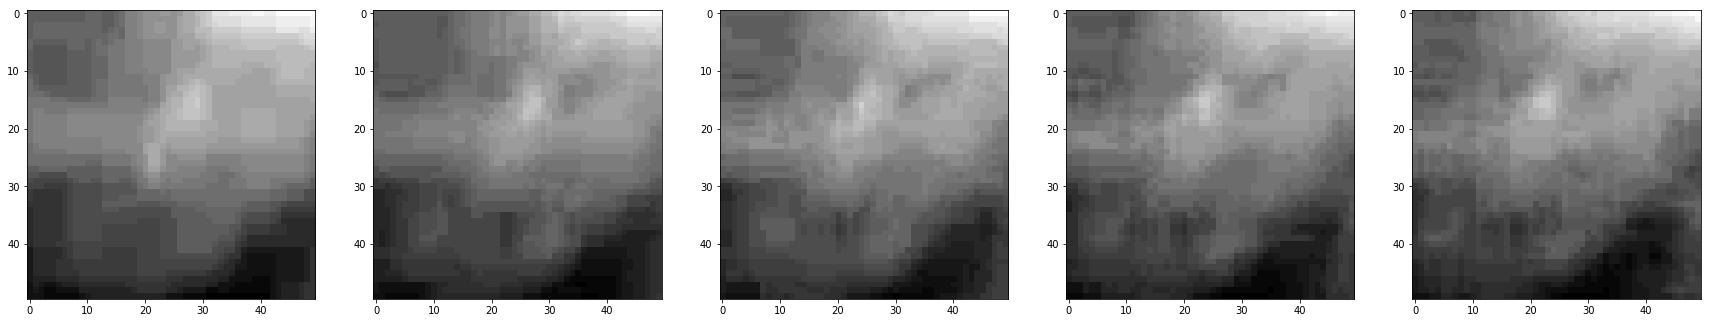

class_id=smoke


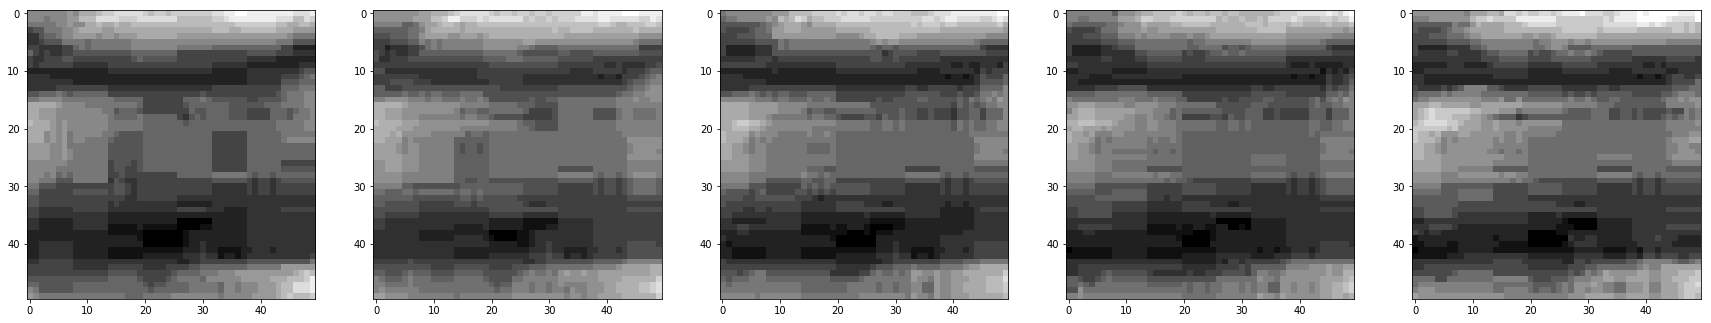

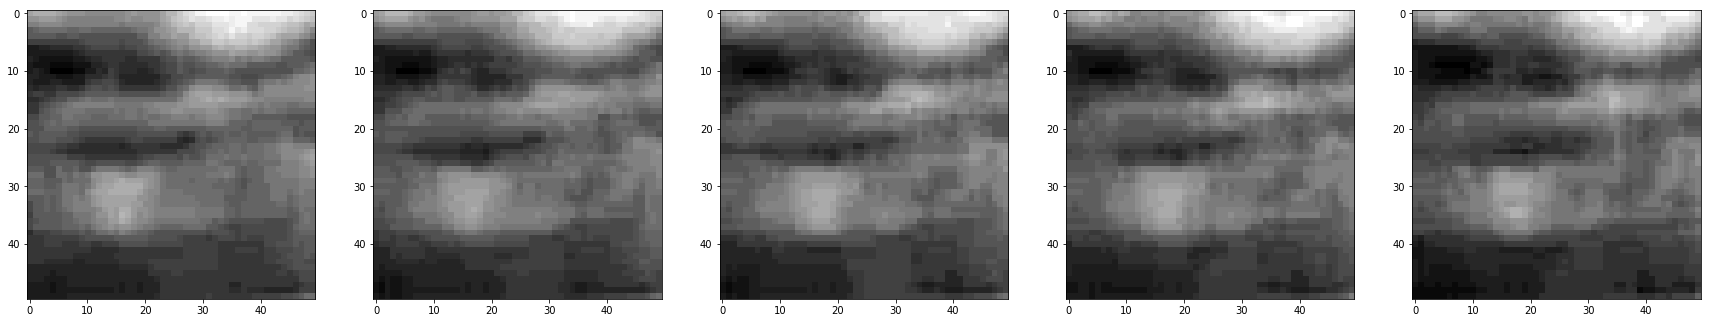

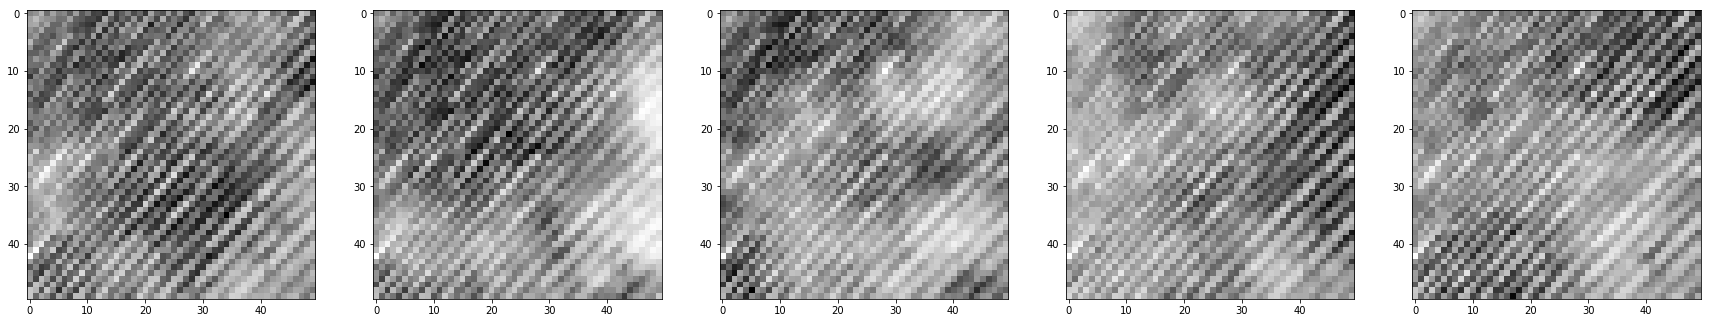

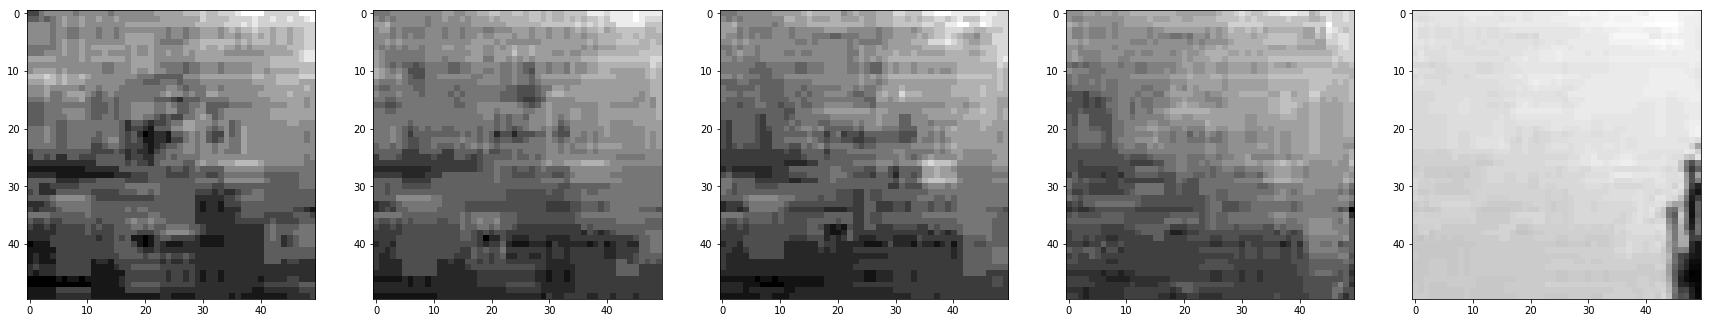

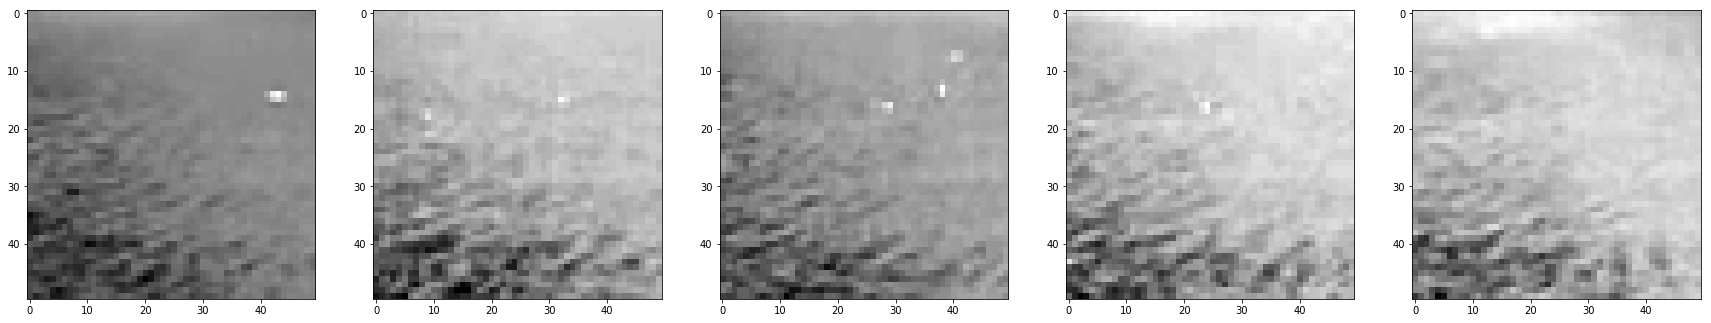

In [99]:
for class_id in range(1, 37):
    
    print('class_id=%s' % class_desc_df.iloc[class_id - 1]['DESCRIPTION'])

    fns = dyntex_df.loc[dyntex_df['class'] == class_id].sample(5)['filepath'].tolist()
    
    for fn in fns:
        fp = '../input/DynTex++/' + fn

        video = sio.loadmat(fp)
        video = video['subv']

        # plt.subplots(5, 2)
        plt.figure(figsize=(30, 30))

        for i in range(0, 50, 10):
            # plt.subplot((2, ))
            plt.subplot(1, 5, i // 10 + 1)
            plt.imshow(video[:, :, i], cmap='gray')

        plt.show()

In [ ]:
for class_id in range(1, 37):
    
    print('class_id=%s' % class_desc_df.iloc[class_id - 1]['DESCRIPTION'])

    fns = dyntex_df.loc[dyntex_df['class'] == class_id].sample(1)['filepath'].tolist()
    
    for fn in fns:
        # original video
        
        fp = '../input/DynTex++/' + fn

        video = sio.loadmat(fp)
        video = video['subv']

        # plt.subplots(5, 2)
        plt.figure(figsize=(30, 30))

        for i in range(0, 50, 10):
            # plt.subplot((2, ))
            plt.subplot(1, 5, i // 10 + 1)
            plt.imshow(video[:, :, i], cmap='gray')
            
        
        # optical flow
        
        fp = '../data/' + fn

        video = sio.loadmat(fp)
        video = video['subv']

        # plt.subplots(5, 2)
        plt.figure(figsize=(30, 30))

        for i in range(0, 50, 10):
            # plt.subplot((2, ))
            plt.subplot(1, 5, i // 10 + 1)
            plt.imshow(video[:, :, i], cmap='gray')

        plt.show()